# Importing all the Required Packages

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
#from sklearn.inspection import partial_dependence
from sklearn.model_selection import train_test_split
#from sklearn.inspection import plot_partial_dependence
import matplotlib.pyplot as plt

In [14]:
#!pip install scikit-learn scipy matplotlib
#!pip install graphviz

In [13]:
import graphviz

In [16]:
import os
os.getcwd()

'/Users/vdodwani/Documents/GitHub/ds-shrinkage/app/adhoc/SHR-252'

In [3]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

# Import Data and Create Clusterwise Data Sets

In [17]:
#data = pd.read_csv(r"C:\Users\vdodwani\OneDrive - Kmart Australia Limited\Downloads\Projects\Shrinkage\data\Recent\EWS\Model_Data\All_Store_Shrink_2022_10_19.csv")
#data = pd.read_csv(r"C:\Users\vdodwani\OneDrive - Kmart Australia Limited\Downloads\Projects\Shrinkage\data\Recent\EWS\Model_Data\All_Store_inc_Gemini_Shrink_2022_10_19.csv")
data = pd.read_csv("All_Store_inc_Gemini_Shrink_2023_06_16.csv")

#data = pd.read_excel(r"C:\Users\vdodwani\OneDrive - Kmart Australia Limited\Downloads\Projects\Shrinkage\data\Recent\EWS\Model_Data\All_Store_Shrink_2022_06_05_updated.xlsx", "Final")
#OOT_data = pd.read_excel(r"C:\Users\vdodwani\OneDrive - Kmart Australia Limited\Downloads\Projects\Shrinkage\data\Recent\EWS\Model_Data\Data_to_Predict.xlsx")

#test_data = pd.read_csv(r"C:\Users\vdodwani\OneDrive - Kmart Australia Limited\Downloads\Projects\Shrinkage\data\Recent\EWS\Model_Data\Test_Stk_Stores_Quarter_Data_20210712.csv")
#test_data_to_predict = pd.read_csv(r"C:\Users\vdodwani\OneDrive - Kmart Australia Limited\Downloads\Projects\Shrinkage\data\Recent\EWS\Model_Data\Future_Stk_Stores_Data_20221019.csv")
#test_data_to_predict = pd.read_csv(r"C:\Users\vdodwani\OneDrive - Kmart Australia Limited\Downloads\Projects\Shrinkage\data\Recent\EWS\Model_Data\Future_Stk_Stores_inc_Gemini_Data_20221019.csv")
test_data_to_predict = pd.read_csv("Future_Stk_Stores_inc_Gemini_Data_20230616.csv")

In [244]:
#data = data[data['REQUIRED_FLAG']==1]
test_data_to_predict.head()
#data.head()

,LOCATION_SOURCE_IDENTIFIER,LOCATION_GENERATED_IDENTIFIER,Metro_NonMetro,START_DATE,END_DATE,ADJ_START_DATE,START_DATE_ADJ_TYPE,TOT_SHRINK_QTY_ZERO_SLS,TOT_SHRINK_QTY,TOT_SHRINK_AMT_ZERO_SLS,...,FAMILY_TECH_KNOWN_SR_RATE,COSMETIC_ALL_SR_RATE,APPLIANCE_ALL_SR_RATE,DOLL_ALL_SR_RATE,TOY_ALL_SR_RATE,FAMILY_TECH_ALL_SR_RATE,ONLINE_FIRST_DIF_PERCENT,SCO_INTERVENTION_PERCENT,Previous_Shrink_Amt_Rate,PREV_STOCKTAKE_SHRINK_PERCENT
0,1167,1.040000e+12,Non Metro,5/3/2023,11/6/2023,19/2/2023,STK_ADJ,-222,-5668,-2114.53,...,-0.012596,-0.039003,-0.025590,-0.024334,-0.018477,-0.013086,0.839458,0.143605,-0.019006,0.503847
1,1132,1.040000e+12,Non Metro,5/3/2023,11/6/2023,19/2/2023,STK_ADJ,-191,-7488,-1859.61,...,-0.013185,-0.027558,-0.020815,-0.009313,-0.012983,-0.018276,0.877916,0.167790,-0.014719,0.247631
2,1135,1.040000e+12,Non Metro,5/3/2023,11/6/2023,19/2/2023,STK_ADJ,-1057,-15211,-7443.52,...,-0.018025,-0.032504,-0.026140,-0.009478,-0.017397,-0.028025,0.809754,0.155664,-0.016629,0.474639
3,1007,1.040000e+12,Metro,5/3/2023,11/6/2023,19/2/2023,STK_ADJ,-749,-27291,-6111.07,...,-0.020176,-0.034709,-0.022565,-0.005807,-0.016130,-0.024508,0.904330,0.168117,-0.018556,0.514563
4,1358,1.040000e+12,Non Metro,5/3/2023,11/6/2023,19/2/2023,STK_ADJ,-302,-7867,-1956.52,...,-0.018370,-0.032170,-0.020292,-0.007786,-0.023956,-0.032670,0.866028,0.051213,-0.035629,0.528136


In [23]:
test_data_actual_SR = test_data[test_data['END_QUARTER_DATE_TYPE']=='END_DATE']
test_data_actual_SR['Shrink_Amt_Rate'] = test_data_actual_SR['TOT_SHRINK_AMT']/test_data_actual_SR['TOT_SALES_AMT']
#test_data_to_predict = test_data[~(test_data['END_QUARTER_DATE_TYPE']=='END_DATE')]
test_data_to_predict = test_data
test_data_to_predict = pd.merge(test_data_to_predict,test_data_actual_SR[['LOCATION_SOURCE_IDENTIFIER','Shrink_Amt_Rate']],on=['LOCATION_SOURCE_IDENTIFIER'],how='left') 

<ipython-input-23-4e6795a90fbb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_actual_SR['Shrink_Amt_Rate'] = test_data_actual_SR['TOT_SHRINK_AMT']/test_data_actual_SR['TOT_SALES_AMT']


In [245]:
test_data_to_predict['Shrink_Amt_Rate'] = test_data_to_predict['TOT_SHRINK_AMT']/test_data_to_predict['TOT_SALES_AMT']
test_data_to_predict_Metro = test_data_to_predict[test_data_to_predict["Metro_NonMetro"] == "Metro"]
test_data_to_predict_NonMetro = test_data_to_predict[test_data_to_predict["Metro_NonMetro"] == "Non Metro"]
#data = data[data["START_DATE_ADJ_TYPE"] == "STK_ADJ"]

#data_Metro_HSR = data[data["Metro_NonMetro_HSR_LSR"] == "Metro High SR"]
#data_Metro_LSR = data[data["Metro_NonMetro_HSR_LSR"] == "Metro Low SR"]
#data_NonMetro_HSR = data[data["Metro_NonMetro_HSR_LSR"] == "Non Metro High SR"]
#data_NonMetro_LSR = data[data["Metro_NonMetro_HSR_LSR"] == "Non Metro Low SR"]


In [20]:
data.rename(columns = {'SHRINK_AMT_RATE':'Shrink_Amt_Rate'},inplace=True)

In [21]:
data_Metro = data[data["Metro_NonMetro"] == "Metro"]
data_NonMetro = data[data["Metro_NonMetro"] == "Non Metro"]

In [22]:
data_Metro.shape

(745, 78)

In [23]:
data_NonMetro.shape

(275, 78)

In [26]:
data.head()

,LOCATION_SOURCE_IDENTIFIER,LOCATION_GENERATED_IDENTIFIER,Metro_NonMetro,ADJ_START_DATE,START_DATE,START_DATE_ADJ_TYPE,ADJ_END_DATE,END_DATE,END_DATE_ADJ_TYPE,TOT_SHRINK_QTY_ZERO_SLS,...,FAMILY_TECH_KNOWN_SR_RATE,COSMETIC_ALL_SR_RATE,APPLIANCE_ALL_SR_RATE,DOLL_ALL_SR_RATE,TOY_ALL_SR_RATE,FAMILY_TECH_ALL_SR_RATE,ONLINE_FIRST_DIF_PERCENT,SCO_INTERVENTION_PERCENT,Previous_Shrink_Amt_Rate,PREV_STOCKTAKE_SHRINK_PERCENT
0,1001,1.040000e+12,Metro,28/2/2021,14/3/2021,STK_ADJ,13/2/2022,20/2/2022,STK_ADJ,-1576,...,-0.020559,-0.041091,-0.029079,-0.005326,-0.011728,-0.034058,0.795414,0.197099,-0.019081,0.354875
1,1001,1.040000e+12,Metro,16/2/2020,1/3/2020,STK_ADJ,28/2/2021,7/3/2021,STK_ADJ,-1226,...,-0.019971,-0.054332,-0.035196,-0.008004,-0.015803,-0.032774,0.750637,0.139665,-0.026184,0.334135
2,1001,1.040000e+12,Metro,10/2/2019,24/2/2019,STK_ADJ,16/2/2020,23/2/2020,STK_ADJ,-1369,...,-0.021367,-0.099843,-0.041203,-0.032578,-0.025000,-0.037932,0.716111,0.136913,-0.019978,0.259511
3,1002,1.040000e+12,Metro,13/2/2022,27/2/2022,STK_ADJ,14/8/2022,21/8/2022,STK_ADJ,-2854,...,-0.029718,-0.064786,-0.031298,-0.005221,-0.016277,-0.039495,0.415258,0.216678,-0.023039,0.677556
4,1002,1.040000e+12,Metro,15/8/2021,29/8/2021,STK_ADJ,13/2/2022,20/2/2022,STK_ADJ,-1122,...,-0.015934,-0.027244,-0.021209,-0.010270,-0.014740,-0.017461,0.688810,0.230775,-0.025104,0.481616


In [24]:
data_Metro.columns

Index(['LOCATION_SOURCE_IDENTIFIER', 'LOCATION_GENERATED_IDENTIFIER',
       'Metro_NonMetro', 'ADJ_START_DATE', 'START_DATE', 'START_DATE_ADJ_TYPE',
       'ADJ_END_DATE', 'END_DATE', 'END_DATE_ADJ_TYPE',
       'TOT_SHRINK_QTY_ZERO_SLS', 'TOT_SHRINK_QTY', 'TOT_SHRINK_AMT_ZERO_SLS',
       'TOT_KNOWN_SHRINK_AMT', 'TOT_SHRINK_AMT', 'TOT_SALES_QTY',
       'TOT_SALES_AMT', 'AVG_SALES_AMT', 'Shrink_Amt_Rate', 'TOT_GAPSCAN_QTY',
       'TOT_GAPSCAN_AMT', 'AVG_GAPSCAN_QTY', 'AVG_GAPSCAN_AMT',
       'PROD_CNT_ZERO_SLS', 'PROD_CNT', 'ONLINE_SHRINK_QTY',
       'ONLINE_SHRINK_AMT', 'HEAD_OFFICE_ADJ_QTY', 'HEAD_OFFICE_ADJ_AMT',
       'REFUND_NO_RECEIPT_TRAN', 'REFUND_TRAN', 'TOTAL_REFUND_QTY',
       'TOTAL_REFUND_NO_RECEIPT_QTY', 'SELF_CHECKOUT_TRAN', 'PURCHASE_TRAN',
       'TOTAL_TRAN', 'HOUSE_MANIFEST_QTY', 'ALL_MANIFEST_QTY', 'NEG_SOH_QTY',
       'NEG_SOH_COST_AMT', 'NEG_SOH_PROD_CNT', 'AVG_SOH_QTY',
       'AVG_SOH_COST_AMT', 'AVG_NEG_SOH_QTY', 'AVG_NEG_SOH_COST_AMT',
       'AVG_NEG_

In [25]:
test_data_to_predict_Metro.columns

Index(['LOCATION_SOURCE_IDENTIFIER', 'LOCATION_GENERATED_IDENTIFIER',
       'Metro_NonMetro', 'START_DATE', 'END_DATE', 'ADJ_START_DATE',
       'START_DATE_ADJ_TYPE', 'TOT_SHRINK_QTY_ZERO_SLS', 'TOT_SHRINK_QTY',
       'TOT_SHRINK_AMT_ZERO_SLS', 'TOT_KNOWN_SHRINK_AMT', 'TOT_SHRINK_AMT',
       'TOT_SALES_QTY', 'TOT_SALES_AMT', 'AVG_SALES_AMT', 'Shrink_Amt_Rate',
       'TOT_GAPSCAN_QTY', 'TOT_GAPSCAN_AMT', 'AVG_GAPSCAN_QTY',
       'AVG_GAPSCAN_AMT', 'PROD_CNT_ZERO_SLS', 'PROD_CNT', 'ONLINE_SHRINK_QTY',
       'ONLINE_SHRINK_AMT', 'HEAD_OFFICE_ADJ_QTY', 'HEAD_OFFICE_ADJ_AMT',
       'REFUND_NO_RECEIPT_TRAN', 'REFUND_TRAN', 'TOTAL_REFUND_QTY',
       'TOTAL_REFUND_NO_RECEIPT_QTY', 'SELF_CHECKOUT_TRAN', 'PURCHASE_TRAN',
       'TOTAL_TRAN', 'HOUSE_MANIFEST_QTY', 'ALL_MANIFEST_QTY', 'NEG_SOH_QTY',
       'NEG_SOH_COST_AMT', 'NEG_SOH_PROD_CNT', 'AVG_SOH_QTY',
       'AVG_SOH_COST_AMT', 'AVG_NEG_SOH_QTY', 'AVG_NEG_SOH_COST_AMT',
       'AVG_NEG_SOH_PROD_CNT', 'AVG_PROD_CNT', 'AVG_WEEKLY_T

# Model 0 (BaseLine) : Overall Model

In [240]:
# Creating Target and Regressor Subsets
Y = data['Shrink_Amt_Rate']
X =  data[[
           'HEAD_OFFICE_AMT_PERCENT', 
           'HOUSE_MANIFEST_QTY_PERCENT', 
           'NEG_SOH_QTY_PERCENT'
         , 'REFUND_NO_RECEIPT_PERCENT', 
           'REFUND_PERCENT',
           'SELF_CHECKOUT_PERCENT',
'GAPSCAN_AMT_PERCENT']]
# Split the data into train and test data:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=123)
# Build the model with the random forest regression algorithm:
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, Y_train)
# Make predictions on test data using the model trained on original data
predictions = model.predict(X_test)
# Performance metrics
errors = abs(predictions - Y_test)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Metrics for Random Forest Trained on Original Data
Average absolute error: 0.0 degrees.
Accuracy: 122.01 %.


In [232]:
Y = OOT_data_Metro['Shrink_Amt_Rate']
X =  OOT_data_Metro[[
           'HEAD_OFFICE_AMT_PERCENT', 
#            'HOUSE_MANIFEST_QTY_PERCENT', 
           'NEG_SOH_QTY_PERCENT'
         , 'REFUND_NO_RECEIPT_PERCENT', 
           'REFUND_PERCENT',
           'SELF_CHECKOUT_PERCENT',
'GAPSCAN_AMT_PERCENT']]

predictions = model_Metro.predict(X)
# Performance metrics
errors = abs(predictions - Y)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
OOT_data_Metro["Predicted_Shrink"] = predictions

Metrics for Random Forest Trained on Original Data
Average absolute error: 0.0 degrees.
Accuracy: 122.69 %.


In [410]:
test_data_to_predict_Metro.head()

,LOCATION_SOURCE_IDENTIFIER,LOCATION_GENERATED_IDENTIFIER,Metro_NonMetro,START_DATE,END_QUARTER_DATE,END_QUARTER_DATE_TYPE,ADJ_START_DATE,ADJ_END_DATE,TOT_SHRINK_QTY_ZERO_SLS,TOT_SHRINK_QTY,TOT_SHRINK_AMT_ZERO_SLS,TOT_KNOWN_SHRINK_AMT,TOT_SHRINK_AMT,TOT_SALES_QTY,TOT_SALES_AMT,AVG_SALES_AMT,SHRINK_AMT_RATE_CALCULATED,TOT_GAPSCAN_QTY,TOT_GAPSCAN_AMT,AVG_GAPSCAN_QTY,AVG_GAPSCAN_AMT,PROD_CNT_ZERO_SLS,PROD_CNT,ONLINE_SHRINK_QTY,ONLINE_SHRINK_AMT,HEAD_OFFICE_ADJ_QTY,HEAD_OFFICE_ADJ_AMT,REFUND_NO_RECEIPT_TRAN,REFUND_TRAN,TOTAL_REFUND_QTY,TOTAL_REFUND_NO_RECEIPT_QTY,SELF_CHECKOUT_TRAN,PURCHASE_TRAN,TOTAL_TRAN,HOUSE_MANIFEST_QTY,ALL_MANIFEST_QTY,NEG_SOH_QTY,NEG_SOH_COST_AMT,NEG_SOH_PROD_CNT,AVG_SOH_QTY,AVG_SOH_COST_AMT,AVG_NEG_SOH_QTY,AVG_NEG_SOH_COST_AMT,AVG_NEG_SOH_PROD_CNT,AVG_PROD_CNT,REFUND_TRAN_PERCENT,REFUND_QTY_PERCENT,REFUND_NO_RECEIPT_PERCENT,REFUND_NO_RECEIPT_QTY_PERCENT,SELF_CHECKOUT_PERCENT,AVG_GAPSCAN_AMT_PERCENT,AVG_GAPSCAN_QTY_PERCENT,AVG_HEAD_OFFICE_AMT_PERCENT,AVG_HEAD_OFFICE_QTY_PERCENT,HOUSE_MANIFEST_QTY_PERCENT,AVG_NEG_SOH_QTY_PERCENT,AVG_NEG_SOH_AMT_PERCENT,AVG_NEG_SOH_PROD_CNT_PERCENT,KNOWN_SHRINK_AMT_PERCENT,ALL_SHRINK_WO_STK_AMT_PERCENT,ONLINE_FIRST_DIF_PERCENT,SCO_INTERVENTION_PERCENT,Previous_Shrink_Amt_Rate,COSMETIC_ALL_SR_RATE,APPLIANCE_ALL_SR_RATE,DOLL_ALL_SR_RATE,TOY_ALL_SR_RATE,FAMILY_TECH_ALL_SR_RATE,COSMETIC_KNOWN_SR_RATE,APPLIANCE_KNOWN_SR_RATE,DOLL_KNOWN_SR_RATE,TOY_KNOWN_SR_RATE,FAMILY_TECH_KNOWN_SR_RATE,Shrink_Amt_Rate
0,1157,1.040000e+12,Metro,24/05/2020,22/11/2020,SIXTH_MONTH_DATE,10/05/2020,28/02/2021,-483,-22378,-4643.42,-61266.09,-121425.53,1387559,10822400.02,4.008296e+05,-0.011220,-12001,-54069.18,-444.481481,-2002.562222,1032,79664,-835,-5818.25,-835,-5818.25,2607,11723,-25621,-5129,147974,218809,241939,3253,1511125,-13473,-68416,5901,366754.0000,1587823.593,-7661.296296,-39246.07407,3525.962963,53448.25926,0.048454,-0.018465,0.222383,0.200187,0.676270,-0.001261,-0.001212,-0.000136,-0.000084,0.002153,-0.020889,-0.024717,0.065970,-0.005661,-0.011220,0.718226,0.105008,-0.0321,-0.032069,-0.040487,-0.009019,-0.014907,-0.025836,-0.020604,-0.030548,-0.003180,-0.008518,-0.018089,-0.028798
1,1036,1.040000e+12,Metro,8/09/2019,7/06/2020,NINTH_MONTH_DATE,25/08/2019,28/02/2021,-444,-91331,-5896.56,-132291.46,-477639.01,3351733,24699164.10,6.174791e+05,-0.019338,-65860,-328884.65,-1646.500000,-8222.116250,1105,102967,-172,-1269.80,-172,-1269.80,4902,29768,-49716,-7823,734296,800792,847371,12075,3232886,-27263,-131609,9476,428176.2750,1908439.350,-13550.575000,-66268.55000,5375.325000,63178.80000,0.035130,-0.014833,0.164673,0.157354,0.916962,-0.004308,-0.003845,-0.000017,-0.000010,0.003735,-0.031647,-0.034724,0.085081,-0.005356,-0.019338,0.576524,0.135649,-0.0296,-0.140996,-0.036418,-0.043393,-0.026926,-0.051639,-0.025346,-0.021939,-0.002289,-0.008671,-0.019538,-0.032540
2,1016,1.040000e+12,Metro,24/05/2020,22/11/2020,SIXTH_MONTH_DATE,10/05/2020,28/02/2021,-386,-16901,-4060.02,-47585.83,-96418.04,1153696,9390688.01,3.478033e+05,-0.010267,-8137,-39901.14,-301.370370,-1477.820000,833,76181,-1284,-8514.09,-1284,-8514.09,1746,10216,-18863,-2898,122534,175163,192012,1593,1249051,-7386,-40519,3534,349471.0000,1564877.148,-3832.185185,-21557.25926,1901.000000,50931.11111,0.053205,-0.016350,0.170908,0.153634,0.699543,-0.000944,-0.000862,-0.000202,-0.000136,0.001275,-0.010966,-0.013776,0.037325,-0.005067,-0.010267,0.877557,0.113637,-0.0174,-0.025756,-0.028522,-0.006040,-0.018019,-0.020950,-0.012593,-0.023287,-0.001960,-0.008659,-0.013019,-0.019702
5,1097,1.040000e+12,Metro,1/03/2020,29/11/2020,NINTH_MONTH_DATE,16/02/2020,28/02/2021,-916,-97738,-4357.62,-186557.63,-470993.37,5641768,43729945.52,1.093249e+06,-0.010771,-60528,-267086.69,-1513.200000,-6677.167250,2039,100727,-723,-5215.04,-723,-5215.04,9942,53001,-102384,-18570,825315,1002352,1089109,5284,5858859,-31675,-164289,10916,483030.1500,2151992.325,-24289.825000,-122350.15000,8133.075000,64023.67500,0.048665,-0.018148,0.187581,0.181376,0.823378,-0.003103,-0

In [411]:
test_data_actual_SR.head()

,LOCATION_SOURCE_IDENTIFIER,LOCATION_GENERATED_IDENTIFIER,Metro_NonMetro,START_DATE,END_QUARTER_DATE,END_QUARTER_DATE_TYPE,ADJ_START_DATE,ADJ_END_DATE,TOT_SHRINK_QTY_ZERO_SLS,TOT_SHRINK_QTY,TOT_SHRINK_AMT_ZERO_SLS,TOT_KNOWN_SHRINK_AMT,TOT_SHRINK_AMT,TOT_SALES_QTY,TOT_SALES_AMT,AVG_SALES_AMT,SHRINK_AMT_RATE_CALCULATED,TOT_GAPSCAN_QTY,TOT_GAPSCAN_AMT,AVG_GAPSCAN_QTY,AVG_GAPSCAN_AMT,PROD_CNT_ZERO_SLS,PROD_CNT,ONLINE_SHRINK_QTY,ONLINE_SHRINK_AMT,HEAD_OFFICE_ADJ_QTY,HEAD_OFFICE_ADJ_AMT,REFUND_NO_RECEIPT_TRAN,REFUND_TRAN,TOTAL_REFUND_QTY,TOTAL_REFUND_NO_RECEIPT_QTY,SELF_CHECKOUT_TRAN,PURCHASE_TRAN,TOTAL_TRAN,HOUSE_MANIFEST_QTY,ALL_MANIFEST_QTY,NEG_SOH_QTY,NEG_SOH_COST_AMT,NEG_SOH_PROD_CNT,AVG_SOH_QTY,AVG_SOH_COST_AMT,AVG_NEG_SOH_QTY,AVG_NEG_SOH_COST_AMT,AVG_NEG_SOH_PROD_CNT,AVG_PROD_CNT,REFUND_TRAN_PERCENT,REFUND_QTY_PERCENT,REFUND_NO_RECEIPT_PERCENT,REFUND_NO_RECEIPT_QTY_PERCENT,SELF_CHECKOUT_PERCENT,AVG_GAPSCAN_AMT_PERCENT,AVG_GAPSCAN_QTY_PERCENT,AVG_HEAD_OFFICE_AMT_PERCENT,AVG_HEAD_OFFICE_QTY_PERCENT,HOUSE_MANIFEST_QTY_PERCENT,AVG_NEG_SOH_QTY_PERCENT,AVG_NEG_SOH_AMT_PERCENT,AVG_NEG_SOH_PROD_CNT_PERCENT,KNOWN_SHRINK_AMT_PERCENT,ALL_SHRINK_WO_STK_AMT_PERCENT,ONLINE_FIRST_DIF_PERCENT,SCO_INTERVENTION_PERCENT,Previous_Shrink_Amt_Rate,COSMETIC_ALL_SR_RATE,APPLIANCE_ALL_SR_RATE,DOLL_ALL_SR_RATE,TOY_ALL_SR_RATE,FAMILY_TECH_ALL_SR_RATE,COSMETIC_KNOWN_SR_RATE,APPLIANCE_KNOWN_SR_RATE,DOLL_KNOWN_SR_RATE,TOY_KNOWN_SR_RATE,FAMILY_TECH_KNOWN_SR_RATE,Shrink_Amt_Rate
1,1043,1.040000e+12,Metro,8/09/2019,7/03/2021,END_DATE,25/08/2019,28/02/2021,-1728,-217016,-12457.67,-222097.30,-1119236.50,6683271,51403537.58,650677.6909,-0.021774,-89126,-423716.12,-1128.177215,-5363.495190,2050,156742,-4462,-33337.14,-4462,-33337.14,12932,65601,-121200,-22853,909409,1247943,1359286,27229,6700413,-3424,-16085,1641,441920.0759,2009411.975,-18385.139240,-89858.21519,7546.303797,66985.65823,0.048261,-0.018135,0.197131,0.188556,0.728726,-0.002669,-0.002553,-0.000210,-0.000128,0.004064,-0.041603,-0.044719,0.112656,-0.004321,-0.013631,0.799604,0.162270,-0.0177,-0.042871,-0.031163,-0.016293,-0.016059,-0.031631,-0.009298,-0.019390,-0.001901,-0.006366,-0.012805,-0.021774
4,1035,1.040000e+12,Metro,28/07/2019,7/03/2021,END_DATE,14/07/2019,28/02/2021,-3284,-169206,-20620.59,-270877.41,-909013.83,4918578,37265647.01,438419.3766,-0.024393,-66295,-334509.93,-779.941176,-3935.410941,3269,167427,-3395,-21240.85,-3395,-21240.85,13743,61751,-116665,-25586,614235,932754,1029896,9868,4905651,-1684,-7046,785,351980.7294,1609627.353,-23808.682350,-118346.92940,8765.482353,69520.54118,0.059958,-0.023719,0.222555,0.219312,0.658518,-0.002445,-0.002216,-0.000155,-0.000113,0.002012,-0.067642,-0.073524,0.126085,-0.007269,-0.017391,0.694040,0.174852,-0.0253,-0.076064,-0.038659,-0.031468,-0.022200,-0.036416,-0.021801,-0.027543,-0.003516,-0.009683,-0.022004,-0.024393
10,8208,1.040000e+12,0,8/09/2019,7/03/2021,END_DATE,25/08/2019,28/02/2021,-2010,-160419,-12667.15,-181580.84,-697452.40,6225397,41785858.87,528934.9224,-0.016691,-69898,-279269.69,-884.784810,-3535.059367,1396,145723,-4230,-25880.76,-4230,-25880.76,4864,34611,-53873,-7142,1092556,1181392,1236203,93529,6022326,-4985,-19678,2086,407188.3165,1612964.810,-23954.379750,-109623.89870,7004.936709,60736.31646,0.027998,-0.008654,0.140533,0.132571,0.924804,-0.002192,-0.002173,-0.000203,-0.000131,0.015530,-0.058829,-0.067964,0.115334,-0.004346,-0.011429,0.855946,0.118379,-0.0142,-0.049699,-0.022134,-0.014178,-0.017230,-0.030597,-0.013373,-0.015843,-0.002768,-0.007536,-0.014884,-0.016691
15,1166,1.040000e+12,Non Metro,24/05/2020,7/03/2021,END_DATE,10/05/2020,28/02/2021,-1502,-42539,-8947.96,-58528.08,-203135.08,2023507,15933400.03,379366.6674,-0.012749,-10759,-54476.02,-256.166667,-1297.048095,1403,97972,-441,-3184.60,-441,-3184.60,2566,14066,-21750,-4099,229146,377198,405658,11155,2041443,-1191,-4551,506,245966.3571,1098447.167,-6873.428571,-33876.28571,3320.428571,48526.09524,0.034675,-0.010749,0.182426,0.188460,0.607495,-0.001181,-0.001041,

In [256]:
Y = test_data_to_predict_Metro['Shrink_Amt_Rate']
#Y = test_data_to_predict_Metro['SHRINK_AMT_RATE_CALCULATED']
X =  test_data_to_predict_Metro[[
           #'LOCATION_SOURCE_IDENTIFIER',
           #'START_DATE', 'END_QUARTER_DATE',
           #'LOCATION_SOURCE_IDENTIFIER',
           #'START_DATE', 'END_DATE',
           'AVG_WEEKLY_TRAN',
           'GAPSCAN_PERCENT_WEEKS',
           'AVG_GAPSCAN_PROD_CNT',
           #'REFUND_TRAN_PERCENT',
           'REFUND_QTY_PERCENT',
           'REFUND_NO_RECEIPT_PERCENT',
           #'REFUND_NO_RECEIPT_QTY_PERCENT', 
           #'SELF_CHECKOUT_PERCENT',
           'AVG_GAPSCAN_AMT_PERCENT',
           #'AVG_GAPSCAN_QTY_PERCENT',
           'AVG_HEAD_OFFICE_AMT_PERCENT', 
           #'AVG_HEAD_OFFICE_QTY_PERCENT',
           'HOUSE_MANIFEST_QTY_PERCENT', 
           #'AVG_NEG_SOH_QTY_PERCENT',
           #'AVG_NEG_SOH_AMT_PERCENT', 
           #'AVG_NEG_SOH_PROD_CNT_PERCENT',
           'KNOWN_SHRINK_AMT_PERCENT',
           'ALL_SHRINK_WO_STK_AMT_PERCENT',
           'ONLINE_FIRST_DIF_PERCENT',
           'SCO_INTERVENTION_PERCENT',
           #'AVG_SOH_COST_AMT', 
           #'AVG_SALES_AMT',
           'AVG_GAPSCAN_AMT',
           'Previous_Shrink_Amt_Rate',
           'PREV_STOCKTAKE_SHRINK_PERCENT',
           'COSMETIC_KNOWN_SR_RATE',
           #'APPLIANCE_KNOWN_SR_RATE', 
           'DOLL_KNOWN_SR_RATE', 
           #'TOY_KNOWN_SR_RATE',
           'FAMILY_TECH_KNOWN_SR_RATE',
           #'COSMETIC_ALL_SR_RATE', 
           'APPLIANCE_ALL_SR_RATE', 
           'DOLL_ALL_SR_RATE',
           'TOY_ALL_SR_RATE',
           'FAMILY_TECH_ALL_SR_RATE'
        ]]

predictions = model_Metro.predict(X)
# Performance metrics
#errors = abs(predictions - Y)
errors = predictions - Y
abs_errors = abs(predictions - Y)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(abs_errors), 5), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (abs_errors / Y)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
test_data_to_predict_Metro["Predicted_Shrink"] = predictions

Metrics for Random Forest Trained on Original Data
Average absolute error: 0.01753 degrees.
Accuracy: 507.33 %.


/var/folders/zn/8yvk6vl52pz8vrgn684th49jyn3vf8/T/ipykernel_47336/3389721109.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_to_predict_Metro["Predicted_Shrink"] = predictions


In [257]:
np.mean(abs_errors)

0.01752541146808838

In [258]:
test_data_to_predict_Metro.shape

(169, 77)

In [259]:
test_data_to_predict_NonMetro.shape

(72, 76)

In [260]:
#Y = test_data_to_predict_NonMetro['SHRINK_AMT_RATE_CALCULATED']
Y = test_data_to_predict_NonMetro['Shrink_Amt_Rate']
X =  test_data_to_predict_NonMetro[[
           #'LOCATION_SOURCE_IDENTIFIER',
           #'START_DATE', 'END_QUARTER_DATE',
           #'LOCATION_SOURCE_IDENTIFIER',
           #'START_DATE', 'END_DATE',
           'AVG_WEEKLY_TRAN',
           'GAPSCAN_PERCENT_WEEKS',
           'AVG_GAPSCAN_PROD_CNT',
           'REFUND_TRAN_PERCENT',
           #'REFUND_QTY_PERCENT',
           #'REFUND_NO_RECEIPT_PERCENT',
           #'REFUND_NO_RECEIPT_QTY_PERCENT', 
           'SELF_CHECKOUT_PERCENT',
           'AVG_GAPSCAN_AMT_PERCENT',
           #'AVG_GAPSCAN_QTY_PERCENT',
           #'AVG_HEAD_OFFICE_AMT_PERCENT', 
           'AVG_HEAD_OFFICE_QTY_PERCENT',
           #'HOUSE_MANIFEST_QTY_PERCENT', 
           #'AVG_NEG_SOH_QTY_PERCENT',
           'AVG_NEG_SOH_AMT_PERCENT', 
           'AVG_NEG_SOH_PROD_CNT_PERCENT',
           #'KNOWN_SHRINK_AMT_PERCENT',
           'ALL_SHRINK_WO_STK_AMT_PERCENT',
           'ONLINE_FIRST_DIF_PERCENT',
           #'SCO_INTERVENTION_PERCENT',
           #'AVG_SOH_COST_AMT', 
           #'AVG_SALES_AMT',
           'AVG_GAPSCAN_AMT',
           'Previous_Shrink_Amt_Rate',
           'PREV_STOCKTAKE_SHRINK_PERCENT',
           'COSMETIC_KNOWN_SR_RATE',
           #'APPLIANCE_KNOWN_SR_RATE', 
           'DOLL_KNOWN_SR_RATE', 
           'TOY_KNOWN_SR_RATE',
           'FAMILY_TECH_KNOWN_SR_RATE',
           'COSMETIC_ALL_SR_RATE', 
           'APPLIANCE_ALL_SR_RATE', 
           'DOLL_ALL_SR_RATE',
           #'TOY_ALL_SR_RATE',
           'FAMILY_TECH_ALL_SR_RATE'
        ]]

predictions = model_Non_Metro.predict(X) # RF Model predict using data
# Performance metrics
#errors = abs(predictions - Y)
errors = predictions - Y
abs_errors = abs(predictions - Y) # Get absolute errors
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(abs_errors), 5), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (abs_errors / Y) # Get mean absolute percentage errors (MAPE)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
test_data_to_predict_NonMetro["Predicted_Shrink"] = predictions # Append the predictions to the data with quaterly observations

Metrics for Random Forest Trained on Original Data
Average absolute error: 0.01258 degrees.
Accuracy: -445.87 %.


/var/folders/zn/8yvk6vl52pz8vrgn684th49jyn3vf8/T/ipykernel_47336/2645818116.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_to_predict_NonMetro["Predicted_Shrink"] = predictions # Append the predictions to the data with quaterly observations


In [261]:
np.mean(abs_errors)

0.012578093035939236

In [74]:
test_data_to_predict_Metro['AVG_WEEKLY_TRAN_FLAG'] = np.where(test_data_to_predict_Metro['AVG_WEEKLY_TRAN'] < 13000, 'LOW', np.where(test_data_to_predict_Metro['AVG_WEEKLY_TRAN']< 21000,'MEDIUM','HIGH'))
test_data_to_predict_Metro['AVG_GAPSCAN_PROD_CNT_FLAG'] = np.where(test_data_to_predict_Metro['AVG_GAPSCAN_PROD_CNT'] < 220, 'LOW', np.where(test_data_to_predict_Metro['AVG_GAPSCAN_PROD_CNT']< 550,'MEDIUM','HIGH' ))
test_data_to_predict_Metro['REFUND_QTY_PERCENT_FLAG'] = np.where(test_data_to_predict_Metro['REFUND_QTY_PERCENT'] > -0.015, 'LOW', np.where(test_data_to_predict_Metro['REFUND_QTY_PERCENT']>-0.0275,'MEDIUM','HIGH' ))
test_data_to_predict_Metro['REFUND_NO_RECEIPT_PERCENT_FLAG'] = np.where(test_data_to_predict_Metro['REFUND_NO_RECEIPT_PERCENT'] < 0.18, 'LOW', np.where(test_data_to_predict_Metro['REFUND_NO_RECEIPT_PERCENT']<0.225,'MEDIUM','HIGH' ))
test_data_to_predict_Metro['REFUND_NO_RECEIPT_QTY_PERCENT_FLAG'] = np.where(test_data_to_predict_Metro['REFUND_NO_RECEIPT_QTY_PERCENT'] < 0.16, 'LOW', np.where(test_data_to_predict_Metro['REFUND_NO_RECEIPT_QTY_PERCENT']<0.18,'MEDIUM','HIGH' ))
test_data_to_predict_Metro['AVG_GAPSCAN_AMT_PERCENT_FLAG'] = np.where(test_data_to_predict_Metro['AVG_GAPSCAN_AMT_PERCENT'] < -0.0033, 'LOW', np.where(test_data_to_predict_Metro['AVG_GAPSCAN_AMT_PERCENT']<-0.001,'MEDIUM','HIGH' ))
#test_data_to_predict_Metro['AVG_GAPSCAN_QTY_PERCENT_FLAG'] = np.where(test_data_to_predict_Metro['AVG_GAPSCAN_QTY_PERCENT'] < -0.0033, 'LOW', np.where(test_data_to_predict_Metro['AVG_GAPSCAN_QTY_PERCENT']<-0.001,'MEDIUM','HIGH' ))
test_data_to_predict_Metro['AVG_HEAD_OFFICE_AMT_PERCENT_FLAG'] = np.where(test_data_to_predict_Metro['AVG_HEAD_OFFICE_AMT_PERCENT'] < -0.0004, 'LOW', np.where(test_data_to_predict_Metro['AVG_HEAD_OFFICE_AMT_PERCENT']<-0.0002,'MEDIUM','HIGH' ))
#test_data_to_predict_Metro['AVG_HEAD_OFFICE_QTY_PERCENT_FLAG'] = np.where(test_data_to_predict_Metro['AVG_HEAD_OFFICE_QTY_PERCENT'] < -0.00025, 'LOW', np.where(test_data_to_predict_Metro['AVG_HEAD_OFFICE_QTY_PERCENT']<-0.0001,'MEDIUM','HIGH' ))
test_data_to_predict_Metro['HOUSE_MANIFEST_QTY_PERCENT_FLAG'] = np.where(test_data_to_predict_Metro['HOUSE_MANIFEST_QTY_PERCENT'] > 0.006, 'LOW', np.where(test_data_to_predict_Metro['HOUSE_MANIFEST_QTY_PERCENT']>0.0025,'MEDIUM','HIGH' ))
test_data_to_predict_Metro['AVG_NEG_SOH_AMT_PERCENT_FLAG'] = np.where(test_data_to_predict_Metro['AVG_NEG_SOH_AMT_PERCENT'] > -0.03, 'LOW', np.where(test_data_to_predict_Metro['AVG_NEG_SOH_AMT_PERCENT']> -0.045,'MEDIUM','HIGH' ))
test_data_to_predict_Metro['KNOWN_SHRINK_AMT_PERCENT_FLAG'] = np.where(test_data_to_predict_Metro['KNOWN_SHRINK_AMT_PERCENT'] < -0.009, 'LOW', np.where(test_data_to_predict_Metro['KNOWN_SHRINK_AMT_PERCENT']<-0.005,'MEDIUM','HIGH' ))
test_data_to_predict_Metro['ALL_SHRINK_WO_STK_AMT_PERCENT_FLAG'] = np.where(test_data_to_predict_Metro['ALL_SHRINK_WO_STK_AMT_PERCENT'] > -0.0125, 'LOW', np.where(test_data_to_predict_Metro['ALL_SHRINK_WO_STK_AMT_PERCENT']>-0.018,'MEDIUM','HIGH' ))
test_data_to_predict_Metro['ONLINE_FIRST_DIF_PERCENT_FLAG'] = np.where(test_data_to_predict_Metro['ONLINE_FIRST_DIF_PERCENT'] > 0.87, 'LOW', np.where(test_data_to_predict_Metro['ONLINE_FIRST_DIF_PERCENT']>0.65,'MEDIUM','HIGH' ))
test_data_to_predict_Metro['SCO_INTERVENTION_PERCENT_FLAG'] = np.where(test_data_to_predict_Metro['SCO_INTERVENTION_PERCENT'] < 0.01, 'LOW', np.where(test_data_to_predict_Metro['SCO_INTERVENTION_PERCENT']<0.15,'MEDIUM','HIGH' ))
test_data_to_predict_Metro['AVG_GAPSCAN_AMT_FLAG'] = np.where(test_data_to_predict_Metro['AVG_GAPSCAN_AMT'] > -1000, 'LOW', np.where(test_data_to_predict_Metro['AVG_GAPSCAN_AMT']>-4000,'MEDIUM','HIGH' ))
test_data_to_predict_Metro['Previous_Shrink_Amt_Rate_FLAG'] = np.where(test_data_to_predict_Metro['Previous_Shrink_Amt_Rate'] > -0.015, 'LOW', np.where(test_data_to_predict_Metro['Previous_Shrink_Amt_Rate']> -0.03,'MEDIUM','HIGH' ))
test_data_to_predict_Metro['COSMETIC_KNOWN_SR_RATE_FLAG'] = np.where(test_data_to_predict_Metro['COSMETIC_KNOWN_SR_RATE'] > -0.02, 'LOW', np.where(test_data_to_predict_Metro['COSMETIC_KNOWN_SR_RATE']> -0.035,'MEDIUM','HIGH' ))
test_data_to_predict_Metro['APPLIANCE_KNOWN_SR_RATE_FLAG'] = np.where(test_data_to_predict_Metro['APPLIANCE_KNOWN_SR_RATE'] > -0.035, 'LOW', np.where(test_data_to_predict_Metro['APPLIANCE_KNOWN_SR_RATE']> -0.048,'MEDIUM','HIGH' ))
test_data_to_predict_Metro['DOLL_KNOWN_SR_RATE_FLAG'] = np.where(test_data_to_predict_Metro['DOLL_KNOWN_SR_RATE'] > -0.003, 'LOW', np.where(test_data_to_predict_Metro['DOLL_KNOWN_SR_RATE']>-0.005,'MEDIUM','HIGH' ))
test_data_to_predict_Metro['TOY_KNOWN_SR_RATE_FLAG'] = np.where(test_data_to_predict_Metro['TOY_KNOWN_SR_RATE'] > -0.0055, 'LOW', np.where(test_data_to_predict_Metro['TOY_KNOWN_SR_RATE']> -0.0095,'MEDIUM','HIGH' ))
test_data_to_predict_Metro['FAMILY_TECH_KNOWN_SR_RATE_FLAG'] = np.where(test_data_to_predict_Metro['FAMILY_TECH_KNOWN_SR_RATE'] > -0.014, 'LOW', np.where(test_data_to_predict_Metro['FAMILY_TECH_KNOWN_SR_RATE']> -0.021,'MEDIUM','HIGH' ))
test_data_to_predict_Metro['COSMETIC_ALL_SR_RATE_FLAG'] = np.where(test_data_to_predict_Metro['COSMETIC_ALL_SR_RATE'] > -0.06, 'LOW', np.where(test_data_to_predict_Metro['COSMETIC_ALL_SR_RATE']> -0.1,'MEDIUM','HIGH' ))
test_data_to_predict_Metro['APPLIANCE_ALL_SR_RATE_FLAG'] = np.where(test_data_to_predict_Metro['APPLIANCE_ALL_SR_RATE'] > -0.028, 'LOW', np.where(test_data_to_predict_Metro['APPLIANCE_ALL_SR_RATE']> -0.045,'MEDIUM','HIGH' ))
test_data_to_predict_Metro['DOLL_ALL_SR_RATE_FLAG'] = np.where(test_data_to_predict_Metro['DOLL_ALL_SR_RATE'] > -0.02, 'LOW', np.where(test_data_to_predict_Metro['DOLL_ALL_SR_RATE']> -0.05,'MEDIUM','HIGH' ))
test_data_to_predict_Metro['TOY_ALL_SR_RATE_FLAG'] = np.where(test_data_to_predict_Metro['TOY_ALL_SR_RATE'] > -0.014, 'LOW', np.where(test_data_to_predict_Metro['TOY_ALL_SR_RATE']> -0.028,'MEDIUM','HIGH' ))
test_data_to_predict_Metro['FAMILY_TECH_ALL_SR_RATE_FLAG'] = np.where(test_data_to_predict_Metro['FAMILY_TECH_ALL_SR_RATE'] > -0.022, 'LOW', np.where(test_data_to_predict_Metro['FAMILY_TECH_ALL_SR_RATE']> -0.045,'MEDIUM','HIGH' ))

test_data_to_predict_Metro.head()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is tryin

,LOCATION_SOURCE_IDENTIFIER,LOCATION_GENERATED_IDENTIFIER,Metro_NonMetro,START_DATE,END_DATE,ADJ_START_DATE,START_DATE_ADJ_TYPE,TOT_SHRINK_QTY_ZERO_SLS,TOT_SHRINK_QTY,TOT_SHRINK_AMT_ZERO_SLS,TOT_KNOWN_SHRINK_AMT,TOT_SHRINK_AMT,TOT_SALES_QTY,TOT_SALES_AMT,AVG_SALES_AMT,SHRINK_AMT_RATE_CALCULATED,TOT_GAPSCAN_QTY,TOT_GAPSCAN_AMT,AVG_GAPSCAN_QTY,AVG_GAPSCAN_AMT,PROD_CNT_ZERO_SLS,PROD_CNT,ONLINE_SHRINK_QTY,ONLINE_SHRINK_AMT,HEAD_OFFICE_ADJ_QTY,HEAD_OFFICE_ADJ_AMT,REFUND_NO_RECEIPT_TRAN,REFUND_TRAN,TOTAL_REFUND_QTY,TOTAL_REFUND_NO_RECEIPT_QTY,SELF_CHECKOUT_TRAN,PURCHASE_TRAN,TOTAL_TRAN,HOUSE_MANIFEST_QTY,ALL_MANIFEST_QTY,NEG_SOH_QTY,NEG_SOH_COST_AMT,NEG_SOH_PROD_CNT,AVG_SOH_QTY,AVG_SOH_COST_AMT,AVG_NEG_SOH_QTY,AVG_NEG_SOH_COST_AMT,AVG_NEG_SOH_PROD_CNT,AVG_PROD_CNT,AVG_WEEKLY_TRAN,GAPSCAN_PERCENT_WEEKS,AVG_GAPSCAN_PROD_CNT,REFUND_TRAN_PERCENT,REFUND_QTY_PERCENT,REFUND_NO_RECEIPT_PERCENT,REFUND_NO_RECEIPT_QTY_PERCENT,SELF_CHECKOUT_PERCENT,AVG_GAPSCAN_AMT_PERCENT,AVG_GAPSCAN_QTY_PERCENT,AVG_HEAD_OFFICE_AMT_PERCENT,AVG_HEAD_OFFICE_QTY_PERCENT,HOUSE_MANIFEST_QTY_PERCENT,AVG_NEG_SOH_QTY_PERCENT,AVG_NEG_SOH_AMT_PERCENT,AVG_NEG_SOH_PROD_CNT_PERCENT,KNOWN_SHRINK_AMT_PERCENT,ALL_SHRINK_WO_STK_AMT_PERCENT,COSMETIC_KNOWN_SR_RATE,APPLIANCE_KNOWN_SR_RATE,DOLL_KNOWN_SR_RATE,TOY_KNOWN_SR_RATE,FAMILY_TECH_KNOWN_SR_RATE,COSMETIC_ALL_SR_RATE,APPLIANCE_ALL_SR_RATE,DOLL_ALL_SR_RATE,TOY_ALL_SR_RATE,FAMILY_TECH_ALL_SR_RATE,ONLINE_FIRST_DIF_PERCENT,SCO_INTERVENTION_PERCENT,Previous_Shrink_Amt_Rate,Predicted_Shrink,AVG_WEEKLY_TRAN_FLAG,AVG_GAPSCAN_PROD_CNT_FLAG,REFUND_QTY_PERCENT_FLAG,REFUND_NO_RECEIPT_PERCENT_FLAG,REFUND_NO_RECEIPT_QTY_PERCENT_FLAG,AVG_GAPSCAN_AMT_PERCENT_FLAG,AVG_HEAD_OFFICE_AMT_PERCENT_FLAG,HOUSE_MANIFEST_QTY_PERCENT_FLAG,AVG_NEG_SOH_AMT_PERCENT_FLAG,KNOWN_SHRINK_AMT_PERCENT_FLAG,ALL_SHRINK_WO_STK_AMT_PERCENT_FLAG,ONLINE_FIRST_DIF_PERCENT_FLAG,SCO_INTERVENTION_PERCENT_FLAG,AVG_GAPSCAN_AMT_FLAG,Previous_Shrink_Amt_Rate_FLAG,COSMETIC_KNOWN_SR_RATE_FLAG,APPLIANCE_KNOWN_SR_RATE_FLAG,DOLL_KNOWN_SR_RATE_FLAG,TOY_KNOWN_SR_RATE_FLAG,FAMILY_TECH_KNOWN_SR_RATE_FLAG,COSMETIC_ALL_SR_RATE_FLAG,APPLIANCE_ALL_SR_RATE_FLAG,DOLL_ALL_SR_RATE_FLAG,TOY_ALL_SR_RATE_FLAG,FAMILY_TECH_ALL_SR_RATE_FLAG
1,1048,1.040000e+12,Metro,14/03/2021,26/07/2021,28/02/2021,STK_ADJ,-145,-22106,-2055.08,-39411.78,-107025.24,1252554,9666830.05,483341.5025,-0.011071,-13776,-62031.01,-688.80,-3101.5505,32146,368314,-142,-1350.66,-142,-1350.66,1932,12369,-21274,-3673,174054,246446,268518,1487,1303454,-5828,-29555,2967,352501.60,1588977.65,-3461.10,-17211.05,1843.05,67666.00,13426.00,1.00,273.300000,0.046064,-0.016984,0.156197,0.172652,0.706256,-0.001952,-0.001954,-0.000042,-0.000020,0.001141,-0.009819,-0.010832,0.027237,-0.004077,-0.011071,-0.017943,-0.016022,-0.001611,-0.006439,-0.016122,-0.051961,-0.022135,-0.031091,-0.016550,-0.028821,0.882459,0.142955,-0.0250,-0.023259,MEDIUM,MEDIUM,MEDIUM,LOW,MEDIUM,MEDIUM,HIGH,HIGH,LOW,HIGH,LOW,LOW,MEDIUM,MEDIUM,MEDIUM,LOW,LOW,LOW,MEDIUM,MEDIUM,LOW,LOW,MEDIUM,MEDIUM,MEDIUM
2,1036,1.040000e+12,Metro,14/03/2021,26/07/2021,28/02/2021,STK_ADJ,-64,-13900,-2137.84,-60349.47,-96969.04,1488450,11591883.20,579594.1600,-0.008365,-3230,-27962.19,-161.50,-1398.1095,48224,364794,-71,-506.93,-71,-506.93,2197,13351,-22972,-3605,347843,363734,385307,2361,1461743,-9489,-44655,4065,396575.90,1835486.25,-5278.70,-25401.55,2289.45,68457.75,19371.75,0.95,177.947368,0.034650,-0.015434,0.164557,0.156930,0.956311,-0.000762,-0.000407,-0.000014,-0.000009,0.001615,-0.013311,-0.013839,0.033443,-0.005206,-0.008365,-0.023447,-0.020640,-0.004300,-0.009053,-0.025415,-0.060387,-0.020851,-0.047270,-0.016728,-0.028262,0.584617,0.164262,-0.0325,-0.026129,MEDIUM,LOW,MEDIUM,LOW,LOW,HIGH,HIGH,HIGH,LOW,MEDIUM,LOW,HIGH,HIGH,MEDIUM,HIGH,MEDIUM,LOW,MEDIUM,MEDIUM,HIGH,MEDIUM,LOW,MEDIUM,MEDIUM,MEDIUM
3,1033,1.040000e+12,Metro,14/03/2021,26/07/2021,28/02/2021,STK_ADJ,-147,-15798,-2829.69,-58621.37,-90888.62,1059045,7913243.88,395662.1940,-0.011486,-5991,-31169.43,-299.55,-1558.4715,3244

In [75]:
test_data_to_predict_NonMetro['AVG_WEEKLY_TRAN_FLAG'] = np.where(test_data_to_predict_NonMetro['AVG_WEEKLY_TRAN'] < 14000, 'LOW', np.where(test_data_to_predict_NonMetro['AVG_WEEKLY_TRAN']< 17000,'MEDIUM','HIGH' ))
test_data_to_predict_NonMetro['GAPSCAN_PERCENT_WEEKS_FLAG'] = np.where(test_data_to_predict_NonMetro['GAPSCAN_PERCENT_WEEKS'] < 0.925, 'LOW', np.where(test_data_to_predict_NonMetro['GAPSCAN_PERCENT_WEEKS']< 0.975,'MEDIUM','HIGH' ))
test_data_to_predict_NonMetro['AVG_GAPSCAN_PROD_CNT_FLAG'] = np.where(test_data_to_predict_NonMetro['AVG_GAPSCAN_PROD_CNT'] < 250, 'LOW', np.where(test_data_to_predict_NonMetro['AVG_GAPSCAN_PROD_CNT']< 480,'MEDIUM','HIGH' ))
#test_data_to_predict_NonMetro['REFUND_QTY_PERCENT_FLAG'] = np.where(test_data_to_predict_NonMetro['REFUND_QTY_PERCENT'] < -0.015, 'LOW', np.where(test_data_to_predict_NonMetro['REFUND_QTY_PERCENT']<-0.010,'MEDIUM','HIGH' ))
test_data_to_predict_NonMetro['REFUND_NO_RECEIPT_PERCENT_FLAG'] = np.where(test_data_to_predict_NonMetro['REFUND_NO_RECEIPT_PERCENT'] < 0.175, 'LOW', np.where(test_data_to_predict_NonMetro['REFUND_NO_RECEIPT_PERCENT']<0.19,'MEDIUM','HIGH' ))
test_data_to_predict_NonMetro['REFUND_NO_RECEIPT_QTY_PERCENT_FLAG'] = np.where(test_data_to_predict_NonMetro['REFUND_NO_RECEIPT_QTY_PERCENT'] < 0.16, 'LOW', np.where(test_data_to_predict_NonMetro['REFUND_NO_RECEIPT_QTY_PERCENT']<0.18,'MEDIUM','HIGH' ))
test_data_to_predict_NonMetro['AVG_GAPSCAN_AMT_PERCENT_FLAG'] = np.where(test_data_to_predict_NonMetro['AVG_GAPSCAN_AMT_PERCENT'] > -0.0009, 'LOW', np.where(test_data_to_predict_NonMetro['AVG_GAPSCAN_AMT_PERCENT']>-0.002,'MEDIUM','HIGH' ))
test_data_to_predict_NonMetro['AVG_HEAD_OFFICE_AMT_PERCENT_FLAG'] = np.where(test_data_to_predict_NonMetro['AVG_HEAD_OFFICE_AMT_PERCENT'] > -0.00003, 'LOW', np.where(test_data_to_predict_NonMetro['AVG_HEAD_OFFICE_AMT_PERCENT']>-0.00015,'MEDIUM','HIGH' ))
test_data_to_predict_NonMetro['AVG_HEAD_OFFICE_QTY_PERCENT_FLAG'] = np.where(test_data_to_predict_NonMetro['AVG_HEAD_OFFICE_QTY_PERCENT'] > -0.000025, 'LOW', np.where(test_data_to_predict_NonMetro['AVG_HEAD_OFFICE_QTY_PERCENT']>-0.0001,'MEDIUM','HIGH' ))
test_data_to_predict_NonMetro['HOUSE_MANIFEST_QTY_PERCENT_FLAG'] = np.where(test_data_to_predict_NonMetro['HOUSE_MANIFEST_QTY_PERCENT'] < 0.005, 'LOW', np.where(test_data_to_predict_NonMetro['HOUSE_MANIFEST_QTY_PERCENT']<0.0065,'MEDIUM','HIGH' ))
test_data_to_predict_NonMetro['AVG_NEG_SOH_AMT_PERCENT_FLAG'] = np.where(test_data_to_predict_NonMetro['AVG_NEG_SOH_AMT_PERCENT'] < -0.025, 'LOW', np.where(test_data_to_predict_NonMetro['AVG_NEG_SOH_AMT_PERCENT']<-0.015,'MEDIUM','HIGH' ))
test_data_to_predict_NonMetro['AVG_NEG_SOH_PROD_CNT_PERCENT_FLAG'] = np.where(test_data_to_predict_NonMetro['AVG_NEG_SOH_AMT_PERCENT'] > 0.08, 'LOW', np.where(test_data_to_predict_NonMetro['AVG_NEG_SOH_AMT_PERCENT']>0.05,'MEDIUM','HIGH' ))
test_data_to_predict_NonMetro['KNOWN_SHRINK_AMT_PERCENT_FLAG'] = np.where(test_data_to_predict_NonMetro['KNOWN_SHRINK_AMT_PERCENT'] > -0.003, 'LOW', np.where(test_data_to_predict_NonMetro['KNOWN_SHRINK_AMT_PERCENT']>-0.005,'MEDIUM','HIGH' ))
test_data_to_predict_NonMetro['ALL_SHRINK_WO_STK_AMT_PERCENT_FLAG'] = np.where(test_data_to_predict_NonMetro['ALL_SHRINK_WO_STK_AMT_PERCENT'] > -0.0085, 'LOW', np.where(test_data_to_predict_NonMetro['ALL_SHRINK_WO_STK_AMT_PERCENT']>-0.01,'MEDIUM','HIGH' ))
test_data_to_predict_NonMetro['AVG_SOH_COST_AMT_FLAG'] = np.where(test_data_to_predict_NonMetro['AVG_SOH_COST_AMT'] < 1100000, 'LOW', np.where(test_data_to_predict_NonMetro['AVG_SOH_COST_AMT']<1500000,'MEDIUM','HIGH' ))
test_data_to_predict_NonMetro['AVG_SALES_AMT_FLAG'] = np.where(test_data_to_predict_NonMetro['AVG_SALES_AMT'] < 350000, 'LOW', np.where(test_data_to_predict_NonMetro['AVG_SALES_AMT']<480000,'MEDIUM','HIGH' ))
test_data_to_predict_NonMetro['Previous_Shrink_Amt_Rate_FLAG'] = np.where(test_data_to_predict_NonMetro['Previous_Shrink_Amt_Rate'] > -0.0125, 'LOW', np.where(test_data_to_predict_NonMetro['Previous_Shrink_Amt_Rate'] > -0.02,'MEDIUM','HIGH' ))
test_data_to_predict_NonMetro['COSMETIC_KNOWN_SR_RATE_FLAG'] = np.where(test_data_to_predict_NonMetro['COSMETIC_KNOWN_SR_RATE'] > -0.011, 'LOW', np.where(test_data_to_predict_NonMetro['COSMETIC_KNOWN_SR_RATE']> -0.25,'MEDIUM','HIGH' ))
test_data_to_predict_NonMetro['DOLL_KNOWN_SR_RATE_FLAG'] = np.where(test_data_to_predict_NonMetro['DOLL_KNOWN_SR_RATE'] > -0.002, 'LOW', np.where(test_data_to_predict_NonMetro['DOLL_KNOWN_SR_RATE']>-0.0035,'MEDIUM','HIGH' ))
test_data_to_predict_NonMetro['TOY_KNOWN_SR_RATE_FLAG'] = np.where(test_data_to_predict_NonMetro['TOY_KNOWN_SR_RATE'] > -0.0055, 'LOW', np.where(test_data_to_predict_NonMetro['TOY_KNOWN_SR_RATE']> -0.0095,'MEDIUM','HIGH' ))
test_data_to_predict_NonMetro['FAMILY_TECH_KNOWN_SR_RATE_FLAG'] = np.where(test_data_to_predict_NonMetro['FAMILY_TECH_KNOWN_SR_RATE'] > -0.014, 'LOW', np.where(test_data_to_predict_NonMetro['FAMILY_TECH_KNOWN_SR_RATE']> -0.021,'MEDIUM','HIGH' ))
test_data_to_predict_NonMetro['COSMETIC_ALL_SR_RATE_FLAG'] = np.where(test_data_to_predict_NonMetro['COSMETIC_ALL_SR_RATE'] > -0.02, 'LOW', np.where(test_data_to_predict_NonMetro['COSMETIC_ALL_SR_RATE']> -0.06,'MEDIUM','HIGH' ))
test_data_to_predict_NonMetro['APPLIANCE_ALL_SR_RATE_FLAG'] = np.where(test_data_to_predict_NonMetro['APPLIANCE_ALL_SR_RATE'] > -0.022, 'LOW', np.where(test_data_to_predict_NonMetro['APPLIANCE_ALL_SR_RATE']> -0.0285,'MEDIUM','HIGH' ))
test_data_to_predict_NonMetro['FAMILY_TECH_ALL_SR_RATE_FLAG'] = np.where(test_data_to_predict_NonMetro['FAMILY_TECH_ALL_SR_RATE'] > -0.015, 'LOW', np.where(test_data_to_predict_NonMetro['FAMILY_TECH_ALL_SR_RATE']> -0.02,'MEDIUM','HIGH' ))

test_data_to_predict_NonMetro.head()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is tryin

,LOCATION_SOURCE_IDENTIFIER,LOCATION_GENERATED_IDENTIFIER,Metro_NonMetro,START_DATE,END_DATE,ADJ_START_DATE,START_DATE_ADJ_TYPE,TOT_SHRINK_QTY_ZERO_SLS,TOT_SHRINK_QTY,TOT_SHRINK_AMT_ZERO_SLS,TOT_KNOWN_SHRINK_AMT,TOT_SHRINK_AMT,TOT_SALES_QTY,TOT_SALES_AMT,AVG_SALES_AMT,SHRINK_AMT_RATE_CALCULATED,TOT_GAPSCAN_QTY,TOT_GAPSCAN_AMT,AVG_GAPSCAN_QTY,AVG_GAPSCAN_AMT,PROD_CNT_ZERO_SLS,PROD_CNT,ONLINE_SHRINK_QTY,ONLINE_SHRINK_AMT,HEAD_OFFICE_ADJ_QTY,HEAD_OFFICE_ADJ_AMT,REFUND_NO_RECEIPT_TRAN,REFUND_TRAN,TOTAL_REFUND_QTY,TOTAL_REFUND_NO_RECEIPT_QTY,SELF_CHECKOUT_TRAN,PURCHASE_TRAN,TOTAL_TRAN,HOUSE_MANIFEST_QTY,ALL_MANIFEST_QTY,NEG_SOH_QTY,NEG_SOH_COST_AMT,NEG_SOH_PROD_CNT,AVG_SOH_QTY,AVG_SOH_COST_AMT,AVG_NEG_SOH_QTY,AVG_NEG_SOH_COST_AMT,AVG_NEG_SOH_PROD_CNT,AVG_PROD_CNT,AVG_WEEKLY_TRAN,GAPSCAN_PERCENT_WEEKS,AVG_GAPSCAN_PROD_CNT,REFUND_TRAN_PERCENT,REFUND_QTY_PERCENT,REFUND_NO_RECEIPT_PERCENT,REFUND_NO_RECEIPT_QTY_PERCENT,SELF_CHECKOUT_PERCENT,AVG_GAPSCAN_AMT_PERCENT,AVG_GAPSCAN_QTY_PERCENT,AVG_HEAD_OFFICE_AMT_PERCENT,AVG_HEAD_OFFICE_QTY_PERCENT,HOUSE_MANIFEST_QTY_PERCENT,AVG_NEG_SOH_QTY_PERCENT,AVG_NEG_SOH_AMT_PERCENT,AVG_NEG_SOH_PROD_CNT_PERCENT,KNOWN_SHRINK_AMT_PERCENT,ALL_SHRINK_WO_STK_AMT_PERCENT,COSMETIC_KNOWN_SR_RATE,APPLIANCE_KNOWN_SR_RATE,DOLL_KNOWN_SR_RATE,TOY_KNOWN_SR_RATE,FAMILY_TECH_KNOWN_SR_RATE,COSMETIC_ALL_SR_RATE,APPLIANCE_ALL_SR_RATE,DOLL_ALL_SR_RATE,TOY_ALL_SR_RATE,FAMILY_TECH_ALL_SR_RATE,ONLINE_FIRST_DIF_PERCENT,SCO_INTERVENTION_PERCENT,Previous_Shrink_Amt_Rate,Predicted_Shrink,AVG_WEEKLY_TRAN_FLAG,GAPSCAN_PERCENT_WEEKS_FLAG,AVG_GAPSCAN_PROD_CNT_FLAG,REFUND_NO_RECEIPT_PERCENT_FLAG,REFUND_NO_RECEIPT_QTY_PERCENT_FLAG,AVG_GAPSCAN_AMT_PERCENT_FLAG,AVG_HEAD_OFFICE_AMT_PERCENT_FLAG,AVG_HEAD_OFFICE_QTY_PERCENT_FLAG,HOUSE_MANIFEST_QTY_PERCENT_FLAG,AVG_NEG_SOH_AMT_PERCENT_FLAG,AVG_NEG_SOH_PROD_CNT_PERCENT_FLAG,KNOWN_SHRINK_AMT_PERCENT_FLAG,ALL_SHRINK_WO_STK_AMT_PERCENT_FLAG,AVG_SOH_COST_AMT_FLAG,AVG_SALES_AMT_FLAG,Previous_Shrink_Amt_Rate_FLAG,COSMETIC_KNOWN_SR_RATE_FLAG,DOLL_KNOWN_SR_RATE_FLAG,TOY_KNOWN_SR_RATE_FLAG,FAMILY_TECH_KNOWN_SR_RATE_FLAG,COSMETIC_ALL_SR_RATE_FLAG,APPLIANCE_ALL_SR_RATE_FLAG,FAMILY_TECH_ALL_SR_RATE_FLAG
0,1202,1.040000e+12,Non Metro,14/03/2021,26/07/2021,28/02/2021,STK_ADJ,269,-8069,176.97,-39760.44,-43559.86,1306804,9685895.12,484294.7560,-0.004497,1498,3059.37,74.90,152.9685,21015,356346,-163,-645.50,-163,-645.50,1165,7287,-12836,-1914,195185,248769,264738,10134,1265258,-8059,-35726,4189,361973.10,1568954.30,-5092.15,-22989.75,2722.90,63688.05,13316.45,1.00,268.700000,0.027525,-0.009822,0.159874,0.149112,0.784603,0.000097,0.000207,-0.000021,-0.000023,0.008009,-0.014068,-0.014653,0.042754,-0.004105,-0.004497,-0.019207,-0.015186,-0.002019,-0.006031,-0.013411,-0.022222,-0.018335,-0.008661,-0.009609,-0.019792,0.673834,0.185511,-0.0334,-0.018515,LOW,HIGH,MEDIUM,LOW,LOW,LOW,LOW,LOW,HIGH,HIGH,HIGH,MEDIUM,LOW,HIGH,HIGH,HIGH,MEDIUM,MEDIUM,MEDIUM,LOW,MEDIUM,LOW,MEDIUM
13,1049,1.040000e+12,Non Metro,14/03/2021,26/07/2021,28/02/2021,STK_ADJ,12,-10919,-794.39,-55266.52,-66373.27,1317159,9773141.89,488657.0945,-0.006791,315,-7976.55,15.75,-398.8275,27777,358338,-55,-586.67,-55,-586.67,1347,7202,-12638,-2396,202198,269657,285823,5319,1310011,-5659,-30770,2926,339057.40,1543187.45,-4155.45,-20591.05,1998.40,65357.90,14395.10,1.00,168.700000,0.025197,-0.009595,0.187031,0.189587,0.749834,-0.000258,0.000047,-0.000019,-0.000008,0.004060,-0.012256,-0.013343,0.030576,-0.005655,-0.006791,-0.030455,-0.016485,-0.002974,-0.007476,-0.015256,-0.044924,-0.019214,-0.006682,-0.024023,-0.009373,0.795402,0.166312,-0.0254,-0.019440,MEDIUM,HIGH,LOW,MEDIUM,HIGH,LOW,LOW,LOW,LOW,HIGH,HIGH,HIGH,LOW,HIGH,HIGH,HIGH,MEDIUM,MEDIUM,MEDIUM,MEDIUM,MEDIUM,LOW,LOW
30,1080,1.040000e+12,Non Metro,14/03/2021,26/07/2021,28/02/2021,STK_ADJ,20,-5495,-766.76,-28976.64,-31967.99,844544,6586329.91,329316.4955,-0.004854,-27,-867.80,-1.35,-43.3900,28853,358432,-39,-452.39,-39,-452.39,1017,5784,-9603,-1959,120575,163126,176236,1838,812773,-5059,-26590,2659,2726

In [262]:
#test_data_to_predict_Metro.to_excel(r"C:\Users\vdodwani\OneDrive - Kmart Australia Limited\Downloads\Projects\Shrinkage\data\Recent\EWS\Metro_Pred_20220609_prevShrink_onlinediff.xlsx")
#test_data_to_predict_Metro.to_excel(r"C:\Users\vdodwani\OneDrive - Kmart Australia Limited\Downloads\Projects\Shrinkage\data\Recent\EWS\Metro_Pred_20220609_prevShrink_onlinediff_new_1.xlsx")
#test_data_to_predict_Metro.to_excel(r"C:\Users\vdodwani\OneDrive - Kmart Australia Limited\Downloads\Projects\Shrinkage\data\Recent\EWS\Metro_Pred_20220710_prevShrink_onlinediff.xlsx")
#test_data_to_predict_Metro.to_excel(r"C:\Users\vdodwani\OneDrive - Kmart Australia Limited\Downloads\Projects\Shrinkage\data\Recent\EWS\Metro_Pred_inc_Gemini_20221019.xlsx")


#test_data_to_predict_Metro.to_excel(r"C:\Users\vdodwani\OneDrive - Kmart Australia Limited\Downloads\Projects\Shrinkage\data\Recent\EWS\Metro_Pred_20221019.xlsx")
test_data_to_predict_Metro.to_excel("Metro_Pred_20230619.xlsx")
#test_data_to_predict_Metro.to_excel("Metro_Pred_NO_PREV_SR_20230616.xlsx")


In [263]:
#test_data_to_predict_NonMetro.to_excel(r"C:\Users\vdodwani\OneDrive - Kmart Australia Limited\Downloads\Projects\Shrinkage\data\Recent\EWS\NonMetro_Pred_20220609_prevShrink_onlinediff.xlsx")
#test_data_to_predict_NonMetro.to_excel(r"C:\Users\vdodwani\OneDrive - Kmart Australia Limited\Downloads\Projects\Shrinkage\data\Recent\EWS\NonMetro_Pred_20220609_prevShrink_onlinediff_new.xlsx")
#test_data_to_predict_NonMetro.to_excel(r"C:\Users\vdodwani\OneDrive - Kmart Australia Limited\Downloads\Projects\Shrinkage\data\Recent\EWS\NonMetro_Pred_20220710_prevShrink_onlinediff.xlsx")
#test_data_to_predict_NonMetro.to_excel(r"C:\Users\vdodwani\OneDrive - Kmart Australia Limited\Downloads\Projects\Shrinkage\data\Recent\EWS\NonMetro_Pred_inc_Gemini_20221019.xlsx")



#test_data_to_predict_NonMetro.to_excel(r"C:\Users\vdodwani\OneDrive - Kmart Australia Limited\Downloads\Projects\Shrinkage\data\Recent\EWS\NonMetro_Pred_20221019.xlsx")
test_data_to_predict_NonMetro.to_excel("NonMetro_Pred_20230619.xlsx")
#test_data_to_predict_NonMetro.to_excel("NonMetro_Pred_NO_PREV_SR_20230616.xlsx")


# Metro and Non Metro Model

# Metro Model

In [27]:
data_Metro.head()

,LOCATION_SOURCE_IDENTIFIER,LOCATION_GENERATED_IDENTIFIER,Metro_NonMetro,ADJ_START_DATE,START_DATE,START_DATE_ADJ_TYPE,ADJ_END_DATE,END_DATE,END_DATE_ADJ_TYPE,TOT_SHRINK_QTY_ZERO_SLS,...,FAMILY_TECH_KNOWN_SR_RATE,COSMETIC_ALL_SR_RATE,APPLIANCE_ALL_SR_RATE,DOLL_ALL_SR_RATE,TOY_ALL_SR_RATE,FAMILY_TECH_ALL_SR_RATE,ONLINE_FIRST_DIF_PERCENT,SCO_INTERVENTION_PERCENT,Previous_Shrink_Amt_Rate,PREV_STOCKTAKE_SHRINK_PERCENT
0,1001,1.040000e+12,Metro,28/2/2021,14/3/2021,STK_ADJ,13/2/2022,20/2/2022,STK_ADJ,-1576,...,-0.020559,-0.041091,-0.029079,-0.005326,-0.011728,-0.034058,0.795414,0.197099,-0.019081,0.354875
1,1001,1.040000e+12,Metro,16/2/2020,1/3/2020,STK_ADJ,28/2/2021,7/3/2021,STK_ADJ,-1226,...,-0.019971,-0.054332,-0.035196,-0.008004,-0.015803,-0.032774,0.750637,0.139665,-0.026184,0.334135
2,1001,1.040000e+12,Metro,10/2/2019,24/2/2019,STK_ADJ,16/2/2020,23/2/2020,STK_ADJ,-1369,...,-0.021367,-0.099843,-0.041203,-0.032578,-0.025000,-0.037932,0.716111,0.136913,-0.019978,0.259511
3,1002,1.040000e+12,Metro,13/2/2022,27/2/2022,STK_ADJ,14/8/2022,21/8/2022,STK_ADJ,-2854,...,-0.029718,-0.064786,-0.031298,-0.005221,-0.016277,-0.039495,0.415258,0.216678,-0.023039,0.677556
4,1002,1.040000e+12,Metro,15/8/2021,29/8/2021,STK_ADJ,13/2/2022,20/2/2022,STK_ADJ,-1122,...,-0.015934,-0.027244,-0.021209,-0.010270,-0.014740,-0.017461,0.688810,0.230775,-0.025104,0.481616


In [28]:
data_Metro[data_Metro['END_DATE']!='20/02/2022'].shape

(745, 78)

In [26]:
# Creating Target and Regressor Subsets
Y_Metro = data_Metro['Shrink_Amt_Rate']
X_Metro =  data_Metro[[
           'LOCATION_SOURCE_IDENTIFIER',
           'START_DATE', 'END_DATE',
           'AVG_WEEKLY_TRAN',
           #'GAPSCAN_PERCENT_WEEKS',
           'AVG_GAPSCAN_PROD_CNT',
           'REFUND_TRAN_PERCENT',
           #'REFUND_QTY_PERCENT',
           'REFUND_NO_RECEIPT_PERCENT',
           #'REFUND_NO_RECEIPT_QTY_PERCENT', 
           #'SELF_CHECKOUT_PERCENT',
           'AVG_GAPSCAN_AMT_PERCENT',
           #'AVG_GAPSCAN_QTY_PERCENT',
           #'AVG_HEAD_OFFICE_AMT_PERCENT', 
           #'AVG_HEAD_OFFICE_QTY_PERCENT',
           'HOUSE_MANIFEST_QTY_PERCENT', 
           #'AVG_NEG_SOH_QTY_PERCENT',
           #'AVG_NEG_SOH_AMT_PERCENT', 
           'AVG_NEG_SOH_PROD_CNT_PERCENT',
           'KNOWN_SHRINK_AMT_PERCENT',
           'ALL_SHRINK_WO_STK_AMT_PERCENT',
           #'ONLINE_FIRST_DIF_PERCENT',
           'SCO_INTERVENTION_PERCENT',
           #'AVG_SOH_COST_AMT', 
           #'AVG_SALES_AMT',
           #'AVG_GAPSCAN_AMT',
           #'Previous_Shrink_Amt_Rate',
           #'PREV_STOCKTAKE_SHRINK_PERCENT',
           'COSMETIC_KNOWN_SR_RATE',
           'APPLIANCE_KNOWN_SR_RATE', 
           #'DOLL_KNOWN_SR_RATE', 
           #'TOY_KNOWN_SR_RATE',
           'FAMILY_TECH_KNOWN_SR_RATE',
           #'COSMETIC_ALL_SR_RATE', 
           'APPLIANCE_ALL_SR_RATE', 
           'DOLL_ALL_SR_RATE',
           'TOY_ALL_SR_RATE',
           'FAMILY_TECH_ALL_SR_RATE'
        ]]
# Split the data into train and test data:
X_train_Metro_raw, X_test_Metro_raw, Y_train_Metro, Y_test_Metro = train_test_split(X_Metro, Y_Metro, test_size = 0.2, random_state=123)
# Build the model with the random forest regression algorithm:
X_train_Metro = X_train_Metro_raw.drop(['LOCATION_SOURCE_IDENTIFIER','START_DATE','END_DATE'], axis=1)
X_test_Metro = X_test_Metro_raw.drop(['LOCATION_SOURCE_IDENTIFIER','START_DATE','END_DATE'], axis=1)
model_Metro = RandomForestRegressor(max_depth=30, random_state=0, n_estimators=30, max_leaf_nodes=30)
model_Metro.fit(X_train_Metro, Y_train_Metro)
# Make predictions on test data using the model trained on original data
predictions_Metro = model_Metro.predict(X_test_Metro)
# Performance metrics
errors_Metro = predictions_Metro - Y_test_Metro
abs_errors_Metro = abs(predictions_Metro - Y_test_Metro)
abs_Y_test_Metro = abs(Y_test_Metro)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(abs_errors_Metro), 5), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape_Metro = 100 * (abs_errors_Metro / abs_Y_test_Metro)
# Calculate and display accuracy
accuracy_Metro = 100 - np.mean(mape_Metro)
print('Accuracy Metro:', round(accuracy_Metro, 2), '%.')
print('Mape Metro:', round(np.mean(mape_Metro), 2), '%.')
print('Mape Metro Max:', round(np.max(mape_Metro), 2), '%.')
print('Abs Error Metro Max:', round(np.max(abs_errors_Metro)*100, 2), '%.')

Metrics for Random Forest Trained on Original Data
Average absolute error: 0.00341 degrees.
Accuracy Metro: 81.69 %.
Mape Metro: 18.31 %.
Mape Metro Max: 141.29 %.
Abs Error Metro Max: 1.21 %.


#### New 2023 Stocktake Metro Model

In [246]:
##### New 2023 Stocktake Metro Model WITH LAST SHRINK RATE
# Creating Target and Regressor Subsets
Y_Metro = data_Metro['Shrink_Amt_Rate']
X_Metro =  data_Metro[[
#data_Metro_temp = data_Metro[['Shrink_Amt_Rate',
           'LOCATION_SOURCE_IDENTIFIER',
           'START_DATE', 'END_DATE',
           'AVG_WEEKLY_TRAN',
           'GAPSCAN_PERCENT_WEEKS',
           'AVG_GAPSCAN_PROD_CNT',
           #'REFUND_TRAN_PERCENT',
           'REFUND_QTY_PERCENT',
           'REFUND_NO_RECEIPT_PERCENT',
           #'REFUND_NO_RECEIPT_QTY_PERCENT', 
           #'SELF_CHECKOUT_PERCENT',
           'AVG_GAPSCAN_AMT_PERCENT',
           #'AVG_GAPSCAN_QTY_PERCENT',
           'AVG_HEAD_OFFICE_AMT_PERCENT', 
           #'AVG_HEAD_OFFICE_QTY_PERCENT',
           'HOUSE_MANIFEST_QTY_PERCENT', 
           #'AVG_NEG_SOH_QTY_PERCENT',
           #'AVG_NEG_SOH_AMT_PERCENT', 
           #'AVG_NEG_SOH_PROD_CNT_PERCENT',
           'KNOWN_SHRINK_AMT_PERCENT',
           'ALL_SHRINK_WO_STK_AMT_PERCENT',
           'ONLINE_FIRST_DIF_PERCENT',
           'SCO_INTERVENTION_PERCENT',
           #'AVG_SOH_COST_AMT', 
           #'AVG_SALES_AMT',
           'AVG_GAPSCAN_AMT',
           'Previous_Shrink_Amt_Rate',
           'PREV_STOCKTAKE_SHRINK_PERCENT',
           'COSMETIC_KNOWN_SR_RATE',
           #'APPLIANCE_KNOWN_SR_RATE', 
           'DOLL_KNOWN_SR_RATE', 
           #'TOY_KNOWN_SR_RATE',
           'FAMILY_TECH_KNOWN_SR_RATE',
           #'COSMETIC_ALL_SR_RATE', 
           'APPLIANCE_ALL_SR_RATE', 
           'DOLL_ALL_SR_RATE',
           'TOY_ALL_SR_RATE',
           'FAMILY_TECH_ALL_SR_RATE'
        ]]
#train_Metro_raw = data_Metro_temp[data_Metro_temp['END_DATE']!='20/02/2022']
#test_Metro_raw = data_Metro_temp[data_Metro_temp['END_DATE']=='20/02/2022']

# Split the data into train and test data:
X_train_Metro_raw, X_test_Metro_raw, Y_train_Metro, Y_test_Metro = train_test_split(X_Metro, Y_Metro, test_size = 0.2, random_state=123)

"""
Y_train_Metro = train_Metro_raw['Shrink_Amt_Rate']
X_train_Metro_raw = train_Metro_raw.drop(['Shrink_Amt_Rate'], axis=1)
Y_test_Metro = test_Metro_raw['Shrink_Amt_Rate']
X_test_Metro_raw = test_Metro_raw.drop(['Shrink_Amt_Rate'], axis=1)
"""

# Build the model with the random forest regression algorithm:
X_train_Metro = X_train_Metro_raw.drop(['LOCATION_SOURCE_IDENTIFIER','START_DATE','END_DATE'], axis=1)
X_test_Metro = X_test_Metro_raw.drop(['LOCATION_SOURCE_IDENTIFIER','START_DATE','END_DATE'], axis=1)
model_Metro = RandomForestRegressor(max_depth=40, random_state=0, n_estimators=40, max_leaf_nodes=40)
#model_Metro = RandomForestRegressor(random_state=0, max_features=2)
model_Metro.fit(X_train_Metro, Y_train_Metro)
# Make predictions on test data using the model trained on original data
predictions_Metro = model_Metro.predict(X_test_Metro)
# Performance metrics
errors_Metro = predictions_Metro - Y_test_Metro
abs_errors_Metro = abs(predictions_Metro - Y_test_Metro)
abs_Y_test_Metro = abs(Y_test_Metro)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(abs_errors_Metro), 5), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape_Metro = 100 * (abs_errors_Metro / abs_Y_test_Metro)
# Calculate and display accuracy
accuracy_Metro = 100 - np.mean(mape_Metro)
print('Accuracy Metro:', round(accuracy_Metro, 2), '%.')
print('Mape Metro:', round(np.mean(mape_Metro), 2), '%.')
print('Mape Metro Max:', round(np.max(mape_Metro), 2), '%.')
print('Abs Error Metro Max:', round(np.max(abs_errors_Metro)*100, 2), '%.')

Metrics for Random Forest Trained on Original Data
Average absolute error: 0.00404 degrees.
Accuracy Metro: 81.7 %.
Mape Metro: 18.3 %.
Mape Metro Max: 135.18 %.
Abs Error Metro Max: 2.18 %.


In [184]:
##### New 2023 Stocktake Metro Model WITHOUT LAST SHRINK RATE
# Creating Target and Regressor Subsets
Y_Metro = data_Metro['Shrink_Amt_Rate']
X_Metro =  data_Metro[[
#data_Metro_temp = data_Metro[['Shrink_Amt_Rate',
           'LOCATION_SOURCE_IDENTIFIER',
           'START_DATE', 'END_DATE',
           'AVG_WEEKLY_TRAN',
           'GAPSCAN_PERCENT_WEEKS',
           'AVG_GAPSCAN_PROD_CNT',
           'REFUND_TRAN_PERCENT',
           #'REFUND_QTY_PERCENT',
           'REFUND_NO_RECEIPT_PERCENT',
           'REFUND_NO_RECEIPT_QTY_PERCENT', 
           #'SELF_CHECKOUT_PERCENT',
           'AVG_GAPSCAN_AMT_PERCENT',
           #'AVG_GAPSCAN_QTY_PERCENT',
           'AVG_HEAD_OFFICE_AMT_PERCENT', 
           #'AVG_HEAD_OFFICE_QTY_PERCENT',
           'HOUSE_MANIFEST_QTY_PERCENT', 
           #'AVG_NEG_SOH_QTY_PERCENT',
           #'AVG_NEG_SOH_AMT_PERCENT', 
           'AVG_NEG_SOH_PROD_CNT_PERCENT',
           'KNOWN_SHRINK_AMT_PERCENT',
           'ALL_SHRINK_WO_STK_AMT_PERCENT',
           'ONLINE_FIRST_DIF_PERCENT',
           'SCO_INTERVENTION_PERCENT',
           #'AVG_SOH_COST_AMT', 
           #'AVG_SALES_AMT',
           'AVG_GAPSCAN_AMT',
           #'Previous_Shrink_Amt_Rate',
           'PREV_STOCKTAKE_SHRINK_PERCENT',
           'COSMETIC_KNOWN_SR_RATE',
           #'APPLIANCE_KNOWN_SR_RATE', 
           'DOLL_KNOWN_SR_RATE', 
           #'TOY_KNOWN_SR_RATE',
           'FAMILY_TECH_KNOWN_SR_RATE',
           #'COSMETIC_ALL_SR_RATE', 
           'APPLIANCE_ALL_SR_RATE', 
           'DOLL_ALL_SR_RATE',
           'TOY_ALL_SR_RATE',
           'FAMILY_TECH_ALL_SR_RATE'
        ]]
#train_Metro_raw = data_Metro_temp[data_Metro_temp['END_DATE']!='20/02/2022']
#test_Metro_raw = data_Metro_temp[data_Metro_temp['END_DATE']=='20/02/2022']

# Split the data into train and test data:
X_train_Metro_raw, X_test_Metro_raw, Y_train_Metro, Y_test_Metro = train_test_split(X_Metro, Y_Metro, test_size = 0.2, random_state=123)

"""
Y_train_Metro = train_Metro_raw['Shrink_Amt_Rate']
X_train_Metro_raw = train_Metro_raw.drop(['Shrink_Amt_Rate'], axis=1)
Y_test_Metro = test_Metro_raw['Shrink_Amt_Rate']
X_test_Metro_raw = test_Metro_raw.drop(['Shrink_Amt_Rate'], axis=1)
"""

# Build the model with the random forest regression algorithm:
X_train_Metro = X_train_Metro_raw.drop(['LOCATION_SOURCE_IDENTIFIER','START_DATE','END_DATE'], axis=1)
X_test_Metro = X_test_Metro_raw.drop(['LOCATION_SOURCE_IDENTIFIER','START_DATE','END_DATE'], axis=1)
model_Metro = RandomForestRegressor(max_depth=40, random_state=0, n_estimators=40, max_leaf_nodes=40)
#model_Metro = RandomForestRegressor(random_state=0, max_features=2)
model_Metro.fit(X_train_Metro, Y_train_Metro)
# Make predictions on test data using the model trained on original data
predictions_Metro = model_Metro.predict(X_test_Metro)
# Performance metrics
errors_Metro = predictions_Metro - Y_test_Metro
abs_errors_Metro = abs(predictions_Metro - Y_test_Metro)
abs_Y_test_Metro = abs(Y_test_Metro)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(abs_errors_Metro), 5), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape_Metro = 100 * (abs_errors_Metro / abs_Y_test_Metro)
# Calculate and display accuracy
accuracy_Metro = 100 - np.mean(mape_Metro)
print('Accuracy Metro:', round(accuracy_Metro, 2), '%.')
print('Mape Metro:', round(np.mean(mape_Metro), 2), '%.')
print('Mape Metro Max:', round(np.max(mape_Metro), 2), '%.')
print('Abs Error Metro Max:', round(np.max(abs_errors_Metro)*100, 2), '%.')

Metrics for Random Forest Trained on Original Data
Average absolute error: 0.00406 degrees.
Accuracy Metro: 81.66 %.
Mape Metro: 18.34 %.
Mape Metro Max: 132.19 %.
Abs Error Metro Max: 2.2 %.


In [247]:
predictions_train_Metro = model_Metro.predict(X_train_Metro)
# Performance metrics
errors_train_Metro = predictions_train_Metro - Y_train_Metro
abs_errors_train_Metro = abs(predictions_train_Metro - Y_train_Metro)
abs_Y_train_Metro = abs(Y_train_Metro)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(abs_errors_train_Metro), 5), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape_train_Metro = 100 * (abs_errors_train_Metro / abs_Y_train_Metro)
# Calculate and display accuracy
accuracy_train_Metro = 100 - np.mean(mape_train_Metro)
print('Accuracy Metro:', round(accuracy_train_Metro, 2), '%.')
print('Mape Metro:', round(np.mean(mape_train_Metro), 2), '%.')
print('Mape Metro Max:', round(np.max(mape_train_Metro), 2), '%.')
print('Abs Error Metro Max:', round(np.max(abs_errors_train_Metro)*100, 2), '%.')

Metrics for Random Forest Trained on Original Data
Average absolute error: 0.0021 degrees.
Accuracy Metro: 90.08 %.
Mape Metro: 9.92 %.
Mape Metro Max: 173.31 %.
Abs Error Metro Max: 1.11 %.


In [248]:
model_Metro.feature_importances_

array([0.01980664, 0.01344068, 0.05207435, 0.01193305, 0.00819182,
       0.0117429 , 0.01872976, 0.01454383, 0.0226728 , 0.32861224,
       0.03146865, 0.01555098, 0.0245172 , 0.18780323, 0.01190504,
       0.01620686, 0.02752655, 0.03765024, 0.03784097, 0.0119765 ,
       0.03071029, 0.06509542])

In [249]:
importances = model_Metro.feature_importances_
indices = np.argsort(importances)
print(indices)

[ 4  5 14  3 19  1  7 11 15  6  0  8 12 16 20 10 17 18  2 21 13  9]


Text(0.5, 0, 'Relative Importance')

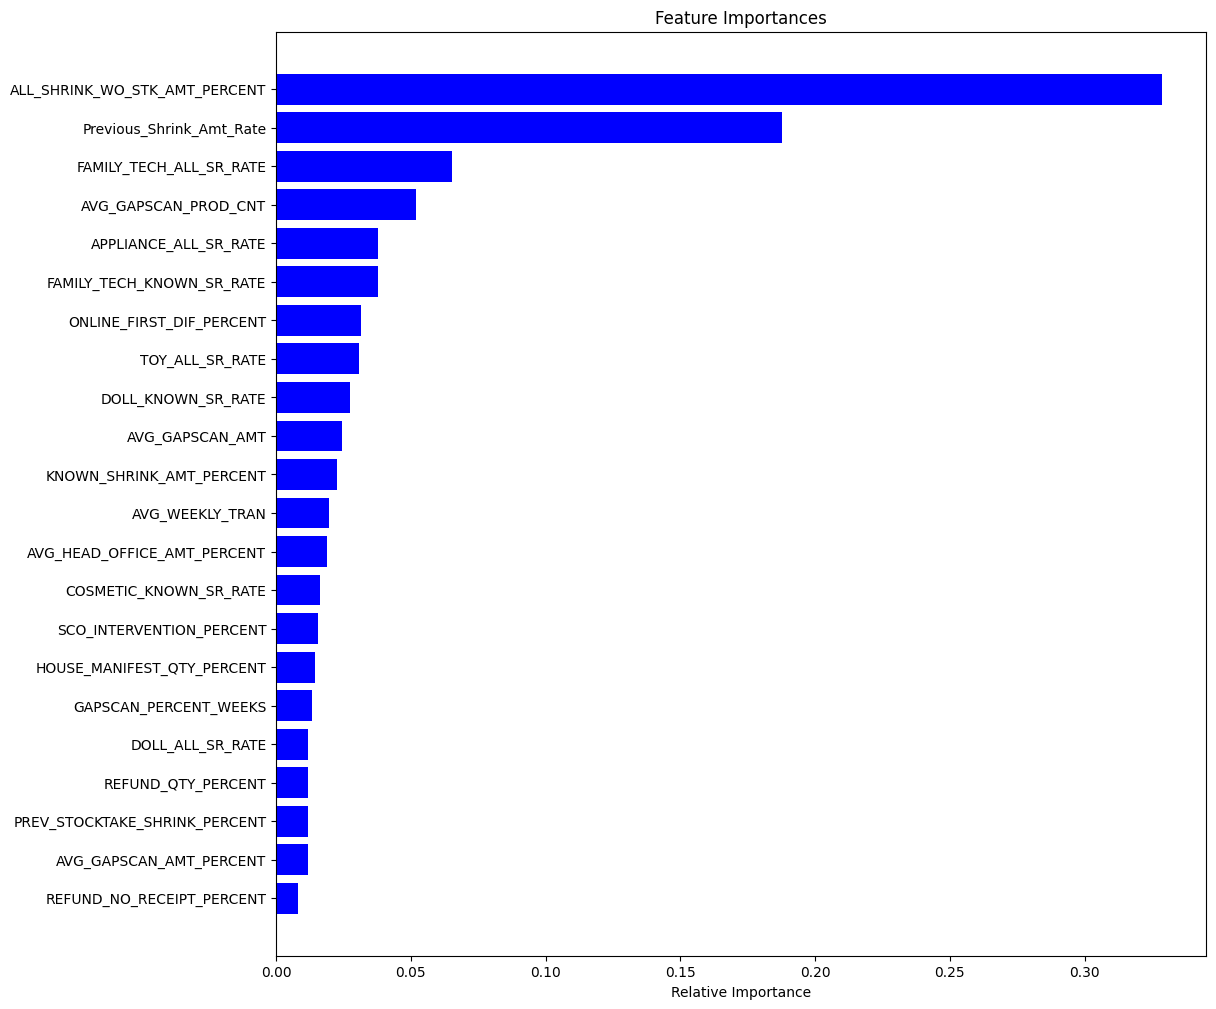

In [250]:
get_ipython().run_line_magic('matplotlib', 'inline')
features = X_train_Metro.columns
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices], color='b',align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize = 10)
plt.xlabel('Relative Importance')

#### Final Metro Model

In [59]:
##### Final Metro Model
# Creating Target and Regressor Subsets
Y_Metro = data_Metro['Shrink_Amt_Rate']
X_Metro =  data_Metro[[
#data_Metro_temp = data_Metro[['Shrink_Amt_Rate',
           'LOCATION_SOURCE_IDENTIFIER',
           'START_DATE', 'END_DATE',
           'AVG_WEEKLY_TRAN',
           'GAPSCAN_PERCENT_WEEKS',
           'AVG_GAPSCAN_PROD_CNT',
           'REFUND_TRAN_PERCENT',
           'REFUND_QTY_PERCENT',
           'REFUND_NO_RECEIPT_PERCENT',
           #'REFUND_NO_RECEIPT_QTY_PERCENT', 
           #'SELF_CHECKOUT_PERCENT',
           'AVG_GAPSCAN_AMT_PERCENT',
           #'AVG_GAPSCAN_QTY_PERCENT',
           'AVG_HEAD_OFFICE_AMT_PERCENT', 
           #'AVG_HEAD_OFFICE_QTY_PERCENT',
           #'HOUSE_MANIFEST_QTY_PERCENT', 
           #'AVG_NEG_SOH_QTY_PERCENT',
           'AVG_NEG_SOH_AMT_PERCENT', 
           'AVG_NEG_SOH_PROD_CNT_PERCENT',
           'KNOWN_SHRINK_AMT_PERCENT',
           'ALL_SHRINK_WO_STK_AMT_PERCENT',
           'ONLINE_FIRST_DIF_PERCENT',
           'SCO_INTERVENTION_PERCENT',
           #'AVG_SOH_COST_AMT', 
           #'AVG_SALES_AMT',
           #'AVG_GAPSCAN_AMT',
           'Previous_Shrink_Amt_Rate',
           #'PREV_STOCKTAKE_SHRINK_PERCENT',
           'COSMETIC_KNOWN_SR_RATE',
           'APPLIANCE_KNOWN_SR_RATE', 
           'DOLL_KNOWN_SR_RATE', 
           'TOY_KNOWN_SR_RATE',
           'FAMILY_TECH_KNOWN_SR_RATE',
           'COSMETIC_ALL_SR_RATE', 
           'APPLIANCE_ALL_SR_RATE', 
           'DOLL_ALL_SR_RATE',
           'TOY_ALL_SR_RATE',
           'FAMILY_TECH_ALL_SR_RATE'
        ]]
#train_Metro_raw = data_Metro_temp[data_Metro_temp['END_DATE']!='20/02/2022']
#test_Metro_raw = data_Metro_temp[data_Metro_temp['END_DATE']=='20/02/2022']

# Split the data into train and test data:
X_train_Metro_raw, X_test_Metro_raw, Y_train_Metro, Y_test_Metro = train_test_split(X_Metro, Y_Metro, test_size = 0.2, random_state=123)

"""
Y_train_Metro = train_Metro_raw['Shrink_Amt_Rate']
X_train_Metro_raw = train_Metro_raw.drop(['Shrink_Amt_Rate'], axis=1)
Y_test_Metro = test_Metro_raw['Shrink_Amt_Rate']
X_test_Metro_raw = test_Metro_raw.drop(['Shrink_Amt_Rate'], axis=1)
"""

# Build the model with the random forest regression algorithm:
X_train_Metro = X_train_Metro_raw.drop(['LOCATION_SOURCE_IDENTIFIER','START_DATE','END_DATE'], axis=1)
X_test_Metro = X_test_Metro_raw.drop(['LOCATION_SOURCE_IDENTIFIER','START_DATE','END_DATE'], axis=1)
model_Metro = RandomForestRegressor(max_depth=40, random_state=0, n_estimators=40, max_leaf_nodes=40)
#model_Metro = RandomForestRegressor(random_state=0, max_features=2)
model_Metro.fit(X_train_Metro, Y_train_Metro)
# Make predictions on test data using the model trained on original data
predictions_Metro = model_Metro.predict(X_test_Metro)
# Performance metrics
errors_Metro = predictions_Metro - Y_test_Metro
abs_errors_Metro = abs(predictions_Metro - Y_test_Metro)
abs_Y_test_Metro = abs(Y_test_Metro)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(abs_errors_Metro), 5), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape_Metro = 100 * (abs_errors_Metro / abs_Y_test_Metro)
# Calculate and display accuracy
accuracy_Metro = 100 - np.mean(mape_Metro)
print('Accuracy Metro:', round(accuracy_Metro, 2), '%.')
print('Mape Metro:', round(np.mean(mape_Metro), 2), '%.')
print('Mape Metro Max:', round(np.max(mape_Metro), 2), '%.')
print('Abs Error Metro Max:', round(np.max(abs_errors_Metro)*100, 2), '%.')

Metrics for Random Forest Trained on Original Data
Average absolute error: 0.00408 degrees.
Accuracy Metro: 81.5 %.
Mape Metro: 18.5 %.
Mape Metro Max: 137.33 %.
Abs Error Metro Max: 2.22 %.


In [28]:
predictions_train_Metro = model_Metro.predict(X_train_Metro)
# Performance metrics
errors_train_Metro = predictions_train_Metro - Y_train_Metro
abs_errors_train_Metro = abs(predictions_train_Metro - Y_train_Metro)
abs_Y_train_Metro = abs(Y_train_Metro)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(abs_errors_train_Metro), 5), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape_train_Metro = 100 * (abs_errors_train_Metro / abs_Y_train_Metro)
# Calculate and display accuracy
accuracy_train_Metro = 100 - np.mean(mape_train_Metro)
print('Accuracy Metro:', round(accuracy_train_Metro, 2), '%.')
print('Mape Metro:', round(np.mean(mape_train_Metro), 2), '%.')
print('Mape Metro Max:', round(np.max(mape_train_Metro), 2), '%.')
print('Abs Error Metro Max:', round(np.max(abs_errors_train_Metro)*100, 2), '%.')

Metrics for Random Forest Trained on Original Data
Average absolute error: 0.00179 degrees.
Accuracy Metro: 91.41 %.
Mape Metro: 8.59 %.
Mape Metro Max: 112.75 %.
Abs Error Metro Max: 0.82 %.


In [29]:
model_Metro.feature_importances_

array([0.00934104, 0.01347894, 0.01748432, 0.00876115, 0.0201769 ,
       0.01170254, 0.0132891 , 0.01653127, 0.00872754, 0.01780344,
       0.00948776, 0.23157433, 0.024665  , 0.00341369, 0.26116503,
       0.01544158, 0.01648363, 0.0112763 , 0.01701754, 0.01116933,
       0.00960081, 0.17829946, 0.01148173, 0.01966627, 0.04196132])

In [30]:
importances = model_Metro.feature_importances_
indices = np.argsort(importances)
print(indices)

[13  8  3  0 10 20 19 17 22  5  6  1 15 16  7 18  2  9 23  4 12 24 21 11
 14]


Text(0.5, 0, 'Relative Importance')

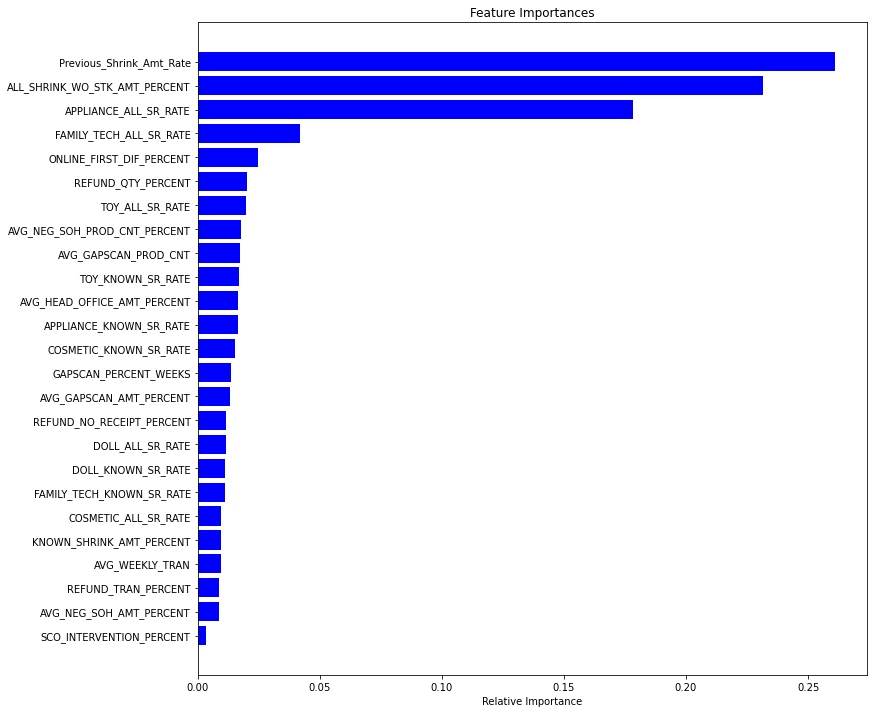

In [31]:
get_ipython().run_line_magic('matplotlib', 'inline')
features = X_train_Metro.columns
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices], color='b',align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize = 10)
plt.xlabel('Relative Importance')

#### Metro Model with Prev Shrink Rate and PREV_STOCKTAKE_SHRINK_PERCENT

In [65]:
##### Final Metro Model
# Creating Target and Regressor Subsets
Y_Metro = data_Metro['Shrink_Amt_Rate']
X_Metro =  data_Metro[[
#data_Metro_temp = data_Metro[['Shrink_Amt_Rate',
           'LOCATION_SOURCE_IDENTIFIER',
           'START_DATE', 'END_DATE',
           #'AVG_WEEKLY_TRAN',
           'GAPSCAN_PERCENT_WEEKS',
           'AVG_GAPSCAN_PROD_CNT',
           'REFUND_TRAN_PERCENT',
           'REFUND_QTY_PERCENT',
           'REFUND_NO_RECEIPT_PERCENT',
           'REFUND_NO_RECEIPT_QTY_PERCENT', 
           #'SELF_CHECKOUT_PERCENT',
           'AVG_GAPSCAN_AMT_PERCENT',
           'AVG_GAPSCAN_QTY_PERCENT',
           #'AVG_HEAD_OFFICE_AMT_PERCENT', 
           #'AVG_HEAD_OFFICE_QTY_PERCENT',
           'HOUSE_MANIFEST_QTY_PERCENT', 
           'AVG_NEG_SOH_QTY_PERCENT',
           'AVG_NEG_SOH_AMT_PERCENT', 
           'AVG_NEG_SOH_PROD_CNT_PERCENT',
           'KNOWN_SHRINK_AMT_PERCENT',
           'ALL_SHRINK_WO_STK_AMT_PERCENT',
           'ONLINE_FIRST_DIF_PERCENT',
           'SCO_INTERVENTION_PERCENT',
           #'AVG_SOH_COST_AMT', 
           #'AVG_SALES_AMT',
           #'AVG_GAPSCAN_AMT',
           'Previous_Shrink_Amt_Rate',
           'PREV_STOCKTAKE_SHRINK_PERCENT',
           'COSMETIC_KNOWN_SR_RATE',
           'APPLIANCE_KNOWN_SR_RATE', 
           'DOLL_KNOWN_SR_RATE', 
           #'TOY_KNOWN_SR_RATE',
           'FAMILY_TECH_KNOWN_SR_RATE',
           'COSMETIC_ALL_SR_RATE', 
           'APPLIANCE_ALL_SR_RATE', 
           'DOLL_ALL_SR_RATE',
           'TOY_ALL_SR_RATE',
           'FAMILY_TECH_ALL_SR_RATE'
        ]]
#train_Metro_raw = data_Metro_temp[data_Metro_temp['END_DATE']!='20/02/2022']
#test_Metro_raw = data_Metro_temp[data_Metro_temp['END_DATE']=='20/02/2022']

# Split the data into train and test data:
X_train_Metro_raw, X_test_Metro_raw, Y_train_Metro, Y_test_Metro = train_test_split(X_Metro, Y_Metro, test_size = 0.2, random_state=123)

"""
Y_train_Metro = train_Metro_raw['Shrink_Amt_Rate']
X_train_Metro_raw = train_Metro_raw.drop(['Shrink_Amt_Rate'], axis=1)
Y_test_Metro = test_Metro_raw['Shrink_Amt_Rate']
X_test_Metro_raw = test_Metro_raw.drop(['Shrink_Amt_Rate'], axis=1)
"""

# Build the model with the random forest regression algorithm:
X_train_Metro = X_train_Metro_raw.drop(['LOCATION_SOURCE_IDENTIFIER','START_DATE','END_DATE'], axis=1)
X_test_Metro = X_test_Metro_raw.drop(['LOCATION_SOURCE_IDENTIFIER','START_DATE','END_DATE'], axis=1)
model_Metro = RandomForestRegressor(max_depth=40, random_state=0, n_estimators=40, max_leaf_nodes=40)
#model_Metro = RandomForestRegressor(random_state=0, max_features=2)
model_Metro.fit(X_train_Metro, Y_train_Metro)
# Make predictions on test data using the model trained on original data
predictions_Metro = model_Metro.predict(X_test_Metro)
# Performance metrics
errors_Metro = predictions_Metro - Y_test_Metro
abs_errors_Metro = abs(predictions_Metro - Y_test_Metro)
abs_Y_test_Metro = abs(Y_test_Metro)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(abs_errors_Metro), 5), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape_Metro = 100 * (abs_errors_Metro / abs_Y_test_Metro)
# Calculate and display accuracy
accuracy_Metro = 100 - np.mean(mape_Metro)
print('Accuracy Metro:', round(accuracy_Metro, 2), '%.')
print('Mape Metro:', round(np.mean(mape_Metro), 2), '%.')
print('Mape Metro Max:', round(np.max(mape_Metro), 2), '%.')
print('Abs Error Metro Max:', round(np.max(abs_errors_Metro)*100, 2), '%.')

Metrics for Random Forest Trained on Original Data
Average absolute error: 0.00331 degrees.
Accuracy Metro: 83.9 %.
Mape Metro: 16.1 %.
Mape Metro Max: 117.31 %.
Abs Error Metro Max: 1.5 %.


In [66]:
predictions_train_Metro = model_Metro.predict(X_train_Metro)
# Performance metrics
errors_train_Metro = predictions_train_Metro - Y_train_Metro
abs_errors_train_Metro = abs(predictions_train_Metro - Y_train_Metro)
abs_Y_train_Metro = abs(Y_train_Metro)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(abs_errors_train_Metro), 5), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape_train_Metro = 100 * (abs_errors_train_Metro / abs_Y_train_Metro)
# Calculate and display accuracy
accuracy_train_Metro = 100 - np.mean(mape_train_Metro)
print('Accuracy Metro:', round(accuracy_train_Metro, 2), '%.')
print('Mape Metro:', round(np.mean(mape_train_Metro), 2), '%.')
print('Mape Metro Max:', round(np.max(mape_train_Metro), 2), '%.')
print('Abs Error Metro Max:', round(np.max(abs_errors_train_Metro)*100, 2), '%.')

Metrics for Random Forest Trained on Original Data
Average absolute error: 0.00178 degrees.
Accuracy Metro: 91.38 %.
Mape Metro: 8.62 %.
Mape Metro Max: 99.49 %.
Abs Error Metro Max: 0.8 %.


In [67]:
model_Metro.feature_importances_

array([0.01815338, 0.02276703, 0.01053778, 0.01856503, 0.00782518,
       0.00812077, 0.01241902, 0.00624986, 0.00986546, 0.00280499,
       0.00728938, 0.00659913, 0.01176621, 0.3046131 , 0.0239291 ,
       0.00690786, 0.217155  , 0.01605031, 0.01675516, 0.01043932,
       0.00710311, 0.01254681, 0.0101465 , 0.17194225, 0.01821258,
       0.03090104, 0.01033464])

In [68]:
importances = model_Metro.feature_importances_
indices = np.argsort(importances)
print(indices)

[ 9  7 11 15 20 10  4  5  8 22 26 19  2 12  6 21 17 18  0 24  3  1 14 25
 23 16 13]


Text(0.5, 0, 'Relative Importance')

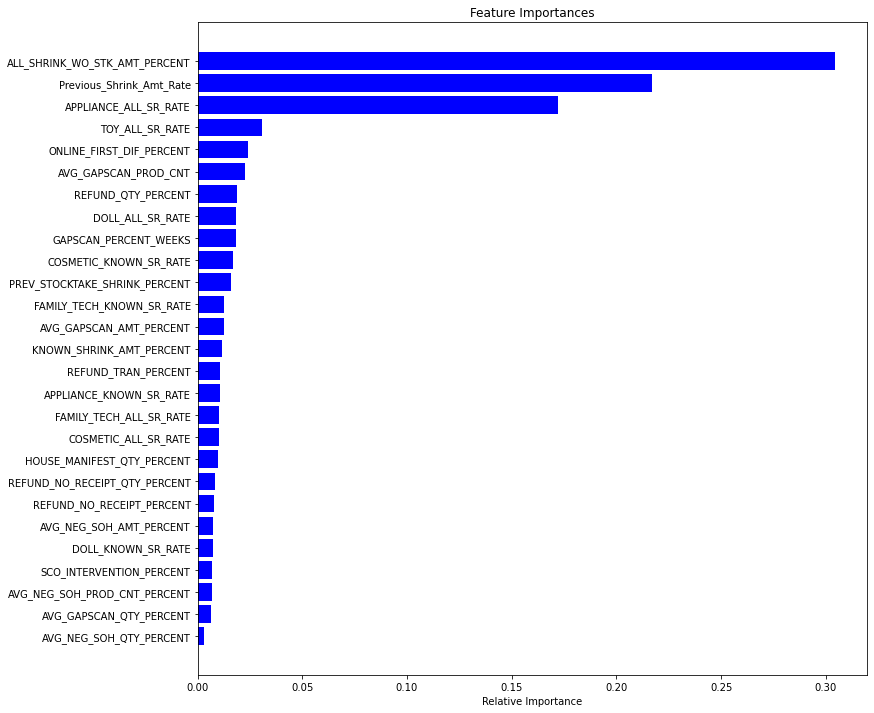

In [69]:
get_ipython().run_line_magic('matplotlib', 'inline')
features = X_train_Metro.columns
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices], color='b',align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize = 10)
plt.xlabel('Relative Importance')

#### Metro Model without Prev Shrink Rate and PREV_STOCKTAKE_SHRINK_PERCENT

In [70]:
##### Final Metro Model
# Creating Target and Regressor Subsets
Y_Metro = data_Metro['Shrink_Amt_Rate']
X_Metro =  data_Metro[[
#data_Metro_temp = data_Metro[['Shrink_Amt_Rate',
           'LOCATION_SOURCE_IDENTIFIER',
           'START_DATE', 'END_DATE',
           #'AVG_WEEKLY_TRAN',
           'GAPSCAN_PERCENT_WEEKS',
           'AVG_GAPSCAN_PROD_CNT',
           'REFUND_TRAN_PERCENT',
           'REFUND_QTY_PERCENT',
           'REFUND_NO_RECEIPT_PERCENT',
           'REFUND_NO_RECEIPT_QTY_PERCENT', 
           'SELF_CHECKOUT_PERCENT',
           'AVG_GAPSCAN_AMT_PERCENT',
           'AVG_GAPSCAN_QTY_PERCENT',
           #'AVG_HEAD_OFFICE_AMT_PERCENT', 
           #'AVG_HEAD_OFFICE_QTY_PERCENT',
           'HOUSE_MANIFEST_QTY_PERCENT', 
           'AVG_NEG_SOH_QTY_PERCENT',
           'AVG_NEG_SOH_AMT_PERCENT', 
           'AVG_NEG_SOH_PROD_CNT_PERCENT',
           'KNOWN_SHRINK_AMT_PERCENT',
           'ALL_SHRINK_WO_STK_AMT_PERCENT',
           'ONLINE_FIRST_DIF_PERCENT',
           'SCO_INTERVENTION_PERCENT',
           #'AVG_SOH_COST_AMT', 
           #'AVG_SALES_AMT',
           #'AVG_GAPSCAN_AMT',
           #'Previous_Shrink_Amt_Rate',
           'PREV_STOCKTAKE_SHRINK_PERCENT',
           'COSMETIC_KNOWN_SR_RATE',
           'APPLIANCE_KNOWN_SR_RATE', 
           'DOLL_KNOWN_SR_RATE', 
           'TOY_KNOWN_SR_RATE',
           'FAMILY_TECH_KNOWN_SR_RATE',
           'COSMETIC_ALL_SR_RATE', 
           'APPLIANCE_ALL_SR_RATE', 
           'DOLL_ALL_SR_RATE',
           'TOY_ALL_SR_RATE',
           'FAMILY_TECH_ALL_SR_RATE'
        ]]
#train_Metro_raw = data_Metro_temp[data_Metro_temp['END_DATE']!='20/02/2022']
#test_Metro_raw = data_Metro_temp[data_Metro_temp['END_DATE']=='20/02/2022']

# Split the data into train and test data:
X_train_Metro_raw, X_test_Metro_raw, Y_train_Metro, Y_test_Metro = train_test_split(X_Metro, Y_Metro, test_size = 0.2, random_state=123)

"""
Y_train_Metro = train_Metro_raw['Shrink_Amt_Rate']
X_train_Metro_raw = train_Metro_raw.drop(['Shrink_Amt_Rate'], axis=1)
Y_test_Metro = test_Metro_raw['Shrink_Amt_Rate']
X_test_Metro_raw = test_Metro_raw.drop(['Shrink_Amt_Rate'], axis=1)
"""

# Build the model with the random forest regression algorithm:
X_train_Metro = X_train_Metro_raw.drop(['LOCATION_SOURCE_IDENTIFIER','START_DATE','END_DATE'], axis=1)
X_test_Metro = X_test_Metro_raw.drop(['LOCATION_SOURCE_IDENTIFIER','START_DATE','END_DATE'], axis=1)
model_Metro = RandomForestRegressor(max_depth=40, random_state=0, n_estimators=40, max_leaf_nodes=40)
#model_Metro = RandomForestRegressor(random_state=0, max_features=2)
model_Metro.fit(X_train_Metro, Y_train_Metro)
# Make predictions on test data using the model trained on original data
predictions_Metro = model_Metro.predict(X_test_Metro)
# Performance metrics
errors_Metro = predictions_Metro - Y_test_Metro
abs_errors_Metro = abs(predictions_Metro - Y_test_Metro)
abs_Y_test_Metro = abs(Y_test_Metro)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(abs_errors_Metro), 5), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape_Metro = 100 * (abs_errors_Metro / abs_Y_test_Metro)
# Calculate and display accuracy
accuracy_Metro = 100 - np.mean(mape_Metro)
print('Accuracy Metro:', round(accuracy_Metro, 2), '%.')
print('Mape Metro:', round(np.mean(mape_Metro), 2), '%.')
print('Mape Metro Max:', round(np.max(mape_Metro), 2), '%.')
print('Abs Error Metro Max:', round(np.max(abs_errors_Metro)*100, 2), '%.')

Metrics for Random Forest Trained on Original Data
Average absolute error: 0.00341 degrees.
Accuracy Metro: 83.62 %.
Mape Metro: 16.38 %.
Mape Metro Max: 111.9 %.
Abs Error Metro Max: 1.66 %.


In [71]:
predictions_train_Metro = model_Metro.predict(X_train_Metro)
# Performance metrics
errors_train_Metro = predictions_train_Metro - Y_train_Metro
abs_errors_train_Metro = abs(predictions_train_Metro - Y_train_Metro)
abs_Y_train_Metro = abs(Y_train_Metro)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(abs_errors_train_Metro), 5), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape_train_Metro = 100 * (abs_errors_train_Metro / abs_Y_train_Metro)
# Calculate and display accuracy
accuracy_train_Metro = 100 - np.mean(mape_train_Metro)
print('Accuracy Metro:', round(accuracy_train_Metro, 2), '%.')
print('Mape Metro:', round(np.mean(mape_train_Metro), 2), '%.')
print('Mape Metro Max:', round(np.max(mape_train_Metro), 2), '%.')
print('Abs Error Metro Max:', round(np.max(abs_errors_train_Metro)*100, 2), '%.')

Metrics for Random Forest Trained on Original Data
Average absolute error: 0.00185 degrees.
Accuracy Metro: 90.92 %.
Mape Metro: 9.08 %.
Mape Metro Max: 96.03 %.
Abs Error Metro Max: 0.74 %.


In [72]:
model_Metro.feature_importances_

array([0.0093142 , 0.03543567, 0.00961171, 0.03006106, 0.00623915,
       0.00983812, 0.00965614, 0.01142151, 0.00784285, 0.01161734,
       0.00601955, 0.00336297, 0.01669578, 0.0235547 , 0.32131931,
       0.04263257, 0.00931409, 0.02244217, 0.01940167, 0.01832793,
       0.01607514, 0.00836325, 0.01816713, 0.01792569, 0.22243962,
       0.0193094 , 0.0538083 , 0.01980297])

In [73]:
importances = model_Metro.feature_importances_
indices = np.argsort(importances)
print(indices)

[11 10  4  8 21 16  0  2  6  5  7  9 20 12 23 22 19 25 18 27 17 13  3  1
 15 26 24 14]


Text(0.5, 0, 'Relative Importance')

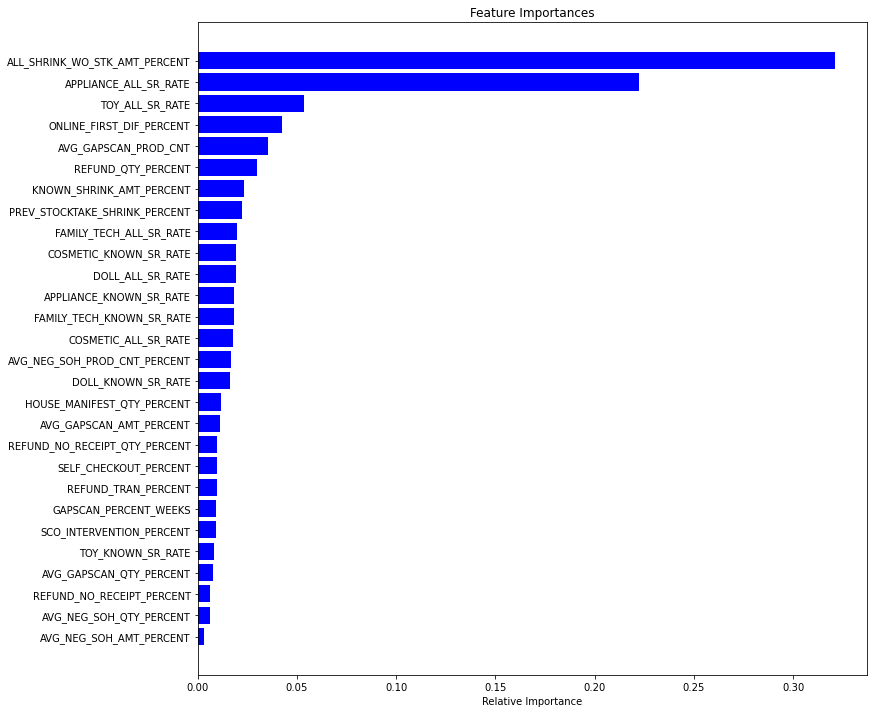

In [74]:
get_ipython().run_line_magic('matplotlib', 'inline')
features = X_train_Metro.columns
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices], color='b',align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize = 10)
plt.xlabel('Relative Importance')

#### Metro Model with Prev Shrink Rate and without PREV_STOCKTAKE_SHRINK_PERCENT

In [75]:
##### Final Metro Model
# Creating Target and Regressor Subsets
Y_Metro = data_Metro['Shrink_Amt_Rate']
X_Metro =  data_Metro[[
#data_Metro_temp = data_Metro[['Shrink_Amt_Rate',
           'LOCATION_SOURCE_IDENTIFIER',
           'START_DATE', 'END_DATE',
           #'AVG_WEEKLY_TRAN',
           'GAPSCAN_PERCENT_WEEKS',
           'AVG_GAPSCAN_PROD_CNT',
           'REFUND_TRAN_PERCENT',
           'REFUND_QTY_PERCENT',
           'REFUND_NO_RECEIPT_PERCENT',
           'REFUND_NO_RECEIPT_QTY_PERCENT', 
           'SELF_CHECKOUT_PERCENT',
           'AVG_GAPSCAN_AMT_PERCENT',
           'AVG_GAPSCAN_QTY_PERCENT',
           #'AVG_HEAD_OFFICE_AMT_PERCENT', 
           #'AVG_HEAD_OFFICE_QTY_PERCENT',
           'HOUSE_MANIFEST_QTY_PERCENT', 
           'AVG_NEG_SOH_QTY_PERCENT',
           'AVG_NEG_SOH_AMT_PERCENT', 
           'AVG_NEG_SOH_PROD_CNT_PERCENT',
           'KNOWN_SHRINK_AMT_PERCENT',
           'ALL_SHRINK_WO_STK_AMT_PERCENT',
           'ONLINE_FIRST_DIF_PERCENT',
           'SCO_INTERVENTION_PERCENT',
           #'AVG_SOH_COST_AMT', 
           #'AVG_SALES_AMT',
           #'AVG_GAPSCAN_AMT',
           'Previous_Shrink_Amt_Rate',
           #'PREV_STOCKTAKE_SHRINK_PERCENT',
           'COSMETIC_KNOWN_SR_RATE',
           'APPLIANCE_KNOWN_SR_RATE', 
           'DOLL_KNOWN_SR_RATE', 
           #'TOY_KNOWN_SR_RATE',
           'FAMILY_TECH_KNOWN_SR_RATE',
           'COSMETIC_ALL_SR_RATE', 
           'APPLIANCE_ALL_SR_RATE', 
           'DOLL_ALL_SR_RATE',
           'TOY_ALL_SR_RATE',
           'FAMILY_TECH_ALL_SR_RATE'
        ]]
#train_Metro_raw = data_Metro_temp[data_Metro_temp['END_DATE']!='20/02/2022']
#test_Metro_raw = data_Metro_temp[data_Metro_temp['END_DATE']=='20/02/2022']

# Split the data into train and test data:
X_train_Metro_raw, X_test_Metro_raw, Y_train_Metro, Y_test_Metro = train_test_split(X_Metro, Y_Metro, test_size = 0.2, random_state=123)

"""
Y_train_Metro = train_Metro_raw['Shrink_Amt_Rate']
X_train_Metro_raw = train_Metro_raw.drop(['Shrink_Amt_Rate'], axis=1)
Y_test_Metro = test_Metro_raw['Shrink_Amt_Rate']
X_test_Metro_raw = test_Metro_raw.drop(['Shrink_Amt_Rate'], axis=1)
"""

# Build the model with the random forest regression algorithm:
X_train_Metro = X_train_Metro_raw.drop(['LOCATION_SOURCE_IDENTIFIER','START_DATE','END_DATE'], axis=1)
X_test_Metro = X_test_Metro_raw.drop(['LOCATION_SOURCE_IDENTIFIER','START_DATE','END_DATE'], axis=1)
model_Metro = RandomForestRegressor(max_depth=40, random_state=0, n_estimators=40, max_leaf_nodes=40)
#model_Metro = RandomForestRegressor(random_state=0, max_features=2)
model_Metro.fit(X_train_Metro, Y_train_Metro)
# Make predictions on test data using the model trained on original data
predictions_Metro = model_Metro.predict(X_test_Metro)
# Performance metrics
errors_Metro = predictions_Metro - Y_test_Metro
abs_errors_Metro = abs(predictions_Metro - Y_test_Metro)
abs_Y_test_Metro = abs(Y_test_Metro)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(abs_errors_Metro), 5), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape_Metro = 100 * (abs_errors_Metro / abs_Y_test_Metro)
# Calculate and display accuracy
accuracy_Metro = 100 - np.mean(mape_Metro)
print('Accuracy Metro:', round(accuracy_Metro, 2), '%.')
print('Mape Metro:', round(np.mean(mape_Metro), 2), '%.')
print('Mape Metro Max:', round(np.max(mape_Metro), 2), '%.')
print('Abs Error Metro Max:', round(np.max(abs_errors_Metro)*100, 2), '%.')

Metrics for Random Forest Trained on Original Data
Average absolute error: 0.00326 degrees.
Accuracy Metro: 84.13 %.
Mape Metro: 15.87 %.
Mape Metro Max: 111.88 %.
Abs Error Metro Max: 1.46 %.


In [76]:
predictions_train_Metro = model_Metro.predict(X_train_Metro)
# Performance metrics
errors_train_Metro = predictions_train_Metro - Y_train_Metro
abs_errors_train_Metro = abs(predictions_train_Metro - Y_train_Metro)
abs_Y_train_Metro = abs(Y_train_Metro)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(abs_errors_train_Metro), 5), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape_train_Metro = 100 * (abs_errors_train_Metro / abs_Y_train_Metro)
# Calculate and display accuracy
accuracy_train_Metro = 100 - np.mean(mape_train_Metro)
print('Accuracy Metro:', round(accuracy_train_Metro, 2), '%.')
print('Mape Metro:', round(np.mean(mape_train_Metro), 2), '%.')
print('Mape Metro Max:', round(np.max(mape_train_Metro), 2), '%.')
print('Abs Error Metro Max:', round(np.max(abs_errors_train_Metro)*100, 2), '%.')

Metrics for Random Forest Trained on Original Data
Average absolute error: 0.00179 degrees.
Accuracy Metro: 91.31 %.
Mape Metro: 8.69 %.
Mape Metro Max: 106.37 %.
Abs Error Metro Max: 0.78 %.


In [77]:
model_Metro.feature_importances_

array([0.01998763, 0.02374975, 0.00978064, 0.01912506, 0.00923903,
       0.00759341, 0.00573486, 0.01298943, 0.00609572, 0.01118258,
       0.003648  , 0.00635679, 0.00661231, 0.01180891, 0.30463445,
       0.02608216, 0.00743144, 0.21794785, 0.01584202, 0.01118156,
       0.00690781, 0.01275732, 0.00993447, 0.17325841, 0.01798946,
       0.03178922, 0.01033973])

In [78]:
importances = model_Metro.feature_importances_
indices = np.argsort(importances)
print(indices)

[10  6  8 11 12 20 16  5  4  2 22 26 19  9 13 21  7 18 24  3  0  1 15 25
 23 17 14]


Text(0.5, 0, 'Relative Importance')

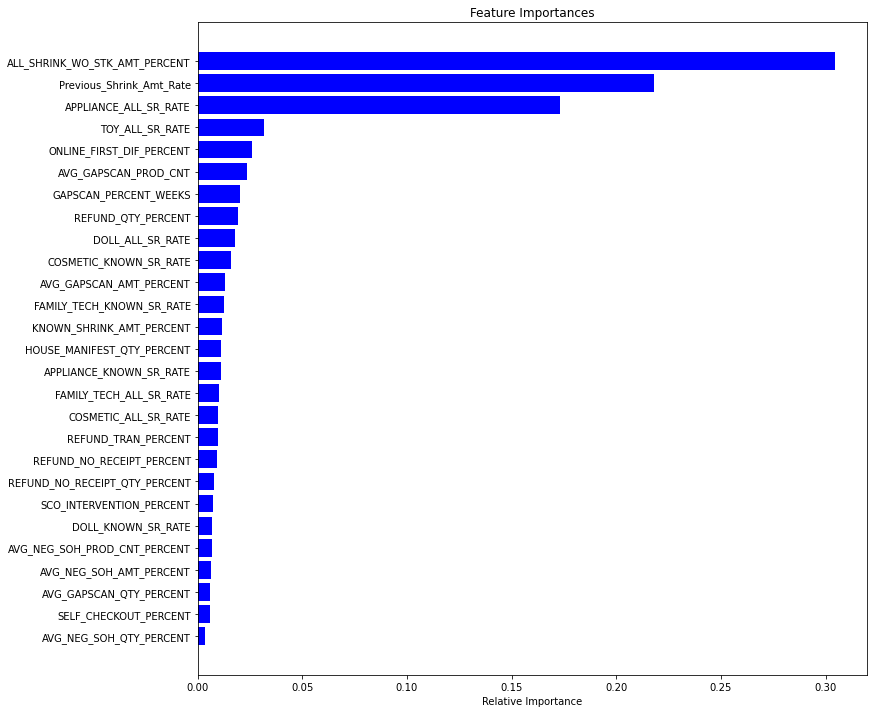

In [79]:
get_ipython().run_line_magic('matplotlib', 'inline')
features = X_train_Metro.columns
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices], color='b',align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize = 10)
plt.xlabel('Relative Importance')

#### Metro Model without Prev Shrink Rate and without PREV_STOCKTAKE_SHRINK_PERCENT

In [80]:
##### Final Metro Model
# Creating Target and Regressor Subsets
Y_Metro = data_Metro['Shrink_Amt_Rate']
X_Metro =  data_Metro[[
#data_Metro_temp = data_Metro[['Shrink_Amt_Rate',
           'LOCATION_SOURCE_IDENTIFIER',
           'START_DATE', 'END_DATE',
           #'AVG_WEEKLY_TRAN',
           'GAPSCAN_PERCENT_WEEKS',
           'AVG_GAPSCAN_PROD_CNT',
           'REFUND_TRAN_PERCENT',
           'REFUND_QTY_PERCENT',
           'REFUND_NO_RECEIPT_PERCENT',
           'REFUND_NO_RECEIPT_QTY_PERCENT', 
           'SELF_CHECKOUT_PERCENT',
           'AVG_GAPSCAN_AMT_PERCENT',
           #'AVG_GAPSCAN_QTY_PERCENT',
           #'AVG_HEAD_OFFICE_AMT_PERCENT', 
           #'AVG_HEAD_OFFICE_QTY_PERCENT',
           'HOUSE_MANIFEST_QTY_PERCENT', 
           'AVG_NEG_SOH_QTY_PERCENT',
           'AVG_NEG_SOH_AMT_PERCENT', 
           'AVG_NEG_SOH_PROD_CNT_PERCENT',
           'KNOWN_SHRINK_AMT_PERCENT',
           'ALL_SHRINK_WO_STK_AMT_PERCENT',
           'ONLINE_FIRST_DIF_PERCENT',
           'SCO_INTERVENTION_PERCENT',
           #'AVG_SOH_COST_AMT', 
           #'AVG_SALES_AMT',
           #'AVG_GAPSCAN_AMT',
           #'Previous_Shrink_Amt_Rate',
           #'PREV_STOCKTAKE_SHRINK_PERCENT',
           'COSMETIC_KNOWN_SR_RATE',
           'APPLIANCE_KNOWN_SR_RATE', 
           'DOLL_KNOWN_SR_RATE', 
           'TOY_KNOWN_SR_RATE',
           'FAMILY_TECH_KNOWN_SR_RATE',
           'COSMETIC_ALL_SR_RATE', 
           'APPLIANCE_ALL_SR_RATE', 
           'DOLL_ALL_SR_RATE',
           'TOY_ALL_SR_RATE',
           'FAMILY_TECH_ALL_SR_RATE'
        ]]
#train_Metro_raw = data_Metro_temp[data_Metro_temp['END_DATE']!='20/02/2022']
#test_Metro_raw = data_Metro_temp[data_Metro_temp['END_DATE']=='20/02/2022']

# Split the data into train and test data:
X_train_Metro_raw, X_test_Metro_raw, Y_train_Metro, Y_test_Metro = train_test_split(X_Metro, Y_Metro, test_size = 0.2, random_state=123)

"""
Y_train_Metro = train_Metro_raw['Shrink_Amt_Rate']
X_train_Metro_raw = train_Metro_raw.drop(['Shrink_Amt_Rate'], axis=1)
Y_test_Metro = test_Metro_raw['Shrink_Amt_Rate']
X_test_Metro_raw = test_Metro_raw.drop(['Shrink_Amt_Rate'], axis=1)
"""

# Build the model with the random forest regression algorithm:
X_train_Metro = X_train_Metro_raw.drop(['LOCATION_SOURCE_IDENTIFIER','START_DATE','END_DATE'], axis=1)
X_test_Metro = X_test_Metro_raw.drop(['LOCATION_SOURCE_IDENTIFIER','START_DATE','END_DATE'], axis=1)
model_Metro = RandomForestRegressor(max_depth=40, random_state=0, n_estimators=40, max_leaf_nodes=40)
#model_Metro = RandomForestRegressor(random_state=0, max_features=2)
model_Metro.fit(X_train_Metro, Y_train_Metro)
# Make predictions on test data using the model trained on original data
predictions_Metro = model_Metro.predict(X_test_Metro)
# Performance metrics
errors_Metro = predictions_Metro - Y_test_Metro
abs_errors_Metro = abs(predictions_Metro - Y_test_Metro)
abs_Y_test_Metro = abs(Y_test_Metro)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(abs_errors_Metro), 5), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape_Metro = 100 * (abs_errors_Metro / abs_Y_test_Metro)
# Calculate and display accuracy
accuracy_Metro = 100 - np.mean(mape_Metro)
print('Accuracy Metro:', round(accuracy_Metro, 2), '%.')
print('Mape Metro:', round(np.mean(mape_Metro), 2), '%.')
print('Mape Metro Max:', round(np.max(mape_Metro), 2), '%.')
print('Abs Error Metro Max:', round(np.max(abs_errors_Metro)*100, 2), '%.')

Metrics for Random Forest Trained on Original Data
Average absolute error: 0.0034 degrees.
Accuracy Metro: 83.75 %.
Mape Metro: 16.25 %.
Mape Metro Max: 97.51 %.
Abs Error Metro Max: 1.68 %.


In [81]:
predictions_train_Metro = model_Metro.predict(X_train_Metro)
# Performance metrics
errors_train_Metro = predictions_train_Metro - Y_train_Metro
abs_errors_train_Metro = abs(predictions_train_Metro - Y_train_Metro)
abs_Y_train_Metro = abs(Y_train_Metro)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(abs_errors_train_Metro), 5), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape_train_Metro = 100 * (abs_errors_train_Metro / abs_Y_train_Metro)
# Calculate and display accuracy
accuracy_train_Metro = 100 - np.mean(mape_train_Metro)
print('Accuracy Metro:', round(accuracy_train_Metro, 2), '%.')
print('Mape Metro:', round(np.mean(mape_train_Metro), 2), '%.')
print('Mape Metro Max:', round(np.max(mape_train_Metro), 2), '%.')
print('Abs Error Metro Max:', round(np.max(abs_errors_train_Metro)*100, 2), '%.')

Metrics for Random Forest Trained on Original Data
Average absolute error: 0.00188 degrees.
Accuracy Metro: 90.81 %.
Mape Metro: 9.19 %.
Mape Metro Max: 100.29 %.
Abs Error Metro Max: 0.74 %.


In [82]:
model_Metro.feature_importances_

array([0.01159599, 0.03873322, 0.01020265, 0.03214821, 0.00751426,
       0.01112814, 0.01099177, 0.0142053 , 0.01202292, 0.00561065,
       0.00469729, 0.01610787, 0.02417449, 0.32087145, 0.04681266,
       0.00956805, 0.0191798 , 0.02134219, 0.01543463, 0.00875722,
       0.01967563, 0.01970385, 0.22245484, 0.02061313, 0.05440936,
       0.02204441])

In [83]:
importances = model_Metro.feature_importances_
indices = np.argsort(importances)
print(indices)

[10  9  4 19 15  2  6  5  0  8  7 18 11 16 20 21 23 17 25 12  3  1 14 24
 22 13]


Text(0.5, 0, 'Relative Importance')

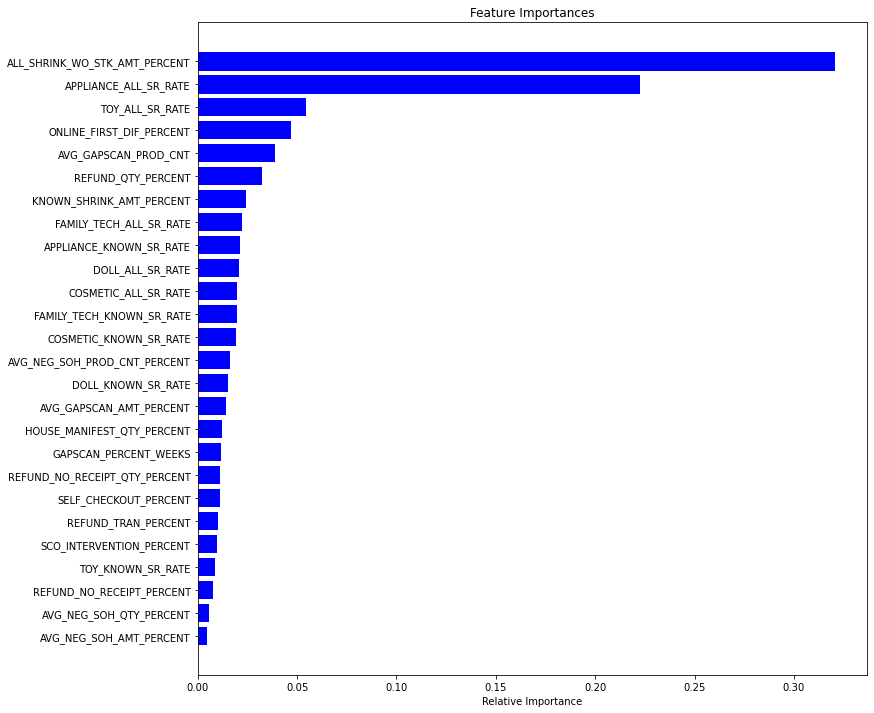

In [84]:
get_ipython().run_line_magic('matplotlib', 'inline')
features = X_train_Metro.columns
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices], color='b',align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize = 10)
plt.xlabel('Relative Importance')

#### Checking for 2022 data

In [559]:
#### Checking for 2022 data
data_Metro_temp = data_Metro[['Shrink_Amt_Rate',
           'LOCATION_SOURCE_IDENTIFIER',
           'START_DATE', 'END_DATE',
           #'AVG_WEEKLY_TRAN',
           'GAPSCAN_PERCENT_WEEKS',
           'AVG_GAPSCAN_PROD_CNT',
           'REFUND_TRAN_PERCENT',
           'REFUND_QTY_PERCENT',
           'REFUND_NO_RECEIPT_PERCENT',
           'REFUND_NO_RECEIPT_QTY_PERCENT', 
           'SELF_CHECKOUT_PERCENT',
           'AVG_GAPSCAN_AMT_PERCENT',
           'AVG_GAPSCAN_QTY_PERCENT',
           #'AVG_HEAD_OFFICE_AMT_PERCENT', 
           #'AVG_HEAD_OFFICE_QTY_PERCENT',
           'HOUSE_MANIFEST_QTY_PERCENT', 
           'AVG_NEG_SOH_QTY_PERCENT',
           'AVG_NEG_SOH_AMT_PERCENT', 
           'AVG_NEG_SOH_PROD_CNT_PERCENT',
           'KNOWN_SHRINK_AMT_PERCENT',
           'ALL_SHRINK_WO_STK_AMT_PERCENT',
           'ONLINE_FIRST_DIF_PERCENT',
           'SCO_INTERVENTION_PERCENT',
           #'AVG_SOH_COST_AMT', 
           #'AVG_SALES_AMT',
           #'AVG_GAPSCAN_AMT',
           #'Previous_Shrink_Amt_Rate',
           #'PREV_STOCKTAKE_SHRINK_PERCENT',
           'COSMETIC_KNOWN_SR_RATE',
           'APPLIANCE_KNOWN_SR_RATE', 
           'DOLL_KNOWN_SR_RATE', 
           'TOY_KNOWN_SR_RATE',
           'FAMILY_TECH_KNOWN_SR_RATE',
           'COSMETIC_ALL_SR_RATE', 
           'APPLIANCE_ALL_SR_RATE', 
           'DOLL_ALL_SR_RATE',
           'TOY_ALL_SR_RATE',
           'FAMILY_TECH_ALL_SR_RATE'
        ]]
test_Metro_raw = data_Metro_temp[data_Metro_temp['END_DATE']=='20/02/2022']
Y_test_Metro = test_Metro_raw['Shrink_Amt_Rate']
X_test_Metro_raw = test_Metro_raw.drop(['Shrink_Amt_Rate'], axis=1)
X_test_Metro = X_test_Metro_raw.drop(['LOCATION_SOURCE_IDENTIFIER','START_DATE','END_DATE'], axis=1)
predictions_Metro = model_Metro.predict(X_test_Metro)
# Performance metrics
errors_Metro = predictions_Metro - Y_test_Metro
abs_errors_Metro = abs(predictions_Metro - Y_test_Metro)
abs_Y_test_Metro = abs(Y_test_Metro)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(abs_errors_Metro), 5), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape_Metro = 100 * (abs_errors_Metro / abs_Y_test_Metro)
# Calculate and display accuracy
accuracy_Metro = 100 - np.mean(mape_Metro)
print('Accuracy Metro:', round(accuracy_Metro, 2), '%.')
print('Mape Metro:', round(np.mean(mape_Metro), 2), '%.')
print('Mape Metro Max:', round(np.max(mape_Metro), 2), '%.')
print('Abs Error Metro Max:', round(np.max(abs_errors_Metro)*100, 2), '%.')

Metrics for Random Forest Trained on Original Data
Average absolute error: 0.00242 degrees.
Accuracy Metro: 86.61 %.
Mape Metro: 13.39 %.
Mape Metro Max: 97.65 %.
Abs Error Metro Max: 1.28 %.


In [530]:
model_Metro.feature_importances_

array([0.01053784, 0.03774314, 0.00393948, 0.01054421, 0.01176075,
       0.01053024, 0.00710344, 0.00712745, 0.00536552, 0.01268986,
       0.00642557, 0.00674225, 0.00744001, 0.01400776, 0.54593295,
       0.0418195 , 0.00842921, 0.04590587, 0.01399807, 0.03007363,
       0.01122892, 0.00654109, 0.02495794, 0.00991648, 0.05554939,
       0.02221533, 0.01425892, 0.01721519])

In [531]:
importances = model_Metro.feature_importances_
indices = np.argsort(importances)
print(indices)

[ 2  8 10 21 11  6  7 12 16 23  5  0  3 20  4  9 18 13 26 27 25 22 19  1
 15 17 24 14]


Text(0.5, 0, 'Relative Importance')

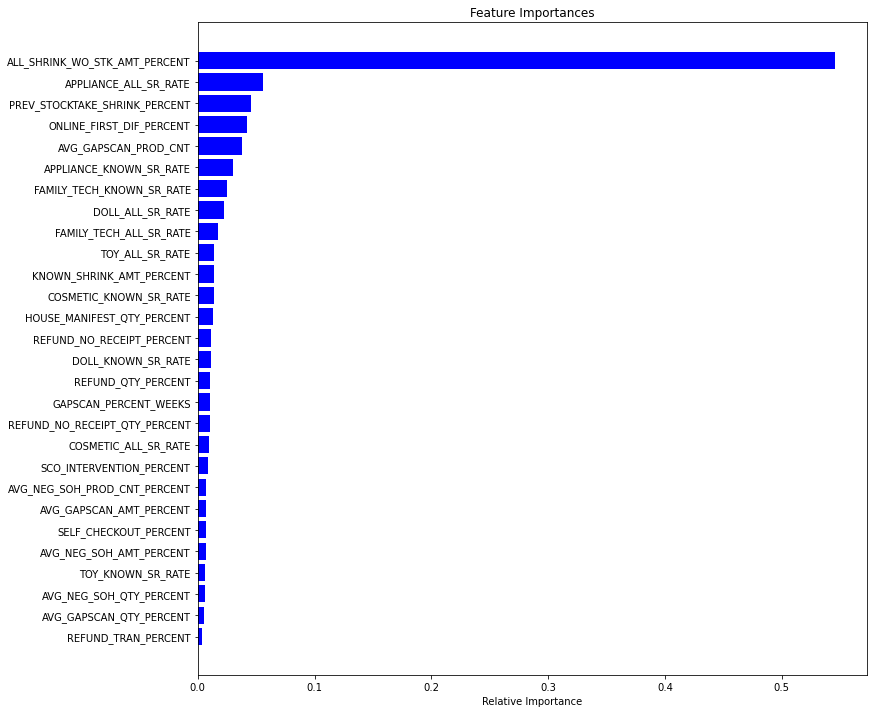

In [532]:
get_ipython().run_line_magic('matplotlib', 'inline')
features = X_train_Metro.columns
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices], color='b',align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize = 10)
plt.xlabel('Relative Importance')

In [403]:
X_test_Metro_raw['actuals'] = Y_test_Metro
X_test_Metro_raw['predictions'] = predictions_Metro
X_test_Metro_raw['error'] = errors_Metro
X_test_Metro_raw['abs_error'] = abs_errors_Metro
X_test_Metro_raw['mape'] = mape_Metro
X_test_Metro_raw.to_csv("check_data_20220606.csv")

<ipython-input-403-e4187707047a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_Metro_raw['actuals'] = Y_test_Metro
<ipython-input-403-e4187707047a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_Metro_raw['predictions'] = predictions_Metro
<ipython-input-403-e4187707047a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

In [18]:
# Creating Target and Regressor Subsets
Y_Metro = data_Metro['Shrink_Amt_Rate']
X_Metro =  data_Metro[[
           'LOCATION_SOURCE_IDENTIFIER',
           'START_DATE', 'END_DATE',
           'AVG_WEEKLY_TRAN',
           #'GAPSCAN_PERCENT_WEEKS',
           'AVG_GAPSCAN_PROD_CNT',
           #'REFUND_TRAN_PERCENT',
           'REFUND_QTY_PERCENT',
           'REFUND_NO_RECEIPT_PERCENT',
           'REFUND_NO_RECEIPT_QTY_PERCENT', 
           #'SELF_CHECKOUT_PERCENT',
           'AVG_GAPSCAN_AMT_PERCENT',
           #'AVG_GAPSCAN_QTY_PERCENT',
           'AVG_HEAD_OFFICE_AMT_PERCENT', 
           #'AVG_HEAD_OFFICE_QTY_PERCENT',
           'HOUSE_MANIFEST_QTY_PERCENT', 
           #'AVG_NEG_SOH_QTY_PERCENT',
           'AVG_NEG_SOH_AMT_PERCENT', 
           #'AVG_NEG_SOH_PROD_CNT_PERCENT',
           'KNOWN_SHRINK_AMT_PERCENT',
           'ALL_SHRINK_WO_STK_AMT_PERCENT',
           'ONLINE_FIRST_DIF_PERCENT',
           'SCO_INTERVENTION_PERCENT',
           #'AVG_SOH_COST_AMT', 
           #'AVG_SALES_AMT',
           'AVG_GAPSCAN_AMT',
           'Previous_Shrink_Amt_Rate',
           'COSMETIC_KNOWN_SR_RATE',
           'APPLIANCE_KNOWN_SR_RATE', 
           'DOLL_KNOWN_SR_RATE', 
           'TOY_KNOWN_SR_RATE',
           'FAMILY_TECH_KNOWN_SR_RATE',
           'COSMETIC_ALL_SR_RATE', 
           'APPLIANCE_ALL_SR_RATE', 
           'DOLL_ALL_SR_RATE',
           'TOY_ALL_SR_RATE',
           'FAMILY_TECH_ALL_SR_RATE'
        ]]
# Split the data into train and test data:
X_train_Metro_raw, X_test_Metro_raw, Y_train_Metro, Y_test_Metro = train_test_split(X_Metro, Y_Metro, test_size = 0.2, random_state=123)
# Build the model with the random forest regression algorithm:
X_train_Metro = X_train_Metro_raw.drop(['LOCATION_SOURCE_IDENTIFIER','START_DATE','END_DATE'], axis=1)
X_test_Metro = X_test_Metro_raw.drop(['LOCATION_SOURCE_IDENTIFIER','START_DATE','END_DATE'], axis=1)
model_Metro = RandomForestRegressor(max_depth=8, random_state=0, n_estimators=10)
model_Metro.fit(X_train_Metro, Y_train_Metro)
# Make predictions on test data using the model trained on original data
predictions_Metro = model_Metro.predict(X_test_Metro)
# Performance metrics
errors_Metro = predictions_Metro - Y_test_Metro
abs_errors_Metro = abs(predictions_Metro - Y_test_Metro)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(abs_errors_Metro), 5), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape_Metro = 100 * (abs_errors_Metro / Y_test_Metro)
# Calculate and display accuracy
accuracy_Metro = 100 - np.mean(mape_Metro)
print('Accuracy Metro:', round(accuracy_Metro, 2), '%.')
print('Mape Metro:', round(np.mean(mape_Metro), 2), '%.')

Metrics for Random Forest Trained on Original Data
Average absolute error: 0.00255 degrees.
Accuracy Metro: 110.93 %.
Mape Metro: -10.93 %.


In [20]:
#Y = test_data_to_predict_Metro['SHRINK_AMT_RATE_CALCULATED']
Y = test_data_to_predict_Metro['Shrink_Amt_Rate']
X =  test_data_to_predict_Metro[[
           #'LOCATION_SOURCE_IDENTIFIER',
           #'START_DATE', 'END_QUARTER_DATE',
           'AVG_WEEKLY_TRAN',
           #'GAPSCAN_PERCENT_WEEKS',
           'AVG_GAPSCAN_PROD_CNT',
           #'REFUND_TRAN_PERCENT',
           'REFUND_QTY_PERCENT',
           'REFUND_NO_RECEIPT_PERCENT',
           'REFUND_NO_RECEIPT_QTY_PERCENT', 
           #'SELF_CHECKOUT_PERCENT',
           'AVG_GAPSCAN_AMT_PERCENT',
           #'AVG_GAPSCAN_QTY_PERCENT',
           'AVG_HEAD_OFFICE_AMT_PERCENT', 
           #'AVG_HEAD_OFFICE_QTY_PERCENT',
           'HOUSE_MANIFEST_QTY_PERCENT', 
           #'AVG_NEG_SOH_QTY_PERCENT',
           'AVG_NEG_SOH_AMT_PERCENT', 
           #'AVG_NEG_SOH_PROD_CNT_PERCENT',
           'KNOWN_SHRINK_AMT_PERCENT',
           'ALL_SHRINK_WO_STK_AMT_PERCENT',
           'ONLINE_FIRST_DIF_PERCENT',
           'SCO_INTERVENTION_PERCENT',
           #'AVG_SOH_COST_AMT', 
           #'AVG_SALES_AMT',
           'AVG_GAPSCAN_AMT',
           'Previous_Shrink_Amt_Rate',
           'COSMETIC_KNOWN_SR_RATE',
           'APPLIANCE_KNOWN_SR_RATE', 
           'DOLL_KNOWN_SR_RATE', 
           'TOY_KNOWN_SR_RATE',
           'FAMILY_TECH_KNOWN_SR_RATE',
           'COSMETIC_ALL_SR_RATE', 
           'APPLIANCE_ALL_SR_RATE', 
           'DOLL_ALL_SR_RATE',
           'TOY_ALL_SR_RATE',
           'FAMILY_TECH_ALL_SR_RATE'
        ]]

predictions = model_Metro.predict(X)
# Performance metrics
#errors = abs(predictions - Y)
errors = predictions - Y
abs_errors = abs(predictions - Y)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(abs_errors), 5), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (abs_errors / Y)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
test_data_to_predict_Metro["Predicted_Shrink"] = predictions

Metrics for Random Forest Trained on Original Data
Average absolute error: 0.00273 degrees.
Accuracy: 111.13 %.


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [31]:
model_Metro.feature_importances_

array([0.00755445, 0.00783198, 0.01397262, 0.0111301 , 0.01370294,
       0.00736976, 0.00660545, 0.00566272, 0.00416689, 0.00596719,
       0.00357258, 0.00380115, 0.0222548 , 0.00894821, 0.01058889,
       0.00888893, 0.00743105, 0.45546524, 0.01949347, 0.00516522,
       0.0088296 , 0.00324673, 0.01649916, 0.1699138 , 0.01116481,
       0.01600933, 0.00766928, 0.00615027, 0.00920178, 0.00915843,
       0.06165878, 0.0136564 , 0.02728433, 0.00998366])

In [32]:
importances = model_Metro.feature_importances_
indices = np.argsort(importances)
print(indices)

[21 10 11  8 19  7  9 27  6  5 16  0 26  1 20 15 13 29 28 33 14  3 24 31
  4  2 25 22 18 12 32 30 23 17]


Text(0.5, 0, 'Relative Importance')

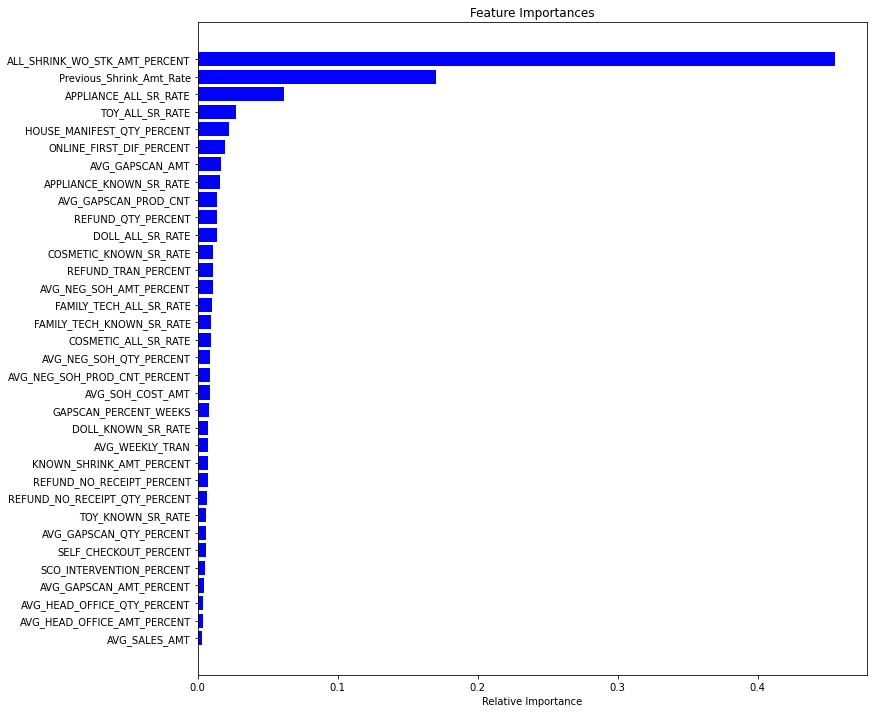

In [33]:
get_ipython().run_line_magic('matplotlib', 'inline')
features = X_train_Metro.columns
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices], color='b',align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize = 10)
plt.xlabel('Relative Importance')

In [70]:
X_test_Metro_raw.head()

,LOCATION_SOURCE_IDENTIFIER,START_DATE,END_DATE,AVG_WEEKLY_TRAN,GAPSCAN_PERCENT_WEEKS,AVG_GAPSCAN_PROD_CNT,REFUND_TRAN_PERCENT,REFUND_QTY_PERCENT,REFUND_NO_RECEIPT_PERCENT,REFUND_NO_RECEIPT_QTY_PERCENT,SELF_CHECKOUT_PERCENT,AVG_GAPSCAN_AMT_PERCENT,AVG_GAPSCAN_QTY_PERCENT,AVG_HEAD_OFFICE_AMT_PERCENT,AVG_HEAD_OFFICE_QTY_PERCENT,HOUSE_MANIFEST_QTY_PERCENT,AVG_NEG_SOH_QTY_PERCENT,AVG_NEG_SOH_AMT_PERCENT,AVG_NEG_SOH_PROD_CNT_PERCENT,KNOWN_SHRINK_AMT_PERCENT,ALL_SHRINK_WO_STK_AMT_PERCENT,SCO_INTERVENTION_PERCENT,AVG_SOH_COST_AMT,AVG_SALES_AMT,AVG_GAPSCAN_AMT,COSMETIC_KNOWN_SR_RATE,APPLIANCE_KNOWN_SR_RATE,DOLL_KNOWN_SR_RATE,TOY_KNOWN_SR_RATE,FAMILY_TECH_KNOWN_SR_RATE,COSMETIC_ALL_SR_RATE,APPLIANCE_ALL_SR_RATE,DOLL_ALL_SR_RATE,TOY_ALL_SR_RATE,FAMILY_TECH_ALL_SR_RATE
977,1125,2021-03-14,2022-02-20,13820.680000,1.000000,177.940000,0.047341,-0.019732,0.193128,0.193786,0.714396,-0.001127,-0.001097,-7.133300e-05,-0.000070,0.003363,-0.022317,-0.024987,0.054798,-0.004969,-0.008777,0.179360,1.842281e+06,434727.5746,-2076.971600,-0.018912,-0.022156,-0.001955,-0.006670,-0.016782,-0.031442,-0.028419,-0.009627,-0.010372,-0.025860
623,1263,2020-05-24,2021-03-07,8667.857143,0.976190,162.439024,0.073004,-0.031095,0.159875,0.139765,0.758933,-0.001465,-0.001371,-1.230000e-05,-0.000008,0.003438,-0.029769,-0.032146,0.073711,-0.006609,-0.011799,0.187017,1.184159e+06,300878.5300,-1735.065952,-0.020871,-0.032133,-0.002324,-0.010180,-0.019194,-0.037184,-0.041322,-0.009718,-0.015725,-0.023528
589,1246,2018-10-14,2019-09-29,18203.196080,0.941176,178.229167,0.060113,-0.027634,0.191607,0.204387,0.664916,-0.001540,-0.001652,0.000000e+00,0.000000,0.002107,-0.042615,-0.042338,0.112563,-0.006091,-0.011527,0.053987,1.725951e+06,490056.0551,-2657.138039,-0.023525,-0.025511,-0.003187,-0.007230,-0.014964,-0.050626,-0.035411,-0.007595,-0.012562,-0.028550
933,1263,2021-08-29,2022-02-20,7115.576923,0.923077,150.625000,0.066587,-0.024943,0.172822,0.153393,0.791147,-0.000810,-0.000711,-7.553717e-06,-0.000004,0.005009,-0.012557,-0.014030,0.023039,-0.004886,-0.008999,0.244937,1.488111e+06,311905.5150,-1205.496154,-0.014793,-0.017635,-0.001279,-0.006067,-0.013529,-0.024298,-0.021152,-0.006961,-0.011920,-0.015046
461,1182,2020-05-24,2021-03-07,18775.571430,0.952381,226.725000,0.051547,-0.019855,0.186081,0.181432,0.674006,-0.002720,-0.001852,-9.120000e-07,-0.000001,0.001499,-0.032083,-0.037670,0.088409,-0.004871,-0.013643,0.128082,1.654240e+06,690980.1833,-4499.349048,-0.011479,-0.021851,-0.003343,-0.007178,-0.014432,-0.046791,-0.032558,-0.037114,-0.025774,-0.027220


In [73]:
import os
os.getcwd()

'C:\\Users\\vdodwani\\OneDrive - Kmart Australia Limited\\Downloads\\Projects\\Shrinkage\\codes'

In [71]:
X_test_Metro_raw['actuals'] = Y_test_Metro
X_test_Metro_raw['predictions'] = predictions_Metro
X_test_Metro_raw['error'] = errors_Metro
X_test_Metro_raw['abs_error'] = abs_errors_Metro
X_test_Metro_raw['mape'] = mape_Metro
X_test_Metro_raw.to_csv("check_data_20220606.csv")

<ipython-input-71-e4187707047a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_Metro_raw['actuals'] = Y_test_Metro
<ipython-input-71-e4187707047a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_Metro_raw['predictions'] = predictions_Metro
<ipython-input-71-e4187707047a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [224]:
import os
os.getcwd()

'C:\\Users\\vdodwani\\OneDrive - Kmart Australia Limited\\Downloads\\Projects\\Shrinkage\\codes'

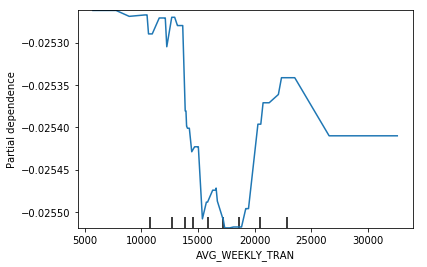

In [41]:
cols_to_use = ['AVG_WEEKLY_TRAN',
           #'GAPSCAN_PERCENT_WEEKS',
           'AVG_GAPSCAN_PROD_CNT',
           'REFUND_QTY_PERCENT',
           'REFUND_NO_RECEIPT_PERCENT',
           'REFUND_NO_RECEIPT_QTY_PERCENT', 
           #'SELF_CHECKOUT_PERCENT',
           'AVG_GAPSCAN_AMT_PERCENT',
           #'AVG_GAPSCAN_QTY_PERCENT',
           'AVG_HEAD_OFFICE_AMT_PERCENT', 
           #'AVG_HEAD_OFFICE_QTY_PERCENT',
           'HOUSE_MANIFEST_QTY_PERCENT', 
           #'AVG_NEG_SOH_QTY_PERCENT',
           'AVG_NEG_SOH_AMT_PERCENT', 
           #'AVG_NEG_SOH_PROD_CNT_PERCENT',
           'KNOWN_SHRINK_AMT_PERCENT',
           'ALL_SHRINK_WO_STK_AMT_PERCENT',
           'ONLINE_FIRST_DIF_PERCENT',
           'SCO_INTERVENTION_PERCENT',
           #'AVG_SOH_COST_AMT', 
           #'AVG_SALES_AMT',
           'AVG_GAPSCAN_AMT',
           'Previous_Shrink_Amt_Rate',
           'COSMETIC_KNOWN_SR_RATE',
           'APPLIANCE_KNOWN_SR_RATE', 
           'DOLL_KNOWN_SR_RATE', 
           'TOY_KNOWN_SR_RATE',
           'FAMILY_TECH_KNOWN_SR_RATE',
           'COSMETIC_ALL_SR_RATE', 
           'APPLIANCE_ALL_SR_RATE', 
           'DOLL_ALL_SR_RATE',
           'TOY_ALL_SR_RATE',
           'FAMILY_TECH_ALL_SR_RATE']
my_plots_0 = plot_partial_dependence(model_Metro, 
                                   features=[0], 
                                   X=X_test_Metro, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=100)

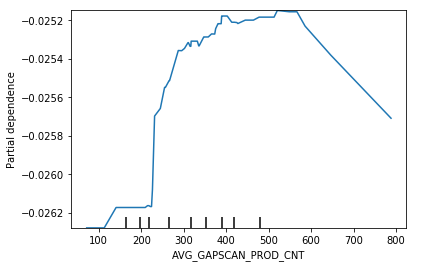

In [42]:
my_plots_1 = plot_partial_dependence(model_Metro, 
                                   features=[1], 
                                   X=X_test_Metro, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=100)

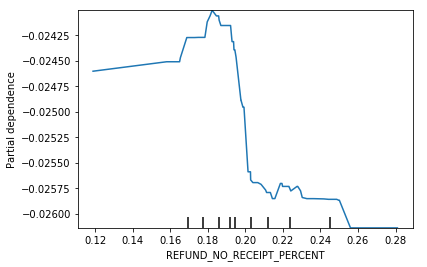

In [31]:
my_plots_2 = plot_partial_dependence(model_Metro, 
                                   features=[2], 
                                   X=X_test_Metro, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=100)

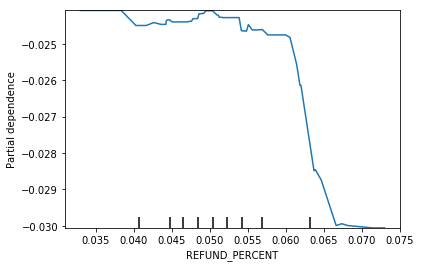

In [32]:
my_plots_3 = plot_partial_dependence(model_Metro, 
                                   features=[3], 
                                   X=X_test_Metro, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=100)

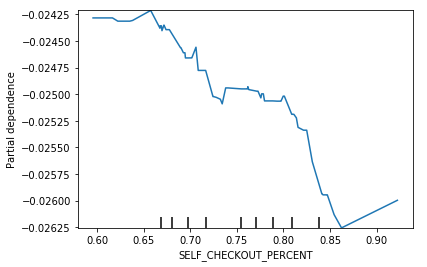

In [33]:
my_plots_4 = plot_partial_dependence(model_Metro, 
                                   features=[4], 
                                   X=X_test_Metro, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=100)

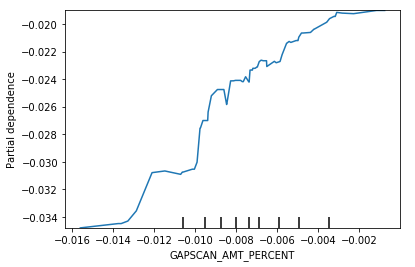

In [34]:
my_plots_5 = plot_partial_dependence(model_Metro, 
                                   features=[5], 
                                   X=X_test_Metro, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=100)

In [221]:
my_plots_6 = plot_partial_dependence(model_Metro, 
                                   features=[6], 
                                   X=X_test_Metro, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=100)

ValueError: All entries of features must be less than len(feature_names) = 6, got 6.

# Non Metro Model

#### New 2023 Stocktake Non Metro Model

In [251]:
#### New 2023 Stocktake Non Metro Model WITH LAST SHRINK RATE
# Creating Target and Regressor Subsets
Y_Non_Metro = data_NonMetro['Shrink_Amt_Rate']
# Predictor Variable
X_Non_Metro =  data_NonMetro[[
           'LOCATION_SOURCE_IDENTIFIER',
           'START_DATE', 'END_DATE',
           'AVG_WEEKLY_TRAN',
           'GAPSCAN_PERCENT_WEEKS',
           'AVG_GAPSCAN_PROD_CNT',
           'REFUND_TRAN_PERCENT',
           #'REFUND_QTY_PERCENT',
           #'REFUND_NO_RECEIPT_PERCENT',
           #'REFUND_NO_RECEIPT_QTY_PERCENT', 
           'SELF_CHECKOUT_PERCENT',
           'AVG_GAPSCAN_AMT_PERCENT',
           #'AVG_GAPSCAN_QTY_PERCENT',
           #'AVG_HEAD_OFFICE_AMT_PERCENT', 
           'AVG_HEAD_OFFICE_QTY_PERCENT',
           #'HOUSE_MANIFEST_QTY_PERCENT', 
           #'AVG_NEG_SOH_QTY_PERCENT',
           'AVG_NEG_SOH_AMT_PERCENT', 
           'AVG_NEG_SOH_PROD_CNT_PERCENT',
           #'KNOWN_SHRINK_AMT_PERCENT',
           'ALL_SHRINK_WO_STK_AMT_PERCENT',
           'ONLINE_FIRST_DIF_PERCENT',
           #'SCO_INTERVENTION_PERCENT',
           #'AVG_SOH_COST_AMT', 
           #'AVG_SALES_AMT',
           'AVG_GAPSCAN_AMT',
           'Previous_Shrink_Amt_Rate',
           'PREV_STOCKTAKE_SHRINK_PERCENT',
           'COSMETIC_KNOWN_SR_RATE',
           #'APPLIANCE_KNOWN_SR_RATE', 
           'DOLL_KNOWN_SR_RATE', 
           'TOY_KNOWN_SR_RATE',
           'FAMILY_TECH_KNOWN_SR_RATE',
           'COSMETIC_ALL_SR_RATE', 
           'APPLIANCE_ALL_SR_RATE', 
           'DOLL_ALL_SR_RATE',
           #'TOY_ALL_SR_RATE',
           'FAMILY_TECH_ALL_SR_RATE'
]]

# Split the data into train and test data:
X_train_Non_Metro_raw, X_test_Non_Metro_raw, Y_train_Non_Metro, Y_test_Non_Metro = train_test_split(X_Non_Metro, Y_Non_Metro, test_size = 0.2, random_state=123)
# Build the model with the random forest regression algorithm:
X_train_Non_Metro = X_train_Non_Metro_raw.drop(['LOCATION_SOURCE_IDENTIFIER','START_DATE','END_DATE'], axis=1)
X_test_Non_Metro = X_test_Non_Metro_raw.drop(['LOCATION_SOURCE_IDENTIFIER','START_DATE','END_DATE'], axis=1)
model_Non_Metro = RandomForestRegressor(max_depth=40, random_state=0, n_estimators=40, max_leaf_nodes=40)
model_Non_Metro.fit(X_train_Non_Metro, Y_train_Non_Metro)

# Make predictions on test data using the model trained on original data
predictions_Non_Metro = model_Non_Metro.predict(X_test_Non_Metro)
# Performance metrics
errors_Non_Metro = predictions_Non_Metro - Y_test_Non_Metro
abs_errors_Non_Metro = abs(predictions_Non_Metro - Y_test_Non_Metro)
abs_Y_test_Non_Metro = abs(Y_test_Non_Metro)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(abs_errors_Non_Metro), 5), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape_Non_Metro = 100 * (abs_errors_Non_Metro / abs_Y_test_Non_Metro)
# Calculate and display accuracy
accuracy_Non_Metro = 100 - np.mean(mape_Non_Metro)
print('Accuracy Non Metro:', round(accuracy_Non_Metro, 2), '%.')
print('Mape Non Metro:', round(np.mean(mape_Non_Metro), 2), '%.')
print('Mape Non Metro Max:', round(np.max(mape_Non_Metro), 2), '%.')
print('Abs Error Non Metro Max:', round(np.max(abs_errors_Non_Metro)*100, 2), '%.')

Metrics for Random Forest Trained on Original Data
Average absolute error: 0.00228 degrees.
Accuracy Non Metro: 84.54 %.
Mape Non Metro: 15.46 %.
Mape Non Metro Max: 58.94 %.
Abs Error Non Metro Max: 0.88 %.


In [227]:
#### New 2023 Stocktake Non Metro Model WITHOUT LAST SHRINK RATE
# Creating Target and Regressor Subsets
Y_Non_Metro = data_NonMetro['Shrink_Amt_Rate']
# Predictor Variable
X_Non_Metro =  data_NonMetro[[
           'LOCATION_SOURCE_IDENTIFIER',
           'START_DATE', 'END_DATE',
           'AVG_WEEKLY_TRAN',
           'GAPSCAN_PERCENT_WEEKS',
           'AVG_GAPSCAN_PROD_CNT',
           'REFUND_TRAN_PERCENT',
           #'REFUND_QTY_PERCENT',
           #'REFUND_NO_RECEIPT_PERCENT',
           'REFUND_NO_RECEIPT_QTY_PERCENT', 
           'SELF_CHECKOUT_PERCENT',
           'AVG_GAPSCAN_AMT_PERCENT',
           #'AVG_GAPSCAN_QTY_PERCENT',
           'AVG_HEAD_OFFICE_AMT_PERCENT', 
           'AVG_HEAD_OFFICE_QTY_PERCENT',
           #'HOUSE_MANIFEST_QTY_PERCENT', 
           #'AVG_NEG_SOH_QTY_PERCENT',
           'AVG_NEG_SOH_AMT_PERCENT', 
           'AVG_NEG_SOH_PROD_CNT_PERCENT',
           #'KNOWN_SHRINK_AMT_PERCENT',
           'ALL_SHRINK_WO_STK_AMT_PERCENT',
           'ONLINE_FIRST_DIF_PERCENT',
           #'SCO_INTERVENTION_PERCENT',
           'AVG_SOH_COST_AMT', 
           'AVG_SALES_AMT',
           'AVG_GAPSCAN_AMT',
           #'Previous_Shrink_Amt_Rate',
           'PREV_STOCKTAKE_SHRINK_PERCENT',
           'COSMETIC_KNOWN_SR_RATE',
           #'APPLIANCE_KNOWN_SR_RATE', 
           'DOLL_KNOWN_SR_RATE', 
           'TOY_KNOWN_SR_RATE',
           'FAMILY_TECH_KNOWN_SR_RATE',
           'COSMETIC_ALL_SR_RATE', 
           'APPLIANCE_ALL_SR_RATE', 
           'DOLL_ALL_SR_RATE',
           'TOY_ALL_SR_RATE',
           'FAMILY_TECH_ALL_SR_RATE'
]]

# Split the data into train and test data:
X_train_Non_Metro_raw, X_test_Non_Metro_raw, Y_train_Non_Metro, Y_test_Non_Metro = train_test_split(X_Non_Metro, Y_Non_Metro, test_size = 0.2, random_state=123)
# Build the model with the random forest regression algorithm:
X_train_Non_Metro = X_train_Non_Metro_raw.drop(['LOCATION_SOURCE_IDENTIFIER','START_DATE','END_DATE'], axis=1)
X_test_Non_Metro = X_test_Non_Metro_raw.drop(['LOCATION_SOURCE_IDENTIFIER','START_DATE','END_DATE'], axis=1)
model_Non_Metro = RandomForestRegressor(max_depth=40, random_state=0, n_estimators=40, max_leaf_nodes=40)
model_Non_Metro.fit(X_train_Non_Metro, Y_train_Non_Metro)

# Make predictions on test data using the model trained on original data
predictions_Non_Metro = model_Non_Metro.predict(X_test_Non_Metro)
# Performance metrics
errors_Non_Metro = predictions_Non_Metro - Y_test_Non_Metro
abs_errors_Non_Metro = abs(predictions_Non_Metro - Y_test_Non_Metro)
abs_Y_test_Non_Metro = abs(Y_test_Non_Metro)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(abs_errors_Non_Metro), 5), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape_Non_Metro = 100 * (abs_errors_Non_Metro / abs_Y_test_Non_Metro)
# Calculate and display accuracy
accuracy_Non_Metro = 100 - np.mean(mape_Non_Metro)
print('Accuracy Non Metro:', round(accuracy_Non_Metro, 2), '%.')
print('Mape Non Metro:', round(np.mean(mape_Non_Metro), 2), '%.')
print('Mape Non Metro Max:', round(np.max(mape_Non_Metro), 2), '%.')
print('Abs Error Non Metro Max:', round(np.max(abs_errors_Non_Metro)*100, 2), '%.')

Metrics for Random Forest Trained on Original Data
Average absolute error: 0.00246 degrees.
Accuracy Non Metro: 82.43 %.
Mape Non Metro: 17.57 %.
Mape Non Metro Max: 79.87 %.
Abs Error Non Metro Max: 0.8 %.


In [252]:
predictions_train_Non_Metro = model_Non_Metro.predict(X_train_Non_Metro)
# Performance metrics
errors_train_Non_Metro = predictions_train_Non_Metro - Y_train_Non_Metro
abs_errors_train_Non_Metro = abs(predictions_train_Non_Metro - Y_train_Non_Metro)
abs_Y_train_Non_Metro = abs(Y_train_Non_Metro)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(abs_errors_train_Non_Metro), 5), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape_train_Non_Metro = 100 * (abs_errors_train_Non_Metro / abs_Y_train_Non_Metro)
# Calculate and display accuracy
accuracy_train_Non_Metro = 100 - np.mean(mape_train_Non_Metro)
print('Accuracy Non Metro:', round(accuracy_train_Non_Metro, 2), '%.')
print('Mape Non Metro:', round(np.mean(mape_train_Non_Metro), 2), '%.')
print('Mape Non Metro Max:', round(np.max(mape_train_Non_Metro), 2), '%.')
print('Abs Error Non Metro Max:', round(np.max(abs_errors_train_Non_Metro)*100, 2), '%.')

Metrics for Random Forest Trained on Original Data
Average absolute error: 0.00158 degrees.
Accuracy Non Metro: 86.12 %.
Mape Non Metro: 13.88 %.
Mape Non Metro Max: 413.16 %.
Abs Error Non Metro Max: 0.96 %.


In [253]:
model_Non_Metro.feature_importances_

array([0.02375994, 0.04771534, 0.01381234, 0.01458366, 0.02262637,
       0.01045218, 0.01180574, 0.02734316, 0.01904248, 0.19470547,
       0.11001147, 0.03871703, 0.24227891, 0.01089521, 0.04138909,
       0.0175297 , 0.02275268, 0.02635629, 0.02669457, 0.0310009 ,
       0.01718195, 0.02934551])

In [254]:
importances = model_Non_Metro.feature_importances_
indices = np.argsort(importances)
print(indices)

[ 5 13  6  2  3 20 15  8  4 16  0 17 18  7 21 19 11 14  1 10  9 12]


Text(0.5, 0, 'Relative Importance')

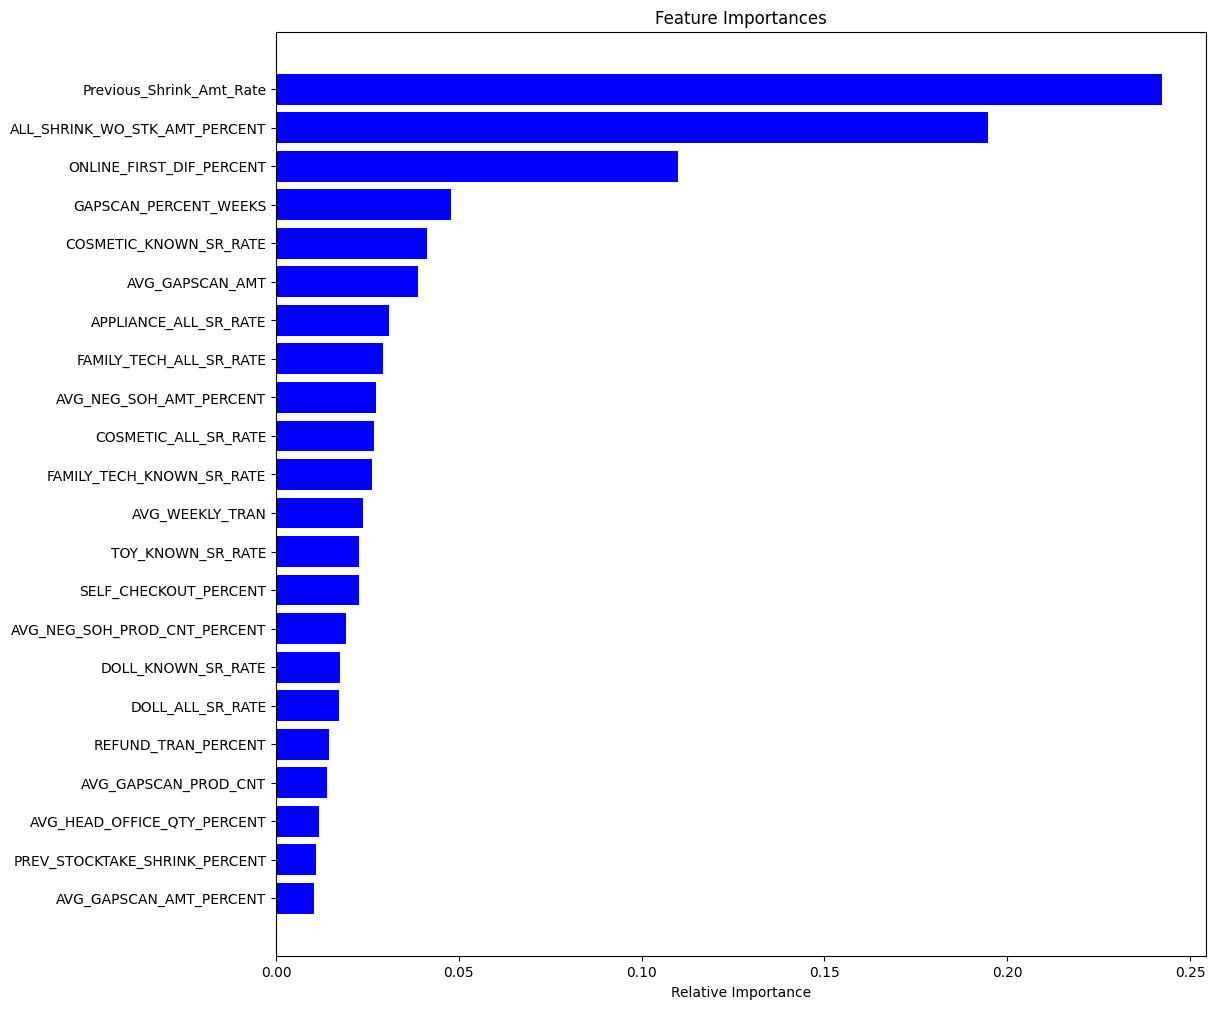

In [255]:
get_ipython().run_line_magic('matplotlib', 'inline')
features = X_train_Non_Metro.columns
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices], color='b',align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize = 10)
plt.xlabel('Relative Importance')

#### Final Non Metro Model

In [40]:
#### Final Non Metro Model
# Creating Target and Regressor Subsets
Y_Non_Metro = data_NonMetro['Shrink_Amt_Rate']
# Predictor Variable
X_Non_Metro =  data_NonMetro[[
           'LOCATION_SOURCE_IDENTIFIER',
           'START_DATE', 'END_DATE',
           'AVG_WEEKLY_TRAN',
           'GAPSCAN_PERCENT_WEEKS',
           'AVG_GAPSCAN_PROD_CNT',
           #'REFUND_TRAN_PERCENT',
           'REFUND_QTY_PERCENT',
           #'REFUND_NO_RECEIPT_PERCENT',
           #'REFUND_NO_RECEIPT_QTY_PERCENT', 
           #'SELF_CHECKOUT_PERCENT',
           'AVG_GAPSCAN_AMT_PERCENT',
           'AVG_GAPSCAN_QTY_PERCENT',
           'AVG_HEAD_OFFICE_AMT_PERCENT', 
           'AVG_HEAD_OFFICE_QTY_PERCENT',
           'HOUSE_MANIFEST_QTY_PERCENT', 
           #'AVG_NEG_SOH_QTY_PERCENT',
           'AVG_NEG_SOH_AMT_PERCENT', 
           'AVG_NEG_SOH_PROD_CNT_PERCENT',
           'KNOWN_SHRINK_AMT_PERCENT',
           'ALL_SHRINK_WO_STK_AMT_PERCENT',
           'ONLINE_FIRST_DIF_PERCENT',
           'SCO_INTERVENTION_PERCENT',
           #'AVG_SOH_COST_AMT', 
           #'AVG_SALES_AMT',
           'AVG_GAPSCAN_AMT',
           'Previous_Shrink_Amt_Rate',
           'PREV_STOCKTAKE_SHRINK_PERCENT',
           'COSMETIC_KNOWN_SR_RATE',
           #'APPLIANCE_KNOWN_SR_RATE', 
           'DOLL_KNOWN_SR_RATE', 
           'TOY_KNOWN_SR_RATE',
           #'FAMILY_TECH_KNOWN_SR_RATE',
           'COSMETIC_ALL_SR_RATE', 
           'APPLIANCE_ALL_SR_RATE', 
           'DOLL_ALL_SR_RATE',
           'TOY_ALL_SR_RATE',
           'FAMILY_TECH_ALL_SR_RATE'
]]

# Split the data into train and test data:
X_train_Non_Metro_raw, X_test_Non_Metro_raw, Y_train_Non_Metro, Y_test_Non_Metro = train_test_split(X_Non_Metro, Y_Non_Metro, test_size = 0.2, random_state=123)
# Build the model with the random forest regression algorithm:
X_train_Non_Metro = X_train_Non_Metro_raw.drop(['LOCATION_SOURCE_IDENTIFIER','START_DATE','END_DATE'], axis=1)
X_test_Non_Metro = X_test_Non_Metro_raw.drop(['LOCATION_SOURCE_IDENTIFIER','START_DATE','END_DATE'], axis=1)
model_Non_Metro = RandomForestRegressor(max_depth=40, random_state=0, n_estimators=40, max_leaf_nodes=40)
model_Non_Metro.fit(X_train_Non_Metro, Y_train_Non_Metro)

# Make predictions on test data using the model trained on original data
predictions_Non_Metro = model_Non_Metro.predict(X_test_Non_Metro)
# Performance metrics
errors_Non_Metro = predictions_Non_Metro - Y_test_Non_Metro
abs_errors_Non_Metro = abs(predictions_Non_Metro - Y_test_Non_Metro)
abs_Y_test_Non_Metro = abs(Y_test_Non_Metro)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(abs_errors_Non_Metro), 5), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape_Non_Metro = 100 * (abs_errors_Non_Metro / abs_Y_test_Non_Metro)
# Calculate and display accuracy
accuracy_Non_Metro = 100 - np.mean(mape_Non_Metro)
print('Accuracy Non Metro:', round(accuracy_Non_Metro, 2), '%.')
print('Mape Non Metro:', round(np.mean(mape_Non_Metro), 2), '%.')
print('Mape Non Metro Max:', round(np.max(mape_Non_Metro), 2), '%.')
print('Abs Error Non Metro Max:', round(np.max(abs_errors_Non_Metro)*100, 2), '%.')

Metrics for Random Forest Trained on Original Data
Average absolute error: 0.00393 degrees.
Accuracy Non Metro: 51.83 %.
Mape Non Metro: 48.17 %.
Mape Non Metro Max: 713.38 %.
Abs Error Non Metro Max: 1.91 %.


In [41]:
predictions_train_Non_Metro = model_Non_Metro.predict(X_train_Non_Metro)
# Performance metrics
errors_train_Non_Metro = predictions_train_Non_Metro - Y_train_Non_Metro
abs_errors_train_Non_Metro = abs(predictions_train_Non_Metro - Y_train_Non_Metro)
abs_Y_train_Non_Metro = abs(Y_train_Non_Metro)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(abs_errors_train_Non_Metro), 5), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape_train_Non_Metro = 100 * (abs_errors_train_Non_Metro / abs_Y_train_Non_Metro)
# Calculate and display accuracy
accuracy_train_Non_Metro = 100 - np.mean(mape_train_Non_Metro)
print('Accuracy Non Metro:', round(accuracy_train_Non_Metro, 2), '%.')
print('Mape Non Metro:', round(np.mean(mape_train_Non_Metro), 2), '%.')
print('Mape Non Metro Max:', round(np.max(mape_train_Non_Metro), 2), '%.')
print('Abs Error Non Metro Max:', round(np.max(abs_errors_train_Non_Metro)*100, 2), '%.')

Metrics for Random Forest Trained on Original Data
Average absolute error: 0.00141 degrees.
Accuracy Non Metro: 87.16 %.
Mape Non Metro: 12.84 %.
Mape Non Metro Max: 433.82 %.
Abs Error Non Metro Max: 1.06 %.


In [42]:
model_Non_Metro.feature_importances_

array([0.01941062, 0.03096911, 0.02556506, 0.02387221, 0.01099263,
       0.00916046, 0.00617379, 0.00970842, 0.01194775, 0.01312807,
       0.00817547, 0.00865091, 0.13218764, 0.11447651, 0.00733702,
       0.05580736, 0.3364324 , 0.011242  , 0.01243242, 0.0283151 ,
       0.01123302, 0.03835887, 0.01564413, 0.01651128, 0.01768109,
       0.02458669])

In [43]:
importances = model_Non_Metro.feature_importances_
indices = np.argsort(importances)
print(indices)

[ 6 14 10 11  5  7  4 20 17  8 18  9 22 23 24  0  3 25  2 19  1 21 15 13
 12 16]


Text(0.5, 0, 'Relative Importance')

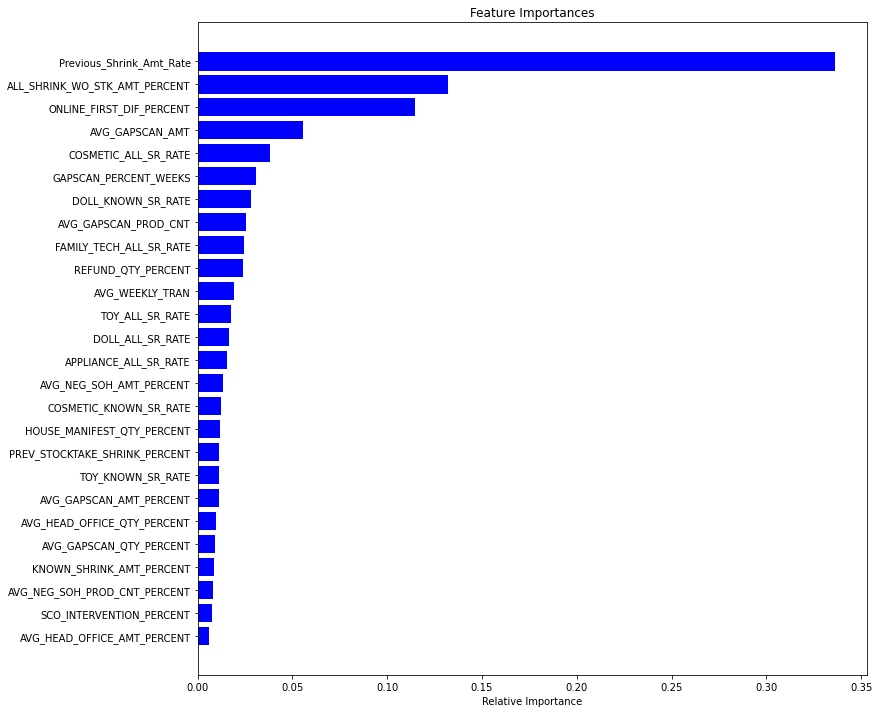

In [44]:
get_ipython().run_line_magic('matplotlib', 'inline')
features = X_train_Non_Metro.columns
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices], color='b',align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize = 10)
plt.xlabel('Relative Importance')

#### Non Metro Model with Prev Shrink Rate and Online first diff Percent

In [16]:
#### Final Non Metro Model
# Creating Target and Regressor Subsets
Y_Non_Metro = data_NonMetro['Shrink_Amt_Rate']
# Predictor Variable
X_Non_Metro =  data_NonMetro[[
           'LOCATION_SOURCE_IDENTIFIER',
           'START_DATE', 'END_DATE',
           #'AVG_WEEKLY_TRAN',
           'GAPSCAN_PERCENT_WEEKS',
           'AVG_GAPSCAN_PROD_CNT',
           'REFUND_TRAN_PERCENT',
           'REFUND_QTY_PERCENT',
           'REFUND_NO_RECEIPT_PERCENT',
           'REFUND_NO_RECEIPT_QTY_PERCENT', 
           'SELF_CHECKOUT_PERCENT',
           'AVG_GAPSCAN_AMT_PERCENT',
           'AVG_GAPSCAN_QTY_PERCENT',
           #'AVG_HEAD_OFFICE_AMT_PERCENT', 
           #'AVG_HEAD_OFFICE_QTY_PERCENT',
           'HOUSE_MANIFEST_QTY_PERCENT', 
           'AVG_NEG_SOH_QTY_PERCENT',
           'AVG_NEG_SOH_AMT_PERCENT', 
           'AVG_NEG_SOH_PROD_CNT_PERCENT',
           'KNOWN_SHRINK_AMT_PERCENT',
           'ALL_SHRINK_WO_STK_AMT_PERCENT',
           'ONLINE_FIRST_DIF_PERCENT',
           'SCO_INTERVENTION_PERCENT',
           #'AVG_SOH_COST_AMT', 
           #'AVG_SALES_AMT',
           #'AVG_GAPSCAN_AMT',
           'Previous_Shrink_Amt_Rate',
           #'PREV_STOCKTAKE_SHRINK_PERCENT',
           'COSMETIC_KNOWN_SR_RATE',
           'APPLIANCE_KNOWN_SR_RATE', 
           'DOLL_KNOWN_SR_RATE', 
           'TOY_KNOWN_SR_RATE',
           'FAMILY_TECH_KNOWN_SR_RATE',
           'COSMETIC_ALL_SR_RATE', 
           'APPLIANCE_ALL_SR_RATE', 
           'DOLL_ALL_SR_RATE',
           'TOY_ALL_SR_RATE',
           'FAMILY_TECH_ALL_SR_RATE'
]]

# Split the data into train and test data:
X_train_Non_Metro_raw, X_test_Non_Metro_raw, Y_train_Non_Metro, Y_test_Non_Metro = train_test_split(X_Non_Metro, Y_Non_Metro, test_size = 0.2, random_state=123)
# Build the model with the random forest regression algorithm:
X_train_Non_Metro = X_train_Non_Metro_raw.drop(['LOCATION_SOURCE_IDENTIFIER','START_DATE','END_DATE'], axis=1)
X_test_Non_Metro = X_test_Non_Metro_raw.drop(['LOCATION_SOURCE_IDENTIFIER','START_DATE','END_DATE'], axis=1)
model_Non_Metro = RandomForestRegressor(max_depth=40, random_state=0, n_estimators=40, max_leaf_nodes=40)
model_Non_Metro.fit(X_train_Non_Metro, Y_train_Non_Metro)

# Make predictions on test data using the model trained on original data
predictions_Non_Metro = model_Non_Metro.predict(X_test_Non_Metro)
# Performance metrics
errors_Non_Metro = predictions_Non_Metro - Y_test_Non_Metro
abs_errors_Non_Metro = abs(predictions_Non_Metro - Y_test_Non_Metro)
abs_Y_test_Non_Metro = abs(Y_test_Non_Metro)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(abs_errors_Non_Metro), 5), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape_Non_Metro = 100 * (abs_errors_Non_Metro / abs_Y_test_Non_Metro)
# Calculate and display accuracy
accuracy_Non_Metro = 100 - np.mean(mape_Non_Metro)
print('Accuracy Non Metro:', round(accuracy_Non_Metro, 2), '%.')
print('Mape Non Metro:', round(np.mean(mape_Non_Metro), 2), '%.')
print('Mape Non Metro Max:', round(np.max(mape_Non_Metro), 2), '%.')
print('Abs Error Non Metro Max:', round(np.max(abs_errors_Non_Metro)*100, 2), '%.')

Metrics for Random Forest Trained on Original Data
Average absolute error: 0.00235 degrees.
Accuracy Non Metro: 84.48 %.
Mape Non Metro: 15.52 %.
Mape Non Metro Max: 96.49 %.
Abs Error Non Metro Max: 1.25 %.


In [17]:
predictions_train_Non_Metro = model_Non_Metro.predict(X_train_Non_Metro)
# Performance metrics
errors_train_Non_Metro = predictions_train_Non_Metro - Y_train_Non_Metro
abs_errors_train_Non_Metro = abs(predictions_train_Non_Metro - Y_train_Non_Metro)
abs_Y_train_Non_Metro = abs(Y_train_Non_Metro)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(abs_errors_train_Non_Metro), 5), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape_train_Non_Metro = 100 * (abs_errors_train_Non_Metro / abs_Y_train_Non_Metro)
# Calculate and display accuracy
accuracy_train_Non_Metro = 100 - np.mean(mape_train_Non_Metro)
print('Accuracy Non Metro:', round(accuracy_train_Non_Metro, 2), '%.')
print('Mape Non Metro:', round(np.mean(mape_train_Non_Metro), 2), '%.')
print('Mape Non Metro Max:', round(np.max(mape_train_Non_Metro), 2), '%.')
print('Abs Error Non Metro Max:', round(np.max(abs_errors_train_Non_Metro)*100, 2), '%.')

Metrics for Random Forest Trained on Original Data
Average absolute error: 0.00119 degrees.
Accuracy Non Metro: 91.98 %.
Mape Non Metro: 8.02 %.
Mape Non Metro Max: 35.46 %.
Abs Error Non Metro Max: 0.6 %.


In [18]:
model_Non_Metro.feature_importances_

array([0.00852796, 0.0111472 , 0.0127973 , 0.01885502, 0.01502261,
       0.01690728, 0.01076089, 0.04284816, 0.02269893, 0.01270421,
       0.01166257, 0.01620977, 0.00656234, 0.00562762, 0.1414309 ,
       0.06438446, 0.01599795, 0.33745667, 0.01024514, 0.00862254,
       0.01285533, 0.01209278, 0.00818644, 0.03806497, 0.02458659,
       0.04857055, 0.00966292, 0.05551089])

In [19]:
importances = model_Non_Metro.feature_importances_
indices = np.argsort(importances)
print(indices)

[13 12 22  0 19 26 18  6  1 10 21  9  2 20  4 16 11  5  3  8 24 23  7 25
 27 15 14 17]


Text(0.5, 0, 'Relative Importance')

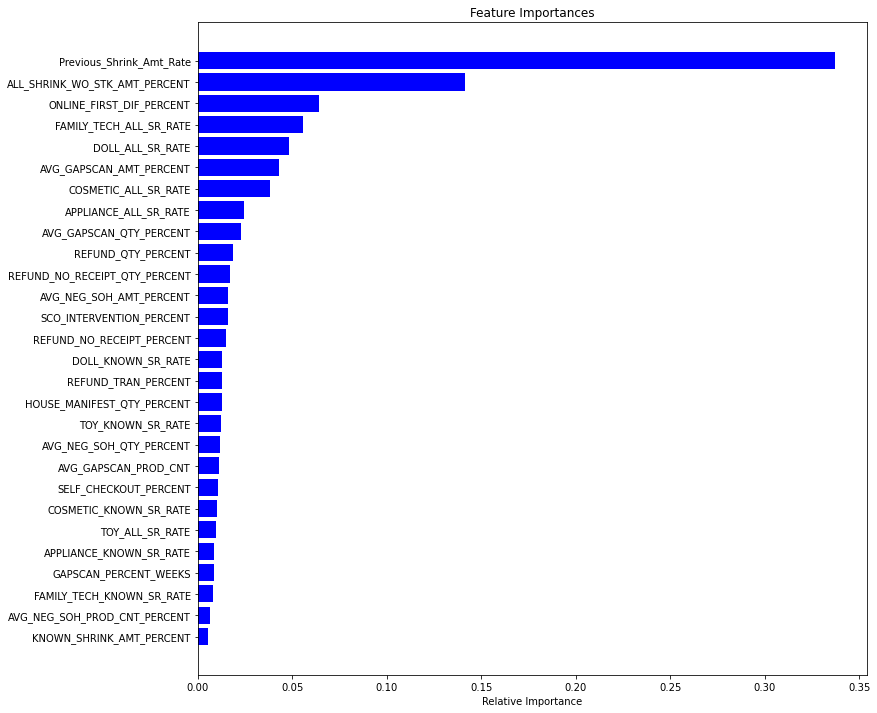

In [20]:
get_ipython().run_line_magic('matplotlib', 'inline')
features = X_train_Non_Metro.columns
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices], color='b',align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize = 10)
plt.xlabel('Relative Importance')

#### Non Metro Model without Prev Shrink Rate and Online first diff Percent

In [173]:
#### Final Non Metro Model
# Creating Target and Regressor Subsets
Y_Non_Metro = data_NonMetro['Shrink_Amt_Rate']
# Predictor Variable
X_Non_Metro =  data_NonMetro[[
           'LOCATION_SOURCE_IDENTIFIER',
           'START_DATE', 'END_DATE',
           #'AVG_WEEKLY_TRAN',
           'GAPSCAN_PERCENT_WEEKS',
           'AVG_GAPSCAN_PROD_CNT',
           'REFUND_TRAN_PERCENT',
           'REFUND_QTY_PERCENT',
           'REFUND_NO_RECEIPT_PERCENT',
           'REFUND_NO_RECEIPT_QTY_PERCENT', 
           'SELF_CHECKOUT_PERCENT',
           'AVG_GAPSCAN_AMT_PERCENT',
           'AVG_GAPSCAN_QTY_PERCENT',
           #'AVG_HEAD_OFFICE_AMT_PERCENT', 
           #'AVG_HEAD_OFFICE_QTY_PERCENT',
           'HOUSE_MANIFEST_QTY_PERCENT', 
           'AVG_NEG_SOH_QTY_PERCENT',
           'AVG_NEG_SOH_AMT_PERCENT', 
           'AVG_NEG_SOH_PROD_CNT_PERCENT',
           'KNOWN_SHRINK_AMT_PERCENT',
           'ALL_SHRINK_WO_STK_AMT_PERCENT',
           'ONLINE_FIRST_DIF_PERCENT',
           'SCO_INTERVENTION_PERCENT',
           #'AVG_SOH_COST_AMT', 
           #'AVG_SALES_AMT',
           #'AVG_GAPSCAN_AMT',
           #'Previous_Shrink_Amt_Rate',
           'PREV_STOCKTAKE_SHRINK_PERCENT',
           'COSMETIC_KNOWN_SR_RATE',
           'APPLIANCE_KNOWN_SR_RATE', 
           'DOLL_KNOWN_SR_RATE', 
           'TOY_KNOWN_SR_RATE',
           'FAMILY_TECH_KNOWN_SR_RATE',
           'COSMETIC_ALL_SR_RATE', 
           'APPLIANCE_ALL_SR_RATE', 
           'DOLL_ALL_SR_RATE',
           'TOY_ALL_SR_RATE',
           'FAMILY_TECH_ALL_SR_RATE'
]]

# Split the data into train and test data:
X_train_Non_Metro_raw, X_test_Non_Metro_raw, Y_train_Non_Metro, Y_test_Non_Metro = train_test_split(X_Non_Metro, Y_Non_Metro, test_size = 0.2, random_state=123)
# Build the model with the random forest regression algorithm:
X_train_Non_Metro = X_train_Non_Metro_raw.drop(['LOCATION_SOURCE_IDENTIFIER','START_DATE','END_DATE'], axis=1)
X_test_Non_Metro = X_test_Non_Metro_raw.drop(['LOCATION_SOURCE_IDENTIFIER','START_DATE','END_DATE'], axis=1)
model_Non_Metro = RandomForestRegressor(max_depth=40, random_state=0, n_estimators=40, max_leaf_nodes=40)
model_Non_Metro.fit(X_train_Non_Metro, Y_train_Non_Metro)

# Make predictions on test data using the model trained on original data
predictions_Non_Metro = model_Non_Metro.predict(X_test_Non_Metro)
# Performance metrics
errors_Non_Metro = predictions_Non_Metro - Y_test_Non_Metro
abs_errors_Non_Metro = abs(predictions_Non_Metro - Y_test_Non_Metro)
abs_Y_test_Non_Metro = abs(Y_test_Non_Metro)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(abs_errors_Non_Metro), 5), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape_Non_Metro = 100 * (abs_errors_Non_Metro / abs_Y_test_Non_Metro)
# Calculate and display accuracy
accuracy_Non_Metro = 100 - np.mean(mape_Non_Metro)
print('Accuracy Non Metro:', round(accuracy_Non_Metro, 2), '%.')
print('Mape Non Metro:', round(np.mean(mape_Non_Metro), 2), '%.')
print('Mape Non Metro Max:', round(np.max(mape_Non_Metro), 2), '%.')
print('Abs Error Non Metro Max:', round(np.max(abs_errors_Non_Metro)*100, 2), '%.')

Metrics for Random Forest Trained on Original Data
Average absolute error: 0.0022 degrees.
Accuracy Non Metro: 85.19 %.
Mape Non Metro: 14.81 %.
Mape Non Metro Max: 105.57 %.
Abs Error Non Metro Max: 1.12 %.


In [134]:
predictions_train_Non_Metro = model_Non_Metro.predict(X_train_Non_Metro)
# Performance metrics
errors_train_Non_Metro = predictions_train_Non_Metro - Y_train_Non_Metro
abs_errors_train_Non_Metro = abs(predictions_train_Non_Metro - Y_train_Non_Metro)
abs_Y_train_Non_Metro = abs(Y_train_Non_Metro)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(abs_errors_train_Non_Metro), 5), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape_train_Non_Metro = 100 * (abs_errors_train_Non_Metro / abs_Y_train_Non_Metro)
# Calculate and display accuracy
accuracy_train_Non_Metro = 100 - np.mean(mape_train_Non_Metro)
print('Accuracy Non Metro:', round(accuracy_train_Non_Metro, 2), '%.')
print('Mape Non Metro:', round(np.mean(mape_train_Non_Metro), 2), '%.')
print('Mape Non Metro Max:', round(np.max(mape_train_Non_Metro), 2), '%.')
print('Abs Error Non Metro Max:', round(np.max(abs_errors_train_Non_Metro)*100, 2), '%.')

Metrics for Random Forest Trained on Original Data
Average absolute error: 0.00126 degrees.
Accuracy Non Metro: 91.2 %.
Mape Non Metro: 8.8 %.
Mape Non Metro Max: 61.24 %.
Abs Error Non Metro Max: 0.69 %.


In [135]:
model_Non_Metro.feature_importances_

array([0.01723223, 0.01680788, 0.02749034, 0.02089506, 0.01497032,
       0.03163619, 0.01607315, 0.04269193, 0.01875999, 0.01295824,
       0.01536657, 0.01694657, 0.01938438, 0.00379352, 0.17081853,
       0.17449083, 0.01064713, 0.03024906, 0.01575496, 0.00590662,
       0.01420479, 0.0141403 , 0.02010216, 0.07011928, 0.04271216,
       0.04081949, 0.01685261, 0.09817569])

In [136]:
importances = model_Non_Metro.feature_importances_
indices = np.argsort(importances)
print(indices)

[13 19 16  9 21 20  4 10 18  6  1 26 11  0  8 12 22  3  2 17  5 25  7 24
 23 27 14 15]


Text(0.5, 0, 'Relative Importance')

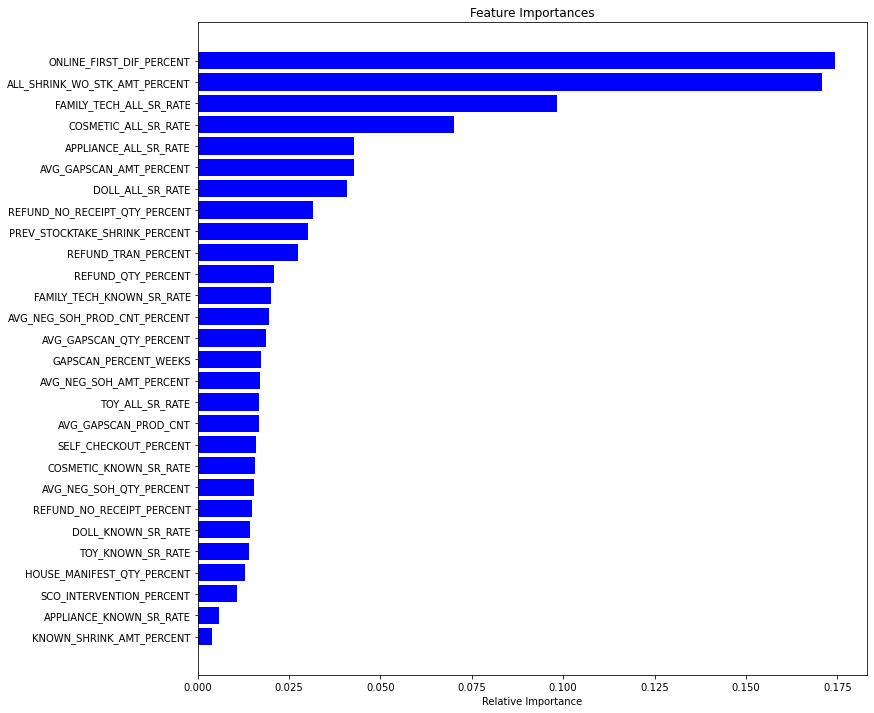

In [137]:
get_ipython().run_line_magic('matplotlib', 'inline')
features = X_train_Non_Metro.columns
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices], color='b',align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize = 10)
plt.xlabel('Relative Importance')

#### Non Metro Model with Prev Shrink Rate and without Online first diff Percent

In [179]:
#### Final Non Metro Model
# Creating Target and Regressor Subsets
Y_Non_Metro = data_NonMetro['Shrink_Amt_Rate']
# Predictor Variable
X_Non_Metro =  data_NonMetro[[
           'LOCATION_SOURCE_IDENTIFIER',
           'START_DATE', 'END_DATE',
           #'AVG_WEEKLY_TRAN',
           'GAPSCAN_PERCENT_WEEKS',
           'AVG_GAPSCAN_PROD_CNT',
           'REFUND_TRAN_PERCENT',
           'REFUND_QTY_PERCENT',
           'REFUND_NO_RECEIPT_PERCENT',
           'REFUND_NO_RECEIPT_QTY_PERCENT', 
           'SELF_CHECKOUT_PERCENT',
           'AVG_GAPSCAN_AMT_PERCENT',
           'AVG_GAPSCAN_QTY_PERCENT',
           #'AVG_HEAD_OFFICE_AMT_PERCENT', 
           #'AVG_HEAD_OFFICE_QTY_PERCENT',
           'HOUSE_MANIFEST_QTY_PERCENT', 
           'AVG_NEG_SOH_QTY_PERCENT',
           'AVG_NEG_SOH_AMT_PERCENT', 
           'AVG_NEG_SOH_PROD_CNT_PERCENT',
           'KNOWN_SHRINK_AMT_PERCENT',
           'ALL_SHRINK_WO_STK_AMT_PERCENT',
           #'ONLINE_FIRST_DIF_PERCENT',
           'SCO_INTERVENTION_PERCENT',
           #'AVG_SOH_COST_AMT', 
           #'AVG_SALES_AMT',
           #'AVG_GAPSCAN_AMT',
           'Previous_Shrink_Amt_Rate',
           'PREV_STOCKTAKE_SHRINK_PERCENT',
           'COSMETIC_KNOWN_SR_RATE',
           'APPLIANCE_KNOWN_SR_RATE', 
           'DOLL_KNOWN_SR_RATE', 
           'TOY_KNOWN_SR_RATE',
           'FAMILY_TECH_KNOWN_SR_RATE',
           'COSMETIC_ALL_SR_RATE', 
           'APPLIANCE_ALL_SR_RATE', 
           'DOLL_ALL_SR_RATE',
           'TOY_ALL_SR_RATE',
           'FAMILY_TECH_ALL_SR_RATE'
]]

# Split the data into train and test data:
X_train_Non_Metro_raw, X_test_Non_Metro_raw, Y_train_Non_Metro, Y_test_Non_Metro = train_test_split(X_Non_Metro, Y_Non_Metro, test_size = 0.2, random_state=123)
# Build the model with the random forest regression algorithm:
X_train_Non_Metro = X_train_Non_Metro_raw.drop(['LOCATION_SOURCE_IDENTIFIER','START_DATE','END_DATE'], axis=1)
X_test_Non_Metro = X_test_Non_Metro_raw.drop(['LOCATION_SOURCE_IDENTIFIER','START_DATE','END_DATE'], axis=1)
model_Non_Metro = RandomForestRegressor(max_depth=40, random_state=0, n_estimators=40, max_leaf_nodes=40)
model_Non_Metro.fit(X_train_Non_Metro, Y_train_Non_Metro)

# Make predictions on test data using the model trained on original data
predictions_Non_Metro = model_Non_Metro.predict(X_test_Non_Metro)
# Performance metrics
errors_Non_Metro = predictions_Non_Metro - Y_test_Non_Metro
abs_errors_Non_Metro = abs(predictions_Non_Metro - Y_test_Non_Metro)
abs_Y_test_Non_Metro = abs(Y_test_Non_Metro)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(abs_errors_Non_Metro), 5), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape_Non_Metro = 100 * (abs_errors_Non_Metro / abs_Y_test_Non_Metro)
# Calculate and display accuracy
accuracy_Non_Metro = 100 - np.mean(mape_Non_Metro)
print('Accuracy Non Metro:', round(accuracy_Non_Metro, 2), '%.')
print('Mape Non Metro:', round(np.mean(mape_Non_Metro), 2), '%.')
print('Mape Non Metro Max:', round(np.max(mape_Non_Metro), 2), '%.')
print('Abs Error Non Metro Max:', round(np.max(abs_errors_Non_Metro)*100, 2), '%.')

Metrics for Random Forest Trained on Original Data
Average absolute error: 0.0023 degrees.
Accuracy Non Metro: 84.82 %.
Mape Non Metro: 15.18 %.
Mape Non Metro Max: 109.34 %.
Abs Error Non Metro Max: 1.25 %.


In [147]:
predictions_train_Non_Metro = model_Non_Metro.predict(X_train_Non_Metro)
# Performance metrics
errors_train_Non_Metro = predictions_train_Non_Metro - Y_train_Non_Metro
abs_errors_train_Non_Metro = abs(predictions_train_Non_Metro - Y_train_Non_Metro)
abs_Y_train_Non_Metro = abs(Y_train_Non_Metro)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(abs_errors_train_Non_Metro), 5), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape_train_Non_Metro = 100 * (abs_errors_train_Non_Metro / abs_Y_train_Non_Metro)
# Calculate and display accuracy
accuracy_train_Non_Metro = 100 - np.mean(mape_train_Non_Metro)
print('Accuracy Non Metro:', round(accuracy_train_Non_Metro, 2), '%.')
print('Mape Non Metro:', round(np.mean(mape_train_Non_Metro), 2), '%.')
print('Mape Non Metro Max:', round(np.max(mape_train_Non_Metro), 2), '%.')
print('Abs Error Non Metro Max:', round(np.max(abs_errors_train_Non_Metro)*100, 2), '%.')

Metrics for Random Forest Trained on Original Data
Average absolute error: 0.00121 degrees.
Accuracy Non Metro: 91.76 %.
Mape Non Metro: 8.24 %.
Mape Non Metro Max: 41.49 %.
Abs Error Non Metro Max: 0.63 %.


In [148]:
model_Non_Metro.feature_importances_

array([0.01100338, 0.01120078, 0.01745537, 0.02051484, 0.01606331,
       0.01731973, 0.01214316, 0.04238579, 0.02463591, 0.01343416,
       0.01461419, 0.01658542, 0.00815765, 0.00561026, 0.14751697,
       0.01593794, 0.35453501, 0.01549166, 0.00787582, 0.00715018,
       0.01512371, 0.01562776, 0.01252145, 0.04306884, 0.0240298 ,
       0.04712621, 0.00787946, 0.05499123])

In [149]:
importances = model_Non_Metro.feature_importances_
indices = np.argsort(importances)
print(indices)

[13 19 18 26 12  0  1  6 22  9 10 20 17 21 15  4 11  5  2  3 24  8  7 23
 25 27 14 16]


Text(0.5, 0, 'Relative Importance')

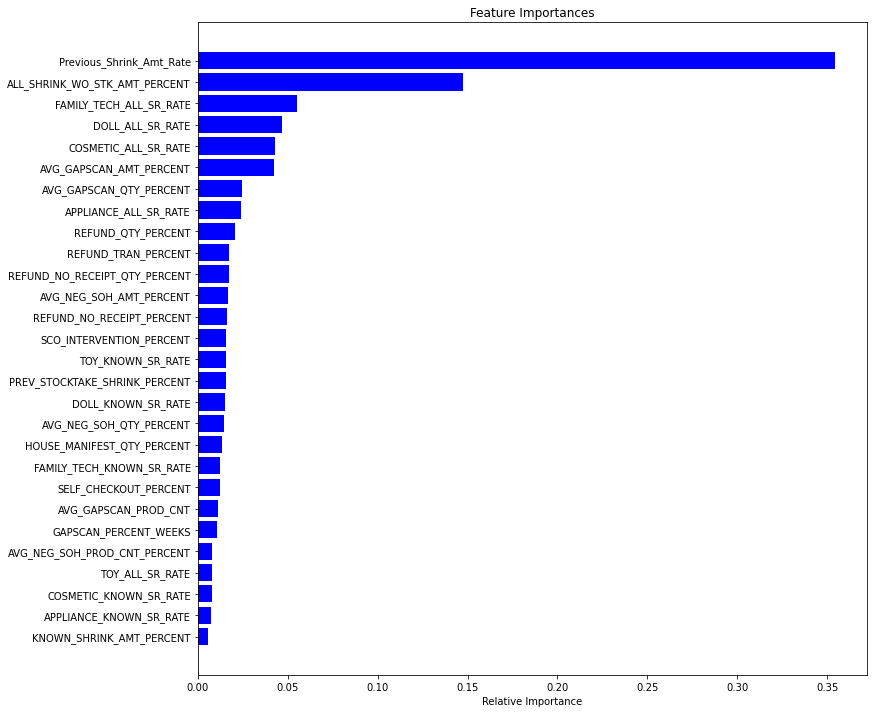

In [150]:
get_ipython().run_line_magic('matplotlib', 'inline')
features = X_train_Non_Metro.columns
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices], color='b',align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize = 10)
plt.xlabel('Relative Importance')

#### Non Metro Model without Prev Shrink Rate and without Online first diff Percent

In [185]:
#### Final Non Metro Model
# Creating Target and Regressor Subsets
Y_Non_Metro = data_NonMetro['Shrink_Amt_Rate']
# Predictor Variable
X_Non_Metro =  data_NonMetro[[
           'LOCATION_SOURCE_IDENTIFIER',
           'START_DATE', 'END_DATE',
           #'AVG_WEEKLY_TRAN',
           'GAPSCAN_PERCENT_WEEKS',
           'AVG_GAPSCAN_PROD_CNT',
           'REFUND_TRAN_PERCENT',
           'REFUND_QTY_PERCENT',
           'REFUND_NO_RECEIPT_PERCENT',
           'REFUND_NO_RECEIPT_QTY_PERCENT', 
           'SELF_CHECKOUT_PERCENT',
           'AVG_GAPSCAN_AMT_PERCENT',
           'AVG_GAPSCAN_QTY_PERCENT',
           #'AVG_HEAD_OFFICE_AMT_PERCENT', 
           #'AVG_HEAD_OFFICE_QTY_PERCENT',
           'HOUSE_MANIFEST_QTY_PERCENT', 
           'AVG_NEG_SOH_QTY_PERCENT',
           'AVG_NEG_SOH_AMT_PERCENT', 
           'AVG_NEG_SOH_PROD_CNT_PERCENT',
           'KNOWN_SHRINK_AMT_PERCENT',
           'ALL_SHRINK_WO_STK_AMT_PERCENT',
           #'ONLINE_FIRST_DIF_PERCENT',
           'SCO_INTERVENTION_PERCENT',
           #'AVG_SOH_COST_AMT', 
           #'AVG_SALES_AMT',
           #'AVG_GAPSCAN_AMT',
           #'Previous_Shrink_Amt_Rate',
           'PREV_STOCKTAKE_SHRINK_PERCENT',
           'COSMETIC_KNOWN_SR_RATE',
           'APPLIANCE_KNOWN_SR_RATE', 
           'DOLL_KNOWN_SR_RATE', 
           'TOY_KNOWN_SR_RATE',
           'FAMILY_TECH_KNOWN_SR_RATE',
           'COSMETIC_ALL_SR_RATE', 
           'APPLIANCE_ALL_SR_RATE', 
           'DOLL_ALL_SR_RATE',
           'TOY_ALL_SR_RATE',
           'FAMILY_TECH_ALL_SR_RATE'
]]

# Split the data into train and test data:
X_train_Non_Metro_raw, X_test_Non_Metro_raw, Y_train_Non_Metro, Y_test_Non_Metro = train_test_split(X_Non_Metro, Y_Non_Metro, test_size = 0.2, random_state=123)
# Build the model with the random forest regression algorithm:
X_train_Non_Metro = X_train_Non_Metro_raw.drop(['LOCATION_SOURCE_IDENTIFIER','START_DATE','END_DATE'], axis=1)
X_test_Non_Metro = X_test_Non_Metro_raw.drop(['LOCATION_SOURCE_IDENTIFIER','START_DATE','END_DATE'], axis=1)
model_Non_Metro = RandomForestRegressor(max_depth=40, random_state=0, n_estimators=40, max_leaf_nodes=40)
model_Non_Metro.fit(X_train_Non_Metro, Y_train_Non_Metro)

# Make predictions on test data using the model trained on original data
predictions_Non_Metro = model_Non_Metro.predict(X_test_Non_Metro)
# Performance metrics
errors_Non_Metro = predictions_Non_Metro - Y_test_Non_Metro
abs_errors_Non_Metro = abs(predictions_Non_Metro - Y_test_Non_Metro)
abs_Y_test_Non_Metro = abs(Y_test_Non_Metro)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(abs_errors_Non_Metro), 5), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape_Non_Metro = 100 * (abs_errors_Non_Metro / abs_Y_test_Non_Metro)
# Calculate and display accuracy
accuracy_Non_Metro = 100 - np.mean(mape_Non_Metro)
print('Accuracy Non Metro:', round(accuracy_Non_Metro, 2), '%.')
print('Mape Non Metro:', round(np.mean(mape_Non_Metro), 2), '%.')
print('Mape Non Metro Max:', round(np.max(mape_Non_Metro), 2), '%.')
print('Abs Error Non Metro Max:', round(np.max(abs_errors_Non_Metro)*100, 2), '%.')

Metrics for Random Forest Trained on Original Data
Average absolute error: 0.0022 degrees.
Accuracy Non Metro: 83.36 %.
Mape Non Metro: 16.64 %.
Mape Non Metro Max: 132.13 %.
Abs Error Non Metro Max: 0.89 %.


In [158]:
predictions_train_Non_Metro = model_Non_Metro.predict(X_train_Non_Metro)
# Performance metrics
errors_train_Non_Metro = predictions_train_Non_Metro - Y_train_Non_Metro
abs_errors_train_Non_Metro = abs(predictions_train_Non_Metro - Y_train_Non_Metro)
abs_Y_train_Non_Metro = abs(Y_train_Non_Metro)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(abs_errors_train_Non_Metro), 5), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape_train_Non_Metro = 100 * (abs_errors_train_Non_Metro / abs_Y_train_Non_Metro)
# Calculate and display accuracy
accuracy_train_Non_Metro = 100 - np.mean(mape_train_Non_Metro)
print('Accuracy Non Metro:', round(accuracy_train_Non_Metro, 2), '%.')
print('Mape Non Metro:', round(np.mean(mape_train_Non_Metro), 2), '%.')
print('Mape Non Metro Max:', round(np.max(mape_train_Non_Metro), 2), '%.')
print('Abs Error Non Metro Max:', round(np.max(abs_errors_train_Non_Metro)*100, 2), '%.')

Metrics for Random Forest Trained on Original Data
Average absolute error: 0.00129 degrees.
Accuracy Non Metro: 90.8 %.
Mape Non Metro: 9.2 %.
Mape Non Metro Max: 52.64 %.
Abs Error Non Metro Max: 0.76 %.


In [159]:
model_Non_Metro.feature_importances_

array([0.02165632, 0.01982771, 0.03468768, 0.02830838, 0.01464632,
       0.03063589, 0.02754231, 0.05884628, 0.02241017, 0.01257591,
       0.03105567, 0.01756903, 0.02592281, 0.01010854, 0.16047035,
       0.01251583, 0.06751887, 0.02424116, 0.00957735, 0.01525331,
       0.01616034, 0.02034946, 0.08730188, 0.03826715, 0.04490869,
       0.0146898 , 0.13295278])

In [160]:
importances = model_Non_Metro.feature_importances_
indices = np.argsort(importances)
print(indices)

[18 13 15  9  4 25 19 20 11  1 21  0  8 17 12  6  3  5 10  2 23 24  7 16
 22 26 14]


Text(0.5, 0, 'Relative Importance')

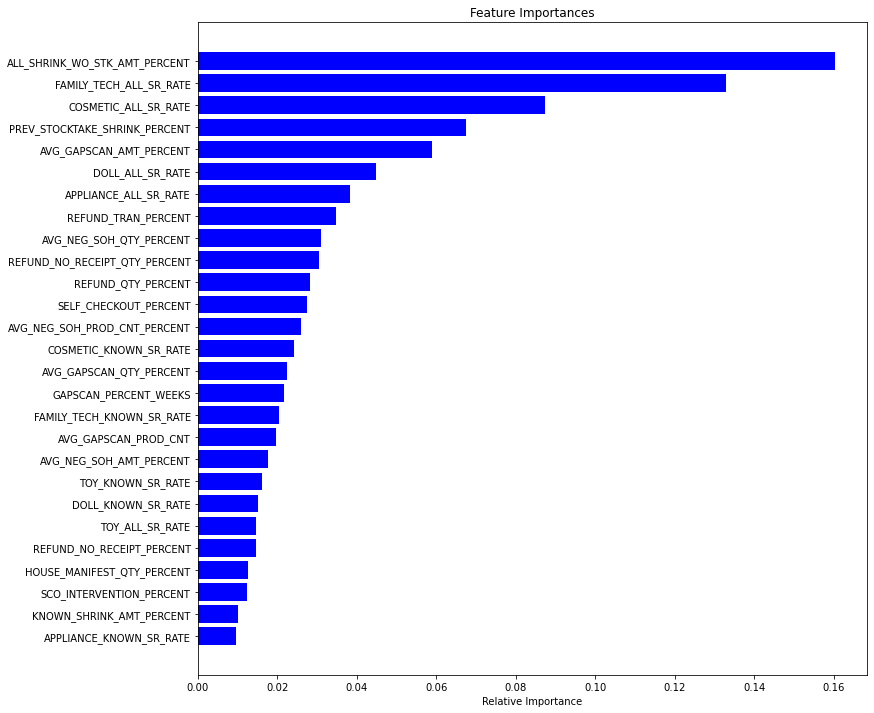

In [161]:
get_ipython().run_line_magic('matplotlib', 'inline')
features = X_train_Non_Metro.columns
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices], color='b',align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize = 10)
plt.xlabel('Relative Importance')

#### Checking for 2022 data

In [536]:
#### Checking for 2022 data
data_Non_Metro_temp =  data_NonMetro[['Shrink_Amt_Rate',
           'LOCATION_SOURCE_IDENTIFIER',
           'START_DATE', 'END_DATE',
           #'AVG_WEEKLY_TRAN',
           'GAPSCAN_PERCENT_WEEKS',
           'AVG_GAPSCAN_PROD_CNT',
           'REFUND_TRAN_PERCENT',
           'REFUND_QTY_PERCENT',
           'REFUND_NO_RECEIPT_PERCENT',
           'REFUND_NO_RECEIPT_QTY_PERCENT', 
           'SELF_CHECKOUT_PERCENT',
           'AVG_GAPSCAN_AMT_PERCENT',
           'AVG_GAPSCAN_QTY_PERCENT',
           #'AVG_HEAD_OFFICE_AMT_PERCENT', 
           #'AVG_HEAD_OFFICE_QTY_PERCENT',
           'HOUSE_MANIFEST_QTY_PERCENT', 
           'AVG_NEG_SOH_QTY_PERCENT',
           'AVG_NEG_SOH_AMT_PERCENT', 
           'AVG_NEG_SOH_PROD_CNT_PERCENT',
           'KNOWN_SHRINK_AMT_PERCENT',
           'ALL_SHRINK_WO_STK_AMT_PERCENT',
           'ONLINE_FIRST_DIF_PERCENT',
           'SCO_INTERVENTION_PERCENT',
           #'AVG_SOH_COST_AMT', 
           #'AVG_SALES_AMT',
           #'AVG_GAPSCAN_AMT',
           #'Previous_Shrink_Amt_Rate',
           'PREV_STOCKTAKE_SHRINK_PERCENT',
           'COSMETIC_KNOWN_SR_RATE',
           'APPLIANCE_KNOWN_SR_RATE', 
           'DOLL_KNOWN_SR_RATE', 
           'TOY_KNOWN_SR_RATE',
           'FAMILY_TECH_KNOWN_SR_RATE',
           'COSMETIC_ALL_SR_RATE', 
           'APPLIANCE_ALL_SR_RATE', 
           'DOLL_ALL_SR_RATE',
           'TOY_ALL_SR_RATE',
           'FAMILY_TECH_ALL_SR_RATE'
]]

test_Non_Metro_raw = data_Non_Metro_temp[data_Non_Metro_temp['END_DATE']=='20/02/2022']
Y_test_Non_Metro = test_Non_Metro_raw['Shrink_Amt_Rate']
X_test_Non_Metro_raw = test_Non_Metro_raw.drop(['Shrink_Amt_Rate'], axis=1)
X_test_Non_Metro = X_test_Non_Metro_raw.drop(['LOCATION_SOURCE_IDENTIFIER','START_DATE','END_DATE'], axis=1)

predictions_Non_Metro = model_Non_Metro.predict(X_test_Non_Metro)
# Performance metrics
errors_Non_Metro = predictions_Non_Metro - Y_test_Non_Metro
abs_errors_Non_Metro = abs(predictions_Non_Metro - Y_test_Non_Metro)
abs_Y_test_Non_Metro = abs(Y_test_Non_Metro)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(abs_errors_Non_Metro), 5), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape_Non_Metro = 100 * (abs_errors_Non_Metro / abs_Y_test_Non_Metro)
# Calculate and display accuracy
accuracy_Non_Metro = 100 - np.mean(mape_Non_Metro)
print('Accuracy Non Metro:', round(accuracy_Non_Metro, 2), '%.')
print('Mape Non Metro:', round(np.mean(mape_Non_Metro), 2), '%.')
print('Mape Non Metro Max:', round(np.max(mape_Non_Metro), 2), '%.')
print('Abs Error Non Metro Max:', round(np.max(abs_errors_Non_Metro)*100, 2), '%.')

Metrics for Random Forest Trained on Original Data
Average absolute error: 0.00156 degrees.
Accuracy Non Metro: 85.55 %.
Mape Non Metro: 14.45 %.
Mape Non Metro Max: 105.57 %.
Abs Error Non Metro Max: 0.62 %.


In [34]:
# Creating Target and Regressor Subsets
Y_Non_Metro = data_NonMetro['Shrink_Amt_Rate']
# Predictor Variable
X_Non_Metro =  data_NonMetro[[
           'LOCATION_SOURCE_IDENTIFIER',
           'START_DATE', 'END_DATE',
           'AVG_WEEKLY_TRAN',
           'GAPSCAN_PERCENT_WEEKS',
           'AVG_GAPSCAN_PROD_CNT',
         #   'REFUND_TRAN_PERCENT',
           #'REFUND_QTY_PERCENT',
           'REFUND_NO_RECEIPT_PERCENT',
           'REFUND_NO_RECEIPT_QTY_PERCENT', 
         #   'SELF_CHECKOUT_PERCENT',
           'AVG_GAPSCAN_AMT_PERCENT',
         #   'AVG_GAPSCAN_QTY_PERCENT',
           'AVG_HEAD_OFFICE_AMT_PERCENT', 
           'AVG_HEAD_OFFICE_QTY_PERCENT',
           'HOUSE_MANIFEST_QTY_PERCENT', 
         #   'AVG_NEG_SOH_QTY_PERCENT',
           'AVG_NEG_SOH_AMT_PERCENT', 
           'AVG_NEG_SOH_PROD_CNT_PERCENT',
           'KNOWN_SHRINK_AMT_PERCENT',
           'ALL_SHRINK_WO_STK_AMT_PERCENT',
         #   'ONLINE_FIRST_DIF_PERCENT',
         #   'SCO_INTERVENTION_PERCENT',
           'AVG_SOH_COST_AMT', 
           'AVG_SALES_AMT',
         #   'AVG_GAPSCAN_AMT',
           'Previous_Shrink_Amt_Rate',
           'COSMETIC_KNOWN_SR_RATE',
         #   'APPLIANCE_KNOWN_SR_RATE', 
           'DOLL_KNOWN_SR_RATE', 
           'TOY_KNOWN_SR_RATE',
           'FAMILY_TECH_KNOWN_SR_RATE',
           'COSMETIC_ALL_SR_RATE', 
           'APPLIANCE_ALL_SR_RATE', 
         #   'DOLL_ALL_SR_RATE',
         #   'TOY_ALL_SR_RATE',
           'FAMILY_TECH_ALL_SR_RATE'
]]

# Split the data into train and test data:
X_train_Non_Metro_raw, X_test_Non_Metro_raw, Y_train_Non_Metro, Y_test_Non_Metro = train_test_split(X_Non_Metro, Y_Non_Metro, test_size = 0.2, random_state=123)
# Build the model with the random forest regression algorithm:
X_train_Non_Metro = X_train_Non_Metro_raw.drop(['LOCATION_SOURCE_IDENTIFIER','START_DATE','END_DATE'], axis=1)
X_test_Non_Metro = X_test_Non_Metro_raw.drop(['LOCATION_SOURCE_IDENTIFIER','START_DATE','END_DATE'], axis=1)
model_Non_Metro = RandomForestRegressor(max_depth=8, random_state=0, n_estimators=10)
model_Non_Metro.fit(X_train_Non_Metro, Y_train_Non_Metro)

# Make predictions on test data using the model trained on original data
predictions_Non_Metro = model_Non_Metro.predict(X_test_Non_Metro)
# Performance metrics
errors_Non_Metro = predictions_Non_Metro - Y_test_Non_Metro
abs_errors_Non_Metro = abs(predictions_Non_Metro - Y_test_Non_Metro)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(abs_errors_Non_Metro), 5), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape_Non_Metro = 100 * (abs_errors_Non_Metro / Y_test_Non_Metro)
# Calculate and display accuracy
accuracy_Non_Metro = 100 - np.mean(mape_Non_Metro)
print('Accuracy Non Metro:', round(accuracy_Non_Metro, 2), '%.')
print('Mape Non Metro:', round(np.mean(mape_Non_Metro), 2), '%.')


Metrics for Random Forest Trained on Original Data
Average absolute error: 0.00297 degrees.
Accuracy Non Metro: 115.43 %.
Mape Non Metro: -15.43 %.


In [35]:
#Y = test_data_to_predict_NonMetro['SHRINK_AMT_RATE_CALCULATED']
Y = test_data_to_predict_NonMetro['Shrink_Amt_Rate']
X =  test_data_to_predict_NonMetro[[
           #'LOCATION_SOURCE_IDENTIFIER',
           #'START_DATE', 'END_QUARTER_DATE',
           'AVG_WEEKLY_TRAN',
           'GAPSCAN_PERCENT_WEEKS',
           'AVG_GAPSCAN_PROD_CNT',
         #   'REFUND_TRAN_PERCENT',
           #'REFUND_QTY_PERCENT',
           'REFUND_NO_RECEIPT_PERCENT',
           'REFUND_NO_RECEIPT_QTY_PERCENT', 
         #   'SELF_CHECKOUT_PERCENT',
           'AVG_GAPSCAN_AMT_PERCENT',
         #   'AVG_GAPSCAN_QTY_PERCENT',
           'AVG_HEAD_OFFICE_AMT_PERCENT', 
           'AVG_HEAD_OFFICE_QTY_PERCENT',
           'HOUSE_MANIFEST_QTY_PERCENT', 
         #   'AVG_NEG_SOH_QTY_PERCENT',
           'AVG_NEG_SOH_AMT_PERCENT', 
           'AVG_NEG_SOH_PROD_CNT_PERCENT',
           'KNOWN_SHRINK_AMT_PERCENT',
           'ALL_SHRINK_WO_STK_AMT_PERCENT',
         #   'ONLINE_FIRST_DIF_PERCENT',
         #   'SCO_INTERVENTION_PERCENT',
           'AVG_SOH_COST_AMT', 
           'AVG_SALES_AMT',
         #   'AVG_GAPSCAN_AMT',
           'Previous_Shrink_Amt_Rate',
           'COSMETIC_KNOWN_SR_RATE',
         #   'APPLIANCE_KNOWN_SR_RATE', 
           'DOLL_KNOWN_SR_RATE', 
           'TOY_KNOWN_SR_RATE',
           'FAMILY_TECH_KNOWN_SR_RATE',
           'COSMETIC_ALL_SR_RATE', 
           'APPLIANCE_ALL_SR_RATE', 
         #   'DOLL_ALL_SR_RATE',
         #   'TOY_ALL_SR_RATE',
           'FAMILY_TECH_ALL_SR_RATE'
        ]]

predictions = model_Non_Metro.predict(X) # RF Model predict using data
# Performance metrics
#errors = abs(predictions - Y)
errors = predictions - Y
abs_errors = abs(predictions - Y) # Get absolute errors
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(abs_errors), 5), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (abs_errors / Y) # Get mean absolute percentage errors (MAPE)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
test_data_to_predict_NonMetro["Predicted_Shrink"] = predictions # Append the predictions to the data with quaterly observations

Metrics for Random Forest Trained on Original Data
Average absolute error: 0.00221 degrees.
Accuracy: 112.53 %.


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [539]:
model_Non_Metro.feature_importances_

array([0.01723223, 0.01680788, 0.02749034, 0.02089506, 0.01497032,
       0.03163619, 0.01607315, 0.04269193, 0.01875999, 0.01295824,
       0.01536657, 0.01694657, 0.01938438, 0.00379352, 0.17081853,
       0.17449083, 0.01064713, 0.03024906, 0.01575496, 0.00590662,
       0.01420479, 0.0141403 , 0.02010216, 0.07011928, 0.04271216,
       0.04081949, 0.01685261, 0.09817569])

In [540]:
importances = model_Non_Metro.feature_importances_
indices = np.argsort(importances)
print(indices)

[13 19 16  9 21 20  4 10 18  6  1 26 11  0  8 12 22  3  2 17  5 25  7 24
 23 27 14 15]


Text(0.5, 0, 'Relative Importance')

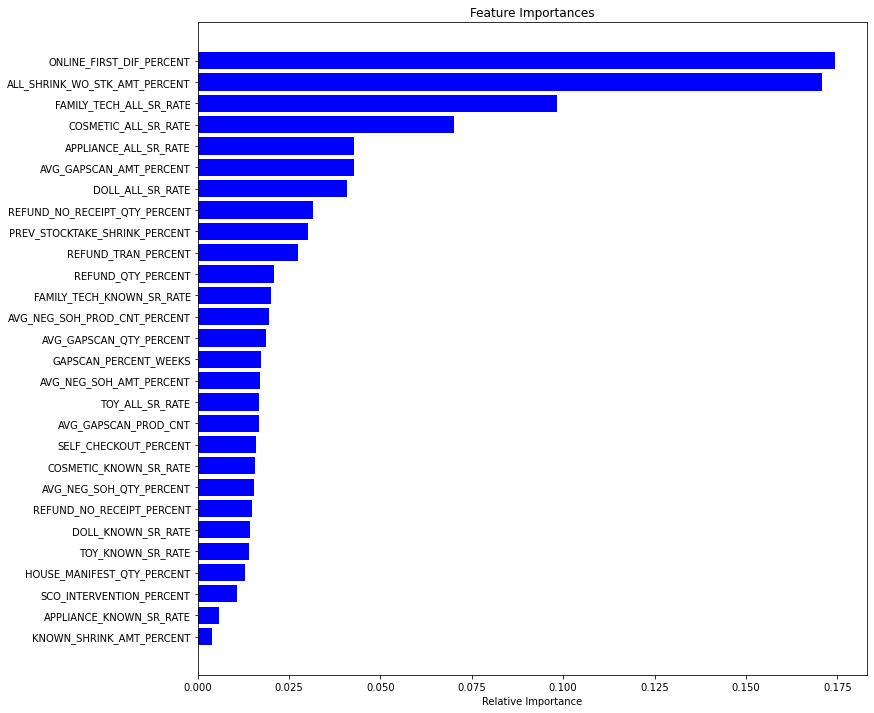

In [541]:
get_ipython().run_line_magic('matplotlib', 'inline')
features = X_train_Non_Metro.columns
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices], color='b',align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize = 10)
plt.xlabel('Relative Importance')

In [39]:
X_test_Non_Metro_raw.head()

,LOCATION_SOURCE_IDENTIFIER,START_DATE,END_DATE,AVG_WEEKLY_TRAN,GAPSCAN_PERCENT_WEEKS,AVG_GAPSCAN_PROD_CNT,REFUND_NO_RECEIPT_PERCENT,REFUND_NO_RECEIPT_QTY_PERCENT,AVG_GAPSCAN_AMT_PERCENT,AVG_HEAD_OFFICE_AMT_PERCENT,AVG_HEAD_OFFICE_QTY_PERCENT,HOUSE_MANIFEST_QTY_PERCENT,AVG_NEG_SOH_AMT_PERCENT,AVG_NEG_SOH_PROD_CNT_PERCENT,KNOWN_SHRINK_AMT_PERCENT,ALL_SHRINK_WO_STK_AMT_PERCENT,AVG_SOH_COST_AMT,AVG_SALES_AMT,Previous_Shrink_Amt_Rate,COSMETIC_KNOWN_SR_RATE,DOLL_KNOWN_SR_RATE,TOY_KNOWN_SR_RATE,FAMILY_TECH_KNOWN_SR_RATE,COSMETIC_ALL_SR_RATE,APPLIANCE_ALL_SR_RATE,FAMILY_TECH_ALL_SR_RATE
285,1126,21/07/2019,17/05/2020,8242.272727,0.909091,111.700000,0.187865,0.199784,-0.000449,-7.170000e-06,-5.030000e-06,0.006956,-0.018378,0.048078,-0.003158,-0.005525,1230411.136,258776.1320,-0.007823,-0.007834,-0.001348,-0.003574,-0.009178,-0.009646,-0.017345,-0.016233
251,1110,20/05/2018,14/07/2019,11964.344260,0.983607,376.000000,0.174005,0.180784,-0.001656,-9.580000e-07,-1.980000e-07,0.006805,-0.025667,0.077062,-0.005795,-0.011149,1412262.492,334228.5315,-0.015120,-0.033226,-0.003224,-0.007160,-0.015247,-0.077476,-0.027794,-0.025010
491,1225,24/02/2019,23/02/2020,9405.641509,1.000000,632.943396,0.235723,0.237422,-0.000892,-1.510000e-06,-1.370000e-06,0.006191,-0.034124,0.091520,-0.004609,-0.008941,1654257.170,352206.2028,-0.016200,-0.015425,-0.003045,-0.008466,-0.012253,-0.037882,-0.018721,-0.021320
201,1089,24/02/2019,23/02/2020,9695.830189,0.962264,191.882353,0.186403,0.175940,-0.000322,-4.560000e-06,-1.570000e-06,0.004419,-0.016854,0.046939,-0.004517,-0.006333,1285441.132,288355.3843,-0.009700,-0.013267,-0.002108,-0.006303,-0.013212,-0.017698,-0.024555,-0.016203
520,1236,30/06/2019,17/05/2020,17370.680850,0.978723,255.456522,0.190555,0.195520,-0.001428,-1.090000e-06,-5.470000e-07,0.002567,-0.025709,0.069143,-0.004267,-0.009115,1687271.830,463852.4345,-0.021000,-0.008297,-0.002207,-0.005602,-0.013173,-0.023746,-0.027147,-0.025894


In [40]:
X_test_Non_Metro_raw['actuals'] = Y_test_Non_Metro
X_test_Non_Metro_raw['predictions'] = predictions_Non_Metro
X_test_Non_Metro_raw['error'] = errors_Non_Metro
X_test_Non_Metro_raw['abs_error'] = abs_errors_Non_Metro
X_test_Non_Metro_raw['mape'] = mape_Non_Metro
X_test_Non_Metro_raw.to_csv("check_data_20210719.csv")

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is tryin

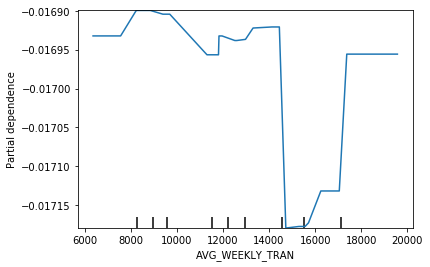

In [43]:
cols_to_use = ['AVG_WEEKLY_TRAN',
           'GAPSCAN_PERCENT_WEEKS',
           'AVG_GAPSCAN_PROD_CNT',
           #'REFUND_QTY_PERCENT',
           'REFUND_NO_RECEIPT_PERCENT',
           'REFUND_NO_RECEIPT_QTY_PERCENT', 
         #   'SELF_CHECKOUT_PERCENT',
           'AVG_GAPSCAN_AMT_PERCENT',
         #   'AVG_GAPSCAN_QTY_PERCENT',
           'AVG_HEAD_OFFICE_AMT_PERCENT', 
           'AVG_HEAD_OFFICE_QTY_PERCENT',
           'HOUSE_MANIFEST_QTY_PERCENT', 
         #   'AVG_NEG_SOH_QTY_PERCENT',
           'AVG_NEG_SOH_AMT_PERCENT', 
           'AVG_NEG_SOH_PROD_CNT_PERCENT',
           'KNOWN_SHRINK_AMT_PERCENT',
           'ALL_SHRINK_WO_STK_AMT_PERCENT',
         #   'ONLINE_FIRST_DIF_PERCENT',
         #   'SCO_INTERVENTION_PERCENT',
           'AVG_SOH_COST_AMT', 
           'AVG_SALES_AMT',
         #   'AVG_GAPSCAN_AMT',
           'Previous_Shrink_Amt_Rate',
           'COSMETIC_KNOWN_SR_RATE',
         #   'APPLIANCE_KNOWN_SR_RATE', 
           'DOLL_KNOWN_SR_RATE', 
           'TOY_KNOWN_SR_RATE',
           'FAMILY_TECH_KNOWN_SR_RATE',
           'COSMETIC_ALL_SR_RATE', 
           'APPLIANCE_ALL_SR_RATE', 
         #   'DOLL_ALL_SR_RATE',
         #   'TOY_ALL_SR_RATE',
           'FAMILY_TECH_ALL_SR_RATE']
my_plots_0 = plot_partial_dependence(model_Non_Metro, 
                                   features=[0], 
                                   X=X_test_Non_Metro, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=100)

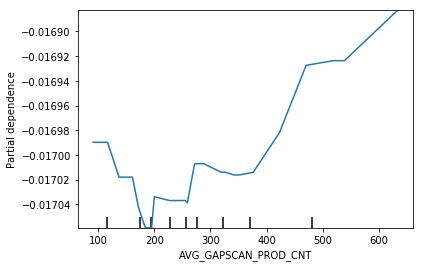

In [45]:
my_plots_1 = plot_partial_dependence(model_Non_Metro, 
                                   features=[2],
                                   X=X_test_Non_Metro, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=100)

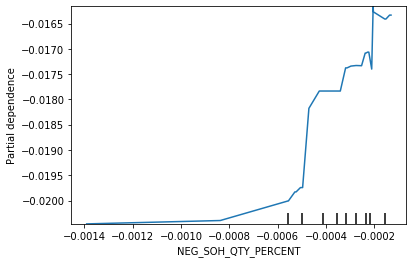

In [209]:
my_plots_2 = plot_partial_dependence(model_Non_Metro, 
                                   features=[2], 
                                   X=X_test_Non_Metro, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=100)

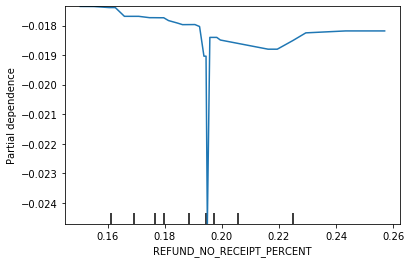

In [210]:
my_plots_3 = plot_partial_dependence(model_Non_Metro, 
                                   features=[3], 
                                   X=X_test_Non_Metro, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=100)

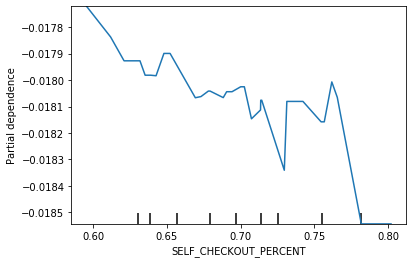

In [211]:
my_plots_4 = plot_partial_dependence(model_Non_Metro, 
                                   features=[4], 
                                   X=X_test_Non_Metro, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=100)

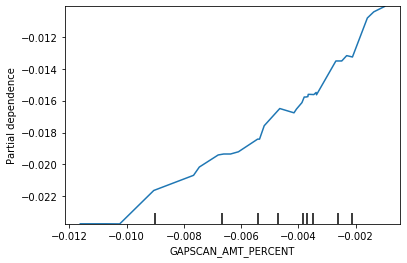

In [212]:
my_plots_5 = plot_partial_dependence(model_Non_Metro, 
                                   features=[5], 
                                   X=X_test_Non_Metro, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=100)

In [213]:
my_plots_6 = plot_partial_dependence(model_Non_Metro, 
                                   features=[6], 
                                   X=X_test_Non_Metro, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=100)

ValueError: All entries of features must be less than len(feature_names) = 6, got 6.

# Metro HSR/LSR Non Metro HSR/LSR Level Models

# Model 1 : Metro HSR

In [121]:
Y_Metro_HSR = data_Metro_HSR['Shrink_Amt_Rate']
X_Metro_HSR =  data_Metro_HSR[[
           'HEAD_OFFICE_AMT_PERCENT', 
           'HOUSE_MANIFEST_QTY_PERCENT', 
           'NEG_SOH_QTY_PERCENT'
         , 'REFUND_NO_RECEIPT_PERCENT', 
           'REFUND_PERCENT',
           'SELF_CHECKOUT_PERCENT',
'GAPSCAN_AMT_PERCENT']]
# Split the data into train and test data:
X_train_Metro_HSR, X_test_Metro_HSR, Y_train_Metro_HSR, Y_test_Metro_HSR = train_test_split(X_Metro_HSR, Y_Metro_HSR, test_size = 0.2, random_state=123)
# Build the model with the random forest regression algorithm:
model_Metro_HSR = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model_Metro_HSR.fit(X_train_Metro_HSR, Y_train_Metro_HSR)
# Make predictions on test data using the model trained on original data
predictions_Metro_HSR = model_Metro_HSR.predict(X_test_Metro_HSR)
# Performance metrics
errors_Metro_HSR = abs(predictions_Metro_HSR - Y_test_Metro_HSR)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(errors_Metro_HSR), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape_Metro_HSR = 100 * (errors_Metro_HSR / Y_test_Metro_HSR)
# Calculate and display accuracy
accuracy_Metro_HSR = 100 - np.mean(mape_Metro_HSR)
print('Accuracy on Metro HSR Cluster:', round(accuracy_Metro_HSR, 2), '%.')

Metrics for Random Forest Trained on Original Data
Average absolute error: 0.0 degrees.
Accuracy on Metro HSR Cluster: 116.93 %.


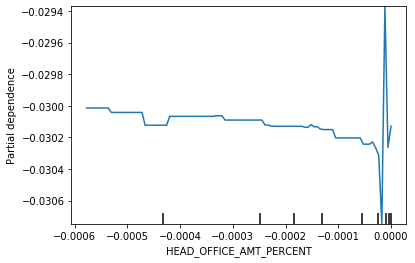

In [122]:
cols_to_use = ['HEAD_OFFICE_AMT_PERCENT', 
           'HOUSE_MANIFEST_QTY_PERCENT', 
           'NEG_SOH_QTY_PERCENT'
         , 'REFUND_NO_RECEIPT_PERCENT', 
           'REFUND_PERCENT',
           'SELF_CHECKOUT_PERCENT',
'GAPSCAN_AMT_PERCENT']
my_plots_0 = plot_partial_dependence(model_Metro_HSR, 
                                   features=[0], 
                                   X=X_test_Metro_HSR, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=100)

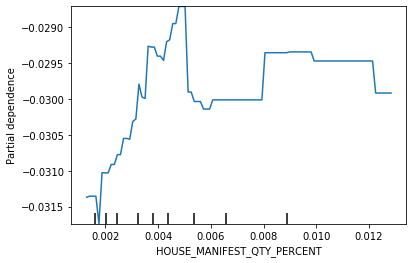

In [123]:
my_plots_1 = plot_partial_dependence(model_Metro_HSR, 
                                   features=[1], 
                                   X=X_test_Metro_HSR, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=100)

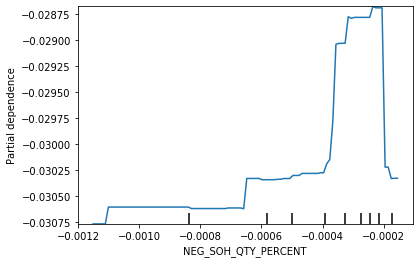

In [124]:
my_plots_2 = plot_partial_dependence(model_Metro_HSR, 
                                   features=[2], 
                                   X=X_test_Metro_HSR, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=100)

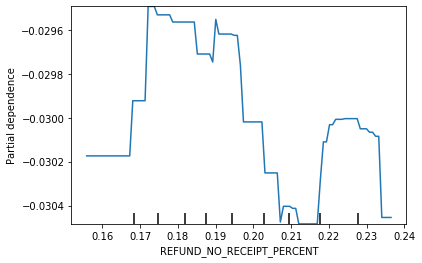

In [125]:
my_plots_3 = plot_partial_dependence(model_Metro_HSR, 
                                   features=[3], 
                                   X=X_test_Metro_HSR, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=100)

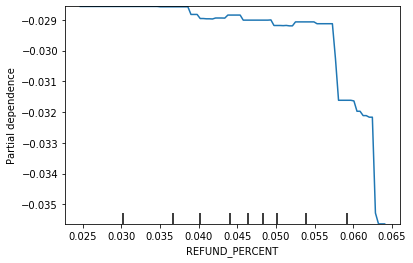

In [126]:
my_plots_4 = plot_partial_dependence(model_Metro_HSR, 
                                   features=[4], 
                                   X=X_test_Metro_HSR, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=100)

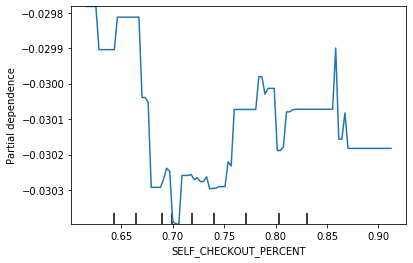

In [127]:
my_plots_5 = plot_partial_dependence(model_Metro_HSR, 
                                   features=[5], 
                                   X=X_test_Metro_HSR, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=100)

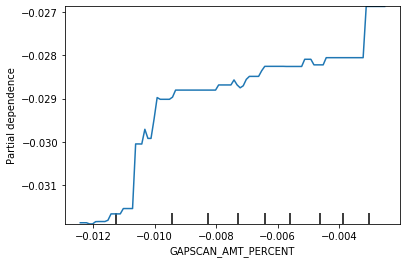

In [128]:
my_plots_6 = plot_partial_dependence(model_Metro_HSR, 
                                   features=[6], 
                                   X=X_test_Metro_HSR, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=100)

# Model 2 : Metro LSR

In [129]:
Y_Metro_LSR = data_Metro_LSR['Shrink_Amt_Rate']
X_Metro_LSR =  data_Metro_LSR[[
           'HEAD_OFFICE_AMT_PERCENT', 
           'HOUSE_MANIFEST_QTY_PERCENT', 
           'NEG_SOH_QTY_PERCENT'
         , 'REFUND_NO_RECEIPT_PERCENT', 
           'REFUND_PERCENT',
           'SELF_CHECKOUT_PERCENT',
'GAPSCAN_AMT_PERCENT']]

# Split the data into train and test data:
X_train_Metro_LSR, X_test_Metro_LSR, Y_train_Metro_LSR, Y_test_Metro_LSR = train_test_split(X_Metro_LSR, Y_Metro_LSR, test_size = 0.2, random_state=123)
# Build the model with the random forest regression algorithm:
model_Metro_LSR = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model_Metro_LSR.fit(X_train_Metro_LSR, Y_train_Metro_LSR)
# Make predictions on test data using the model trained on original data
predictions_Metro_LSR = model_Metro_LSR.predict(X_test_Metro_LSR)
# Performance metrics
errors_Metro_LSR = abs(predictions_Metro_LSR - Y_test_Metro_LSR)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(errors_Metro_LSR), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape_Metro_LSR = 100 * (errors_Metro_LSR / Y_test_Metro_LSR)
# Calculate and display accuracy
accuracy_Metro_LSR = 100 - np.mean(mape_Metro_LSR)
print('Accuracy on Metro LSR Cluster:', round(accuracy_Metro_LSR, 2), '%.')

Metrics for Random Forest Trained on Original Data
Average absolute error: 0.0 degrees.
Accuracy on Metro LSR Cluster: 116.31 %.


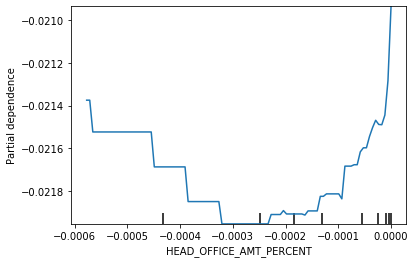

In [130]:
cols_to_use = ['HEAD_OFFICE_AMT_PERCENT', 
           'HOUSE_MANIFEST_QTY_PERCENT', 
           'NEG_SOH_QTY_PERCENT'
         , 'REFUND_NO_RECEIPT_PERCENT', 
           'REFUND_PERCENT',
           'SELF_CHECKOUT_PERCENT',
'GAPSCAN_AMT_PERCENT']
my_plots_0 = plot_partial_dependence(model_Metro_LSR, 
                                   features=[0], 
                                   X=X_test_Metro_LSR, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=100)

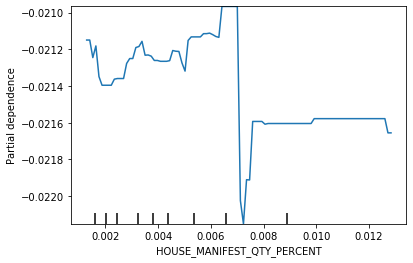

In [131]:
my_plots_1 = plot_partial_dependence(model_Metro_LSR, 
                                   features=[1], 
                                   X=X_test_Metro_LSR, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=100)

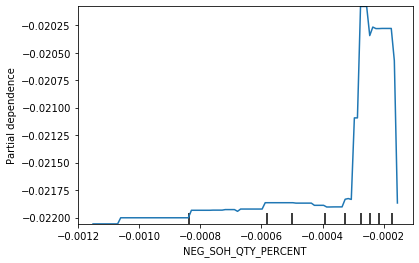

In [132]:
my_plots_2 = plot_partial_dependence(model_Metro_LSR, 
                                   features=[2], 
                                   X=X_test_Metro_LSR, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=100)

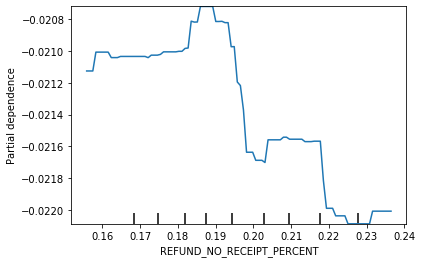

In [133]:
my_plots_3 = plot_partial_dependence(model_Metro_LSR, 
                                   features=[3], 
                                   X=X_test_Metro_LSR, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=100)

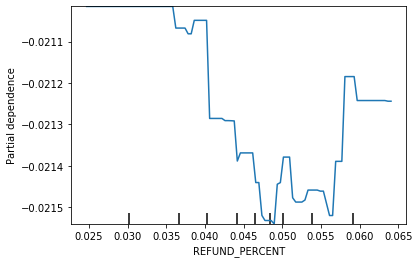

In [134]:
my_plots_4 = plot_partial_dependence(model_Metro_LSR, 
                                   features=[4], 
                                   X=X_test_Metro_LSR, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=100)

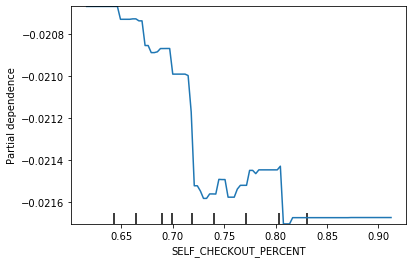

In [135]:
my_plots_5 = plot_partial_dependence(model_Metro_LSR, 
                                   features=[5], 
                                   X=X_test_Metro_LSR, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=100)

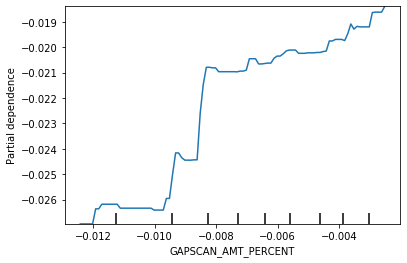

In [136]:
my_plots_6 = plot_partial_dependence(model_Metro_LSR, 
                                   features=[6], 
                                   X=X_test_Metro_LSR, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=100)

# Model 3 : Non Metro HSR

In [137]:
Y_NonMetro_HSR = data_NonMetro_HSR['Shrink_Amt_Rate']
X_NonMetro_HSR =  data_NonMetro_HSR[[
           'HEAD_OFFICE_AMT_PERCENT', 
           'HOUSE_MANIFEST_QTY_PERCENT', 
           'NEG_SOH_QTY_PERCENT'
         , 'REFUND_NO_RECEIPT_PERCENT', 
           'REFUND_PERCENT',
           'SELF_CHECKOUT_PERCENT',
'GAPSCAN_AMT_PERCENT']]

# Split the data into train and test data:
X_train_NonMetro_HSR, X_test_NonMetro_HSR, Y_train_NonMetro_HSR, Y_test_NonMetro_HSR = train_test_split(X_NonMetro_HSR, Y_NonMetro_HSR, test_size = 0.2, random_state=123)
# Build the model with the random forest regression algorithm:
model_NonMetro_HSR = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model_NonMetro_HSR.fit(X_train_NonMetro_HSR, Y_train_NonMetro_HSR)
# Make predictions on test data using the model trained on original data
predictions_NonMetro_HSR = model_NonMetro_HSR.predict(X_test_NonMetro_HSR)
# Performance metrics
errors_NonMetro_HSR = abs(predictions_NonMetro_HSR - Y_test_NonMetro_HSR)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(errors_NonMetro_HSR), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape_NonMetro_HSR = 100 * (errors_NonMetro_HSR / Y_test_NonMetro_HSR)
# Calculate and display accuracy
accuracy_NonMetro_HSR = 100 - np.mean(mape_NonMetro_HSR)
print('Accuracy on Non Metro HSR Cluster:', round(accuracy_NonMetro_HSR, 2), '%.')


Metrics for Random Forest Trained on Original Data
Average absolute error: 0.0 degrees.
Accuracy on Non Metro HSR Cluster: 116.85 %.


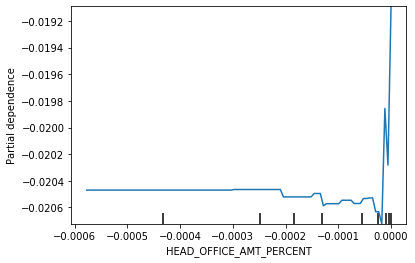

In [138]:
cols_to_use = ['HEAD_OFFICE_AMT_PERCENT', 
           'HOUSE_MANIFEST_QTY_PERCENT', 
           'NEG_SOH_QTY_PERCENT'
         , 'REFUND_NO_RECEIPT_PERCENT', 
           'REFUND_PERCENT',
           'SELF_CHECKOUT_PERCENT',
'GAPSCAN_AMT_PERCENT']
my_plots_NonMetro_HSR = plot_partial_dependence(model_NonMetro_HSR, 
                                   features=[0], 
                                   X=X_test_NonMetro_HSR, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=100)

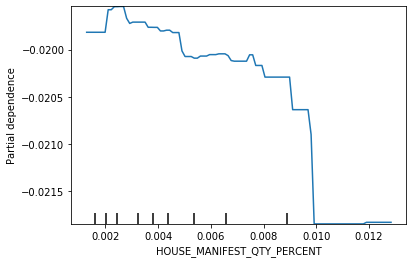

In [139]:
my_plots_1 = plot_partial_dependence(model_NonMetro_HSR, 
                                   features=[1], 
                                   X=X_test_NonMetro_HSR, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=100)

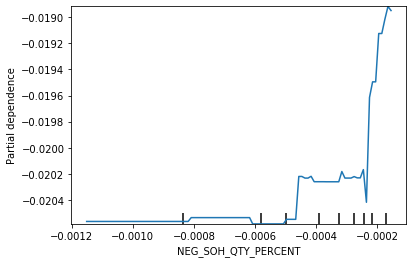

In [140]:
my_plots_2 = plot_partial_dependence(model_NonMetro_HSR, 
                                   features=[2], 
                                   X=X_test_NonMetro_HSR, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=100)

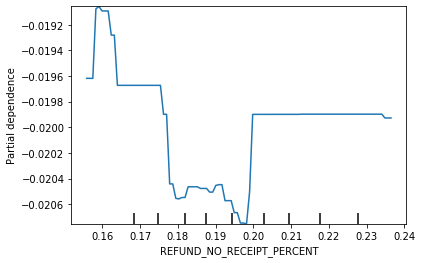

In [141]:
my_plots_3 = plot_partial_dependence(model_NonMetro_HSR, 
                                   features=[3], 
                                   X=X_test_NonMetro_HSR, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=100)

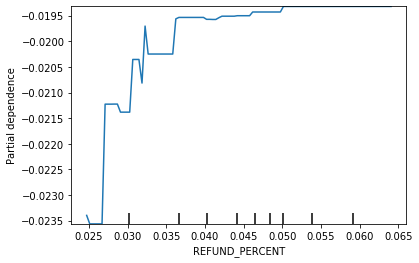

In [142]:
my_plots_4 = plot_partial_dependence(model_NonMetro_HSR, 
                                   features=[4], 
                                   X=X_test_NonMetro_HSR, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=100)

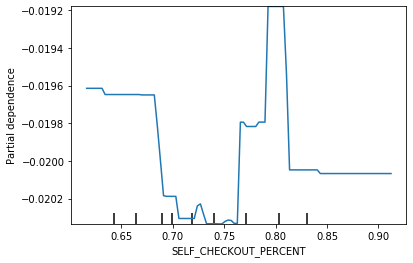

In [143]:
my_plots_5 = plot_partial_dependence(model_NonMetro_HSR, 
                                   features=[5], 
                                   X=X_test_NonMetro_HSR, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=100)

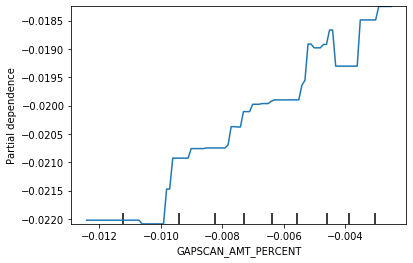

In [144]:
my_plots_6 = plot_partial_dependence(model_NonMetro_HSR, 
                                   features=[6], 
                                   X=X_test_NonMetro_HSR, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=100)

# Model 4 : Non Metro LSR

In [145]:
Y_NonMetro_LSR = data_NonMetro_LSR['Shrink_Amt_Rate']
X_NonMetro_LSR =  data_NonMetro_LSR[[
           'HEAD_OFFICE_AMT_PERCENT', 
           'HOUSE_MANIFEST_QTY_PERCENT', 
           'NEG_SOH_QTY_PERCENT'
         , 'REFUND_NO_RECEIPT_PERCENT', 
           'REFUND_PERCENT',
           'SELF_CHECKOUT_PERCENT',
'GAPSCAN_AMT_PERCENT']]

# Split the data into train and test data:
X_train_NonMetro_LSR, X_test_NonMetro_LSR, Y_train_NonMetro_LSR, Y_test_NonMetro_LSR = train_test_split(X_NonMetro_LSR, Y_NonMetro_LSR, test_size = 0.2, random_state=123)
# Build the model with the random forest regression algorithm:
model_NonMetro_LSR = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model_NonMetro_LSR.fit(X_train_NonMetro_LSR, Y_train_NonMetro_LSR)
# Make predictions on test data using the model trained on original data
predictions_NonMetro_LSR = model_NonMetro_LSR.predict(X_test_NonMetro_LSR)
# Performance metrics
errors_NonMetro_LSR = abs(predictions_NonMetro_LSR - Y_test_NonMetro_LSR)
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(errors_NonMetro_LSR), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape_NonMetro_LSR = 100 * (errors_NonMetro_LSR / Y_test_NonMetro_LSR)
# Calculate and display accuracy
accuracy_NonMetro_LSR = 100 - np.mean(mape_NonMetro_LSR)
print('Accuracy on Non Metro LSR Cluster:', round(accuracy_NonMetro_LSR, 2), '%.')


Metrics for Random Forest Trained on Original Data
Average absolute error: 0.0 degrees.
Accuracy on Non Metro LSR Cluster: 125.35 %.


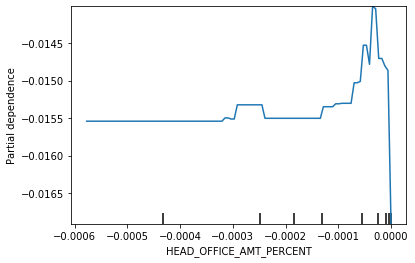

In [146]:
cols_to_use = ['HEAD_OFFICE_AMT_PERCENT', 
           'HOUSE_MANIFEST_QTY_PERCENT', 
           'NEG_SOH_QTY_PERCENT'
         , 'REFUND_NO_RECEIPT_PERCENT', 
           'REFUND_PERCENT',
           'SELF_CHECKOUT_PERCENT',
'GAPSCAN_AMT_PERCENT']
my_plots_0 = plot_partial_dependence(model_NonMetro_LSR, 
                                   features=[0], 
                                   X=X_test_NonMetro_LSR, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=100)

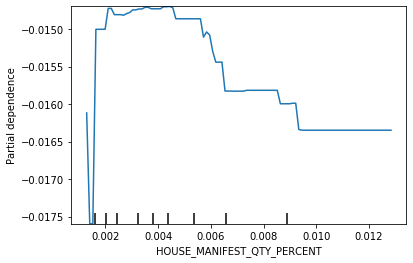

In [147]:
my_plots_1 = plot_partial_dependence(model_NonMetro_LSR, 
                                   features=[1], 
                                   X=X_test_NonMetro_LSR, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=100)

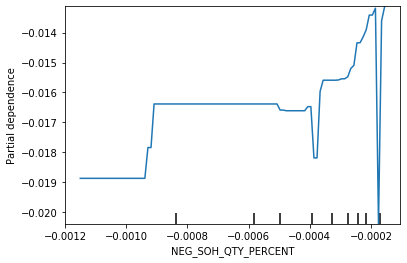

In [148]:
my_plots_2 = plot_partial_dependence(model_NonMetro_LSR, 
                                   features=[2], 
                                   X=X_test_NonMetro_LSR, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=100)

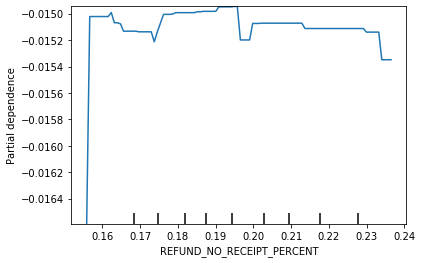

In [149]:
my_plots_3 = plot_partial_dependence(model_NonMetro_LSR, 
                                   features=[3], 
                                   X=X_test_NonMetro_LSR, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=100)

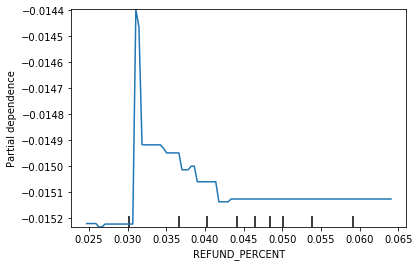

In [150]:
my_plots_4 = plot_partial_dependence(model_NonMetro_LSR, 
                                   features=[4], 
                                   X=X_test_NonMetro_LSR, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=100)

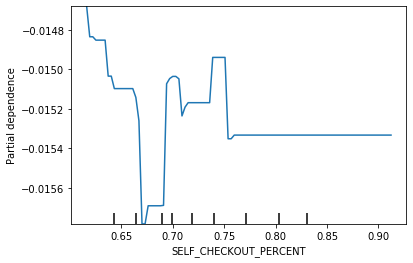

In [151]:
my_plots_5 = plot_partial_dependence(model_NonMetro_LSR, 
                                   features=[5], 
                                   X=X_test_NonMetro_LSR, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=100)

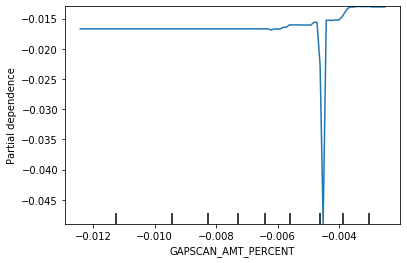

In [152]:
my_plots_6 = plot_partial_dependence(model_NonMetro_LSR, 
                                   features=[6], 
                                   X=X_test_NonMetro_LSR, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=100)

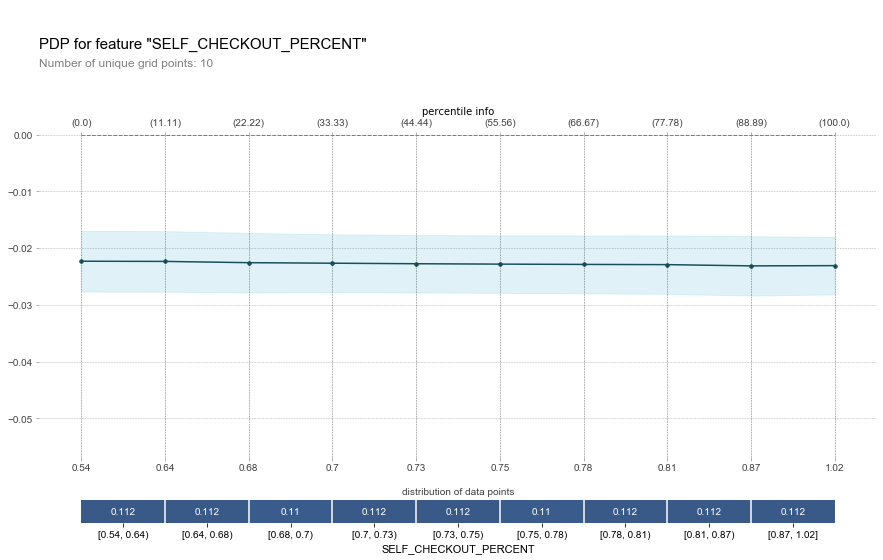

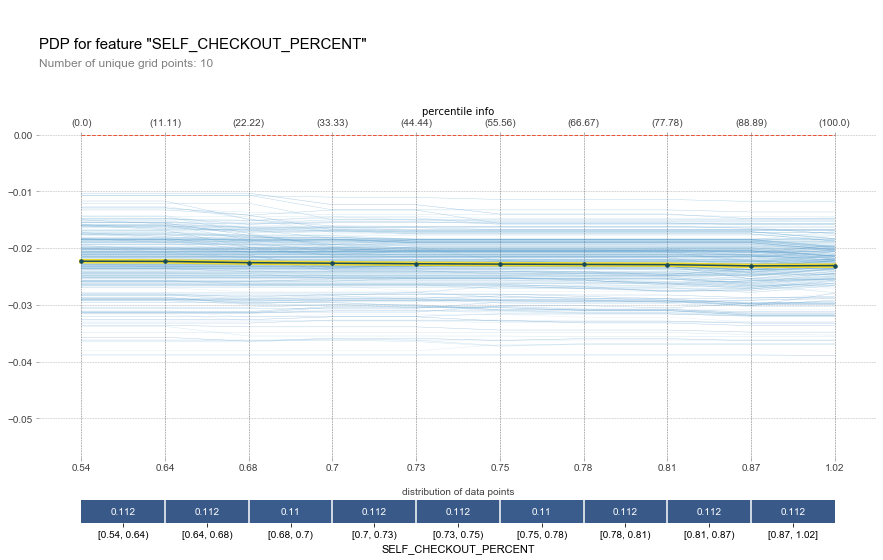

In [24]:
from pdpbox import pdp, info_plots
pdp_sco = pdp.pdp_isolate(
    model=model, dataset=X_train, model_features=X_train.columns, feature='SELF_CHECKOUT_PERCENT'
)
#PDP Plot
fig, axes = pdp.pdp_plot(pdp_sco, 'SELF_CHECKOUT_PERCENT', plot_lines=False, center=False, frac_to_plot=0.5, plot_pts_dist=True,x_quantile=True, show_percentile=True)
#ICE Plot
fig, axes = pdp.pdp_plot(pdp_sco, 'SELF_CHECKOUT_PERCENT', plot_lines=True, center=False, frac_to_plot=0.5, plot_pts_dist=True,x_quantile=True, show_percentile=True)

In [142]:
pdp_sco.pdp

array([-0.02118414, -0.02135962, -0.02155139, -0.02183452, -0.02251092,
       -0.02261521, -0.02273914, -0.02273933, -0.02312249, -0.02232203])

In [147]:
pdp_sco.count_data

,x,xticklabels,count,count_norm
0,0,"[0.54, 0.66)",21,0.112903
1,1,"[0.66, 0.69)",21,0.112903
2,2,"[0.69, 0.71)",20,0.107527
3,3,"[0.71, 0.73)",21,0.112903
4,4,"[0.73, 0.75)",20,0.107527
5,5,"[0.75, 0.78)",21,0.112903
6,6,"[0.78, 0.8)",20,0.107527
7,7,"[0.8, 0.85)",21,0.112903
8,8,"[0.85, 0.97]",21,0.112903


In [149]:
pdp_sco.display_columns

['0.54', '0.66', '0.69', '0.71', '0.73', '0.75', '0.78', '0.8', '0.85', '0.97']

In [150]:
pdp_sco.feature_grids

array([0.54150971, 0.66246006, 0.69014982, 0.70859927, 0.72779252,
       0.74993874, 0.77536653, 0.79765505, 0.85480543, 0.96948887])

In [25]:
pdp_sco.ice_lines.describe()

,0.542657,0.643595,0.678999,0.701353,0.725383,0.748224,0.776324,0.809514,0.870451,1.019971
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000
mean,-0.022317,-0.022350,-0.022574,-0.022666,-0.022759,-0.022827,-0.022878,-0.022917,-0.023137,-0.023094
std,0.005346,0.005334,0.005244,0.005092,0.005058,0.005060,0.005106,0.005136,0.005231,0.005054
min,-0.044128,-0.044128,-0.044128,-0.043618,-0.043618,-0.043618,-0.044115,-0.044115,-0.044115,-0.044115
25%,-0.025025,-0.025025,-0.025075,-0.025113,-0.025151,-0.025151,-0.025321,-0.025462,-0.025862,-0.025089
50%,-0.021698,-0.021707,-0.021731,-0.021794,-0.021790,-0.021823,-0.021823,-0.021823,-0.022257,-0.022233
75%,-0.018796,-0.018927,-0.019118,-0.019326,-0.019526,-0.019544,-0.019544,-0.019544,-0.019553,-0.020221
max,-0.009932,-0.009932,-0.009932,-0.010375,-0.010375,-0.011209,-0.011209,-0.011209,-0.011572,-0.011572


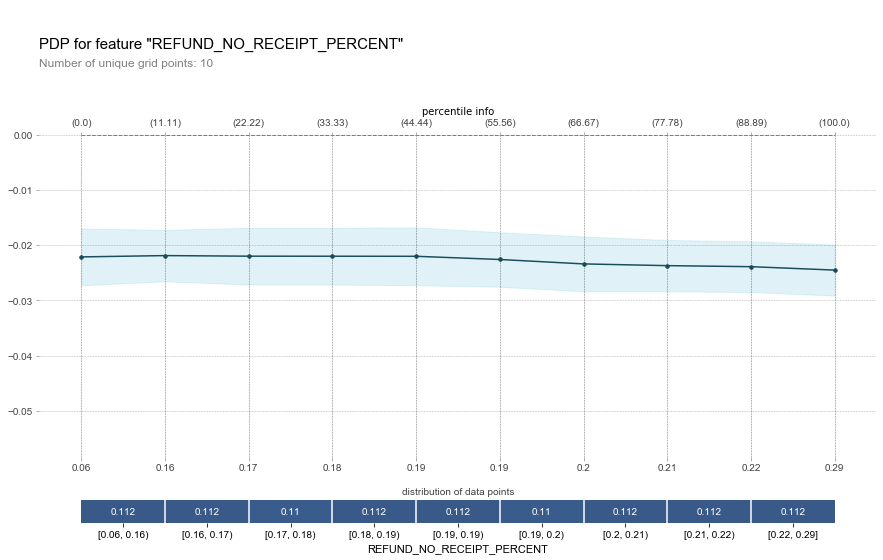

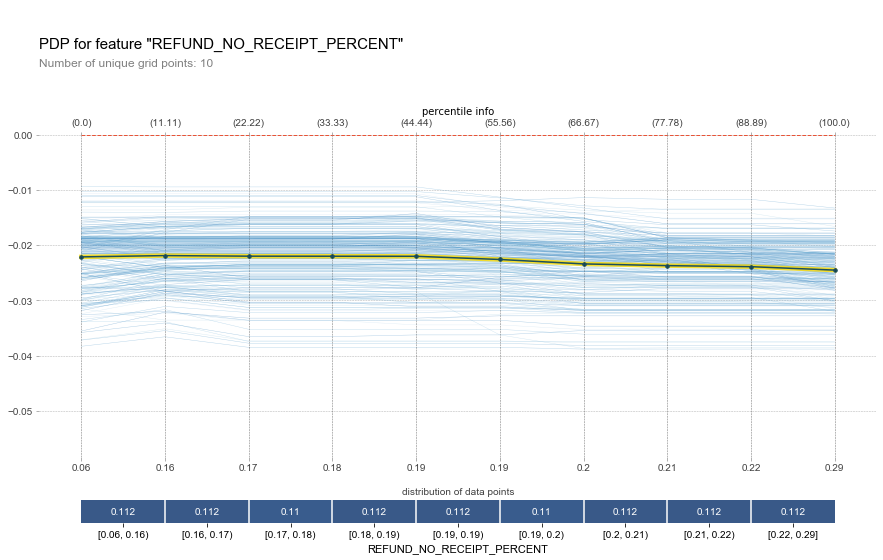

In [26]:
from pdpbox import pdp, info_plots
pdp_RWR = pdp.pdp_isolate(
    model=model, dataset=X_train, model_features=X_train.columns, feature='REFUND_NO_RECEIPT_PERCENT'
)
#PDP Plot
fig, axes = pdp.pdp_plot(pdp_RWR, 'REFUND_NO_RECEIPT_PERCENT', plot_lines=False, center=False, frac_to_plot=0.5, plot_pts_dist=True,x_quantile=True, show_percentile=True)
#ICE Plot
fig, axes = pdp.pdp_plot(pdp_RWR, 'REFUND_NO_RECEIPT_PERCENT', plot_lines=True, center=False, frac_to_plot=0.5, plot_pts_dist=True,x_quantile=True, show_percentile=True)

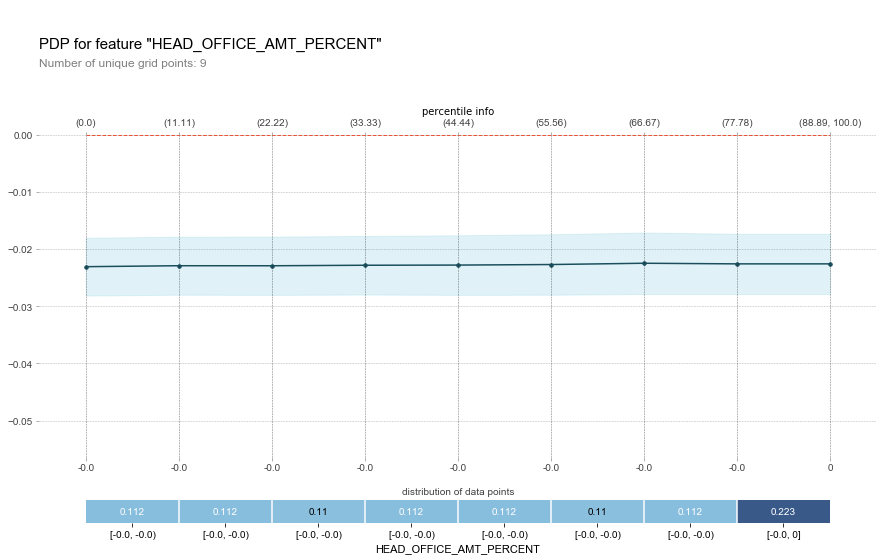

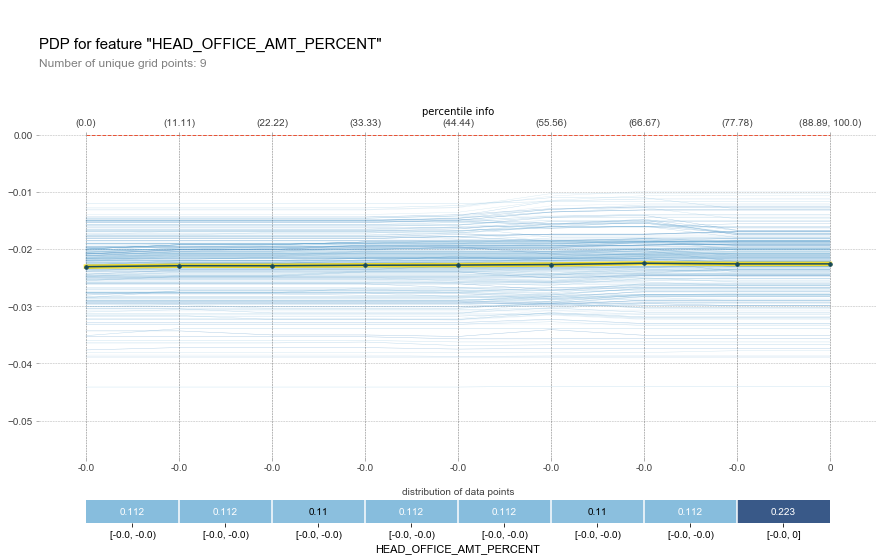

In [27]:
from pdpbox import pdp, info_plots
pdp_HEAD_OFFICE_AMT_PERCENT = pdp.pdp_isolate(
    model=model, dataset=X_train, model_features=X_train.columns, feature='HEAD_OFFICE_AMT_PERCENT'
)
#PDP Plot
fig, axes = pdp.pdp_plot(pdp_HEAD_OFFICE_AMT_PERCENT, 'HEAD_OFFICE_AMT_PERCENT', plot_lines=False, center=False, frac_to_plot=0.5, plot_pts_dist=True,x_quantile=True, show_percentile=True)
#ICE Plot
fig, axes = pdp.pdp_plot(pdp_HEAD_OFFICE_AMT_PERCENT, 'HEAD_OFFICE_AMT_PERCENT', plot_lines=True, center=False, frac_to_plot=0.5, plot_pts_dist=True,x_quantile=True, show_percentile=True)

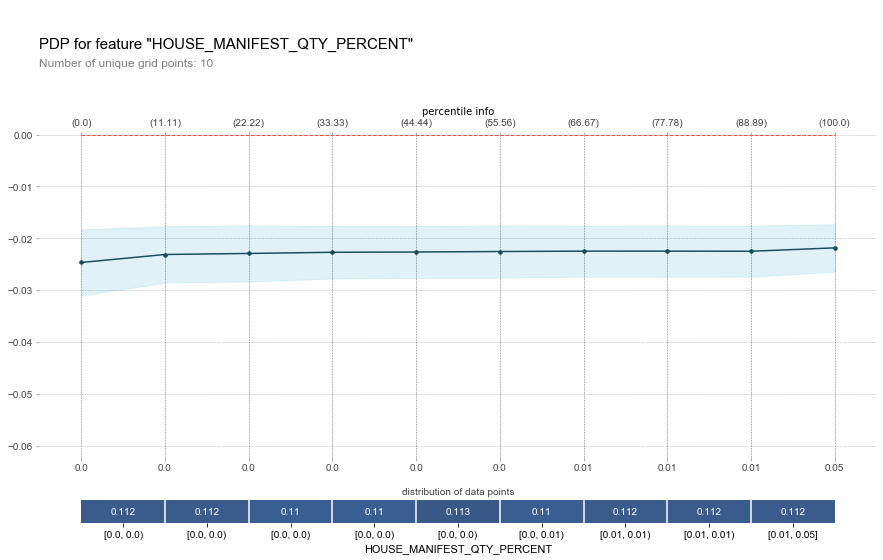

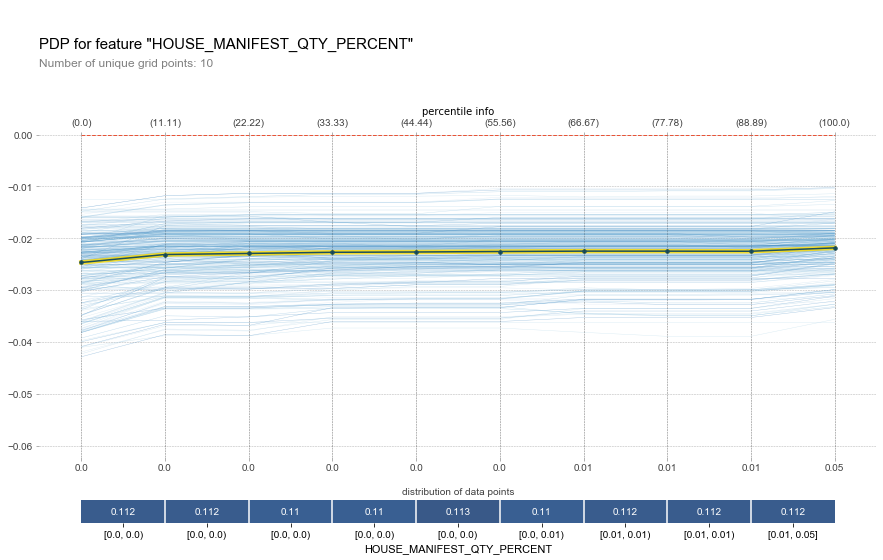

In [28]:
from pdpbox import pdp, info_plots
pdp_HOUSE_MANIFEST_QTY_PERCENT = pdp.pdp_isolate(
    model=model, dataset=X_train, model_features=X_train.columns, feature='HOUSE_MANIFEST_QTY_PERCENT'
)
#PDP Plot
fig, axes = pdp.pdp_plot(pdp_HOUSE_MANIFEST_QTY_PERCENT, 'HOUSE_MANIFEST_QTY_PERCENT', plot_lines=False, center=False, frac_to_plot=0.5, plot_pts_dist=True,x_quantile=True, show_percentile=True)
#ICE Plot
fig, axes = pdp.pdp_plot(pdp_HOUSE_MANIFEST_QTY_PERCENT, 'HOUSE_MANIFEST_QTY_PERCENT', plot_lines=True, center=False, frac_to_plot=0.5, plot_pts_dist=True,x_quantile=True, show_percentile=True)

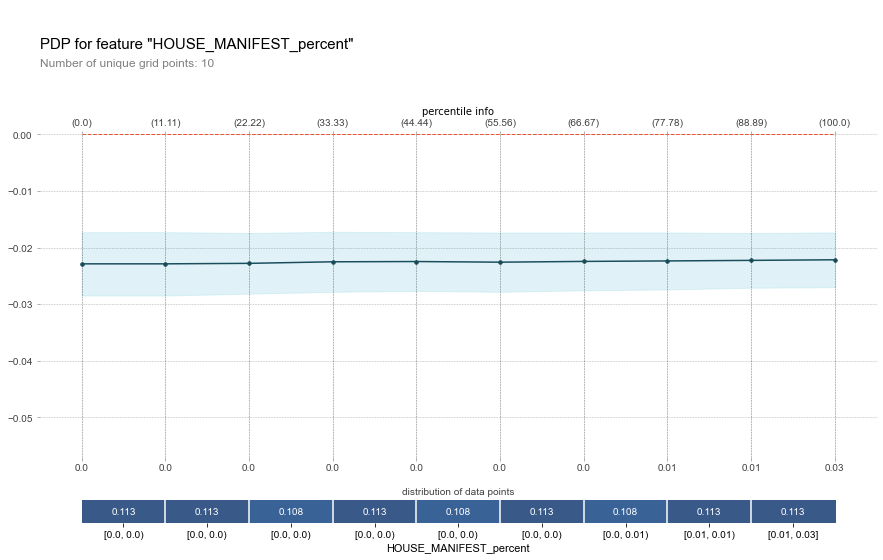

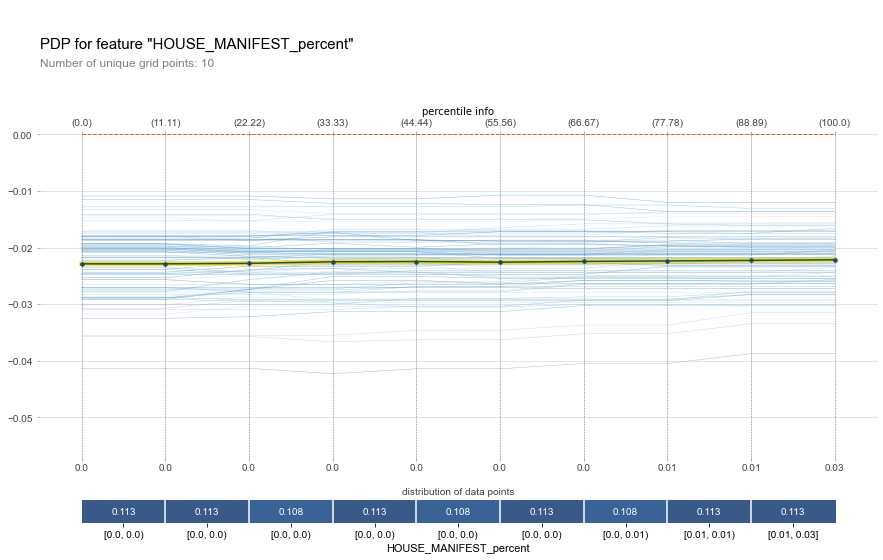

In [123]:
from pdpbox import pdp, info_plots
pdp_House_man = pdp.pdp_isolate(
    model=model, dataset=X_train, model_features=X_train.columns, feature='HOUSE_MANIFEST_percent'
)
#PDP Plot
fig, axes = pdp.pdp_plot(pdp_House_man, 'HOUSE_MANIFEST_percent', plot_lines=False, center=False, frac_to_plot=0.5, plot_pts_dist=True,x_quantile=True, show_percentile=True)
#ICE Plot
fig, axes = pdp.pdp_plot(pdp_House_man, 'HOUSE_MANIFEST_percent', plot_lines=True, center=False, frac_to_plot=0.5, plot_pts_dist=True,x_quantile=True, show_percentile=True)

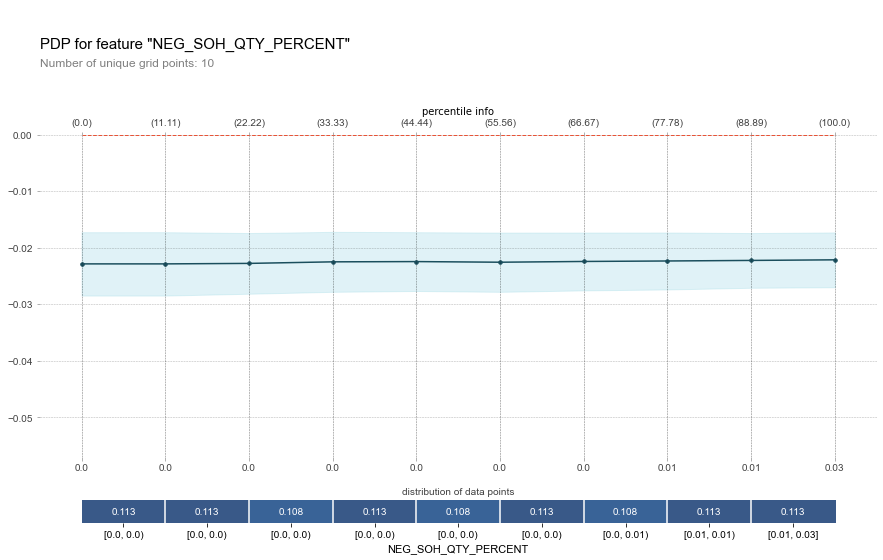

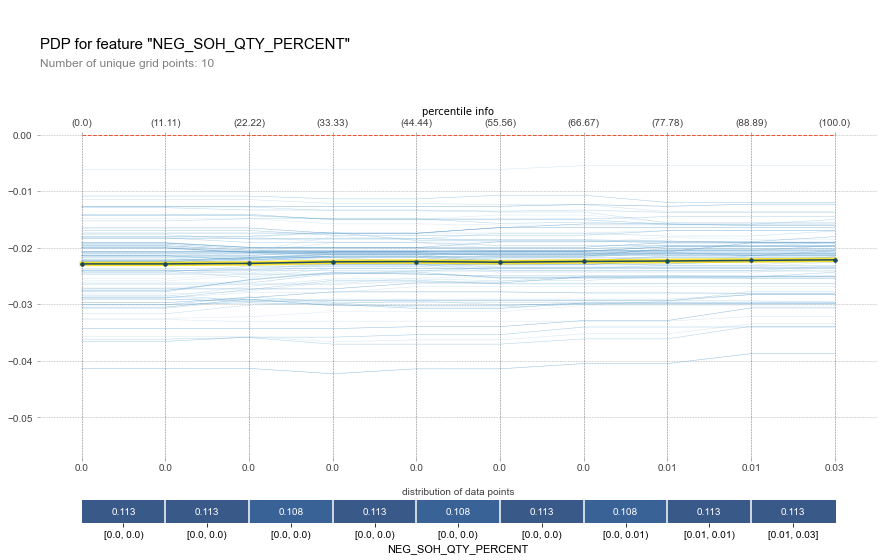

In [124]:
from pdpbox import pdp, info_plots
pdp_NEG_SOH_QTY_PERCENT = pdp.pdp_isolate(
    model=model, dataset=X_train, model_features=X_train.columns, feature='NEG_SOH_QTY_PERCENT'
)
#PDP Plot
fig, axes = pdp.pdp_plot(pdp_House_man, 'NEG_SOH_QTY_PERCENT', plot_lines=False, center=False, frac_to_plot=0.5, plot_pts_dist=True,x_quantile=True, show_percentile=True)
#ICE Plot
fig, axes = pdp.pdp_plot(pdp_House_man, 'NEG_SOH_QTY_PERCENT', plot_lines=True, center=False, frac_to_plot=0.5, plot_pts_dist=True,x_quantile=True, show_percentile=True)

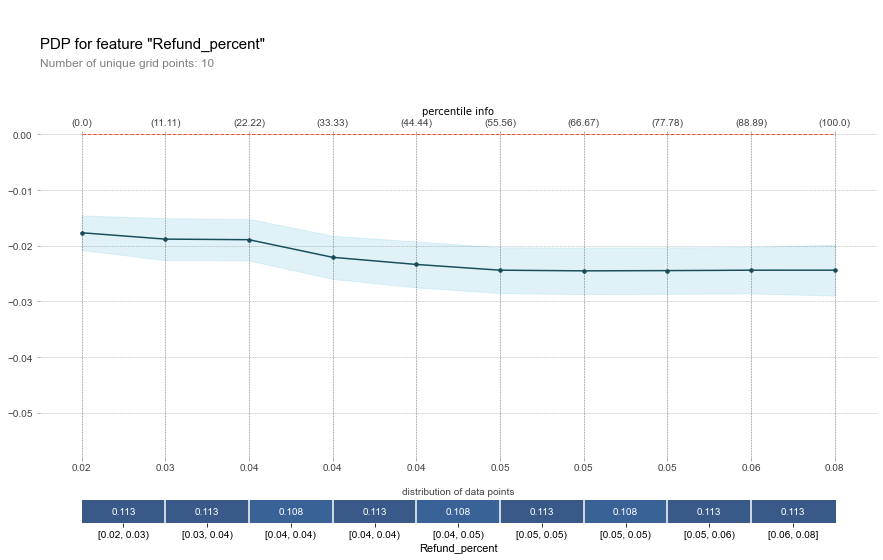

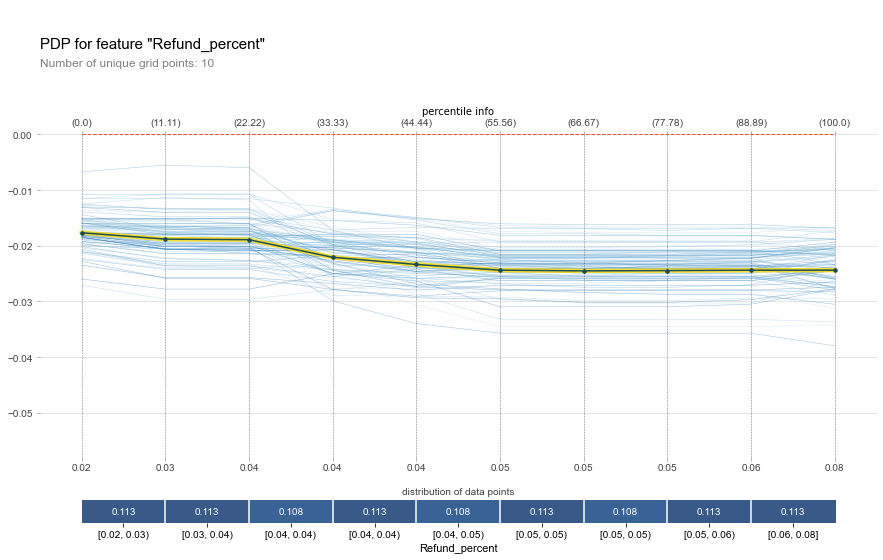

In [125]:
from pdpbox import pdp, info_plots
pdp_RP = pdp.pdp_isolate(
    model=model, dataset=X_train, model_features=X_train.columns, feature='Refund_percent'
)
#PDP Plot
fig, axes = pdp.pdp_plot(pdp_RP, 'Refund_percent', plot_lines=False, center=False, frac_to_plot=0.5, plot_pts_dist=True,x_quantile=True, show_percentile=True)
#ICE Plot
fig, axes = pdp.pdp_plot(pdp_RP, 'Refund_percent', plot_lines=True, center=False, frac_to_plot=0.5, plot_pts_dist=True,x_quantile=True, show_percentile=True)

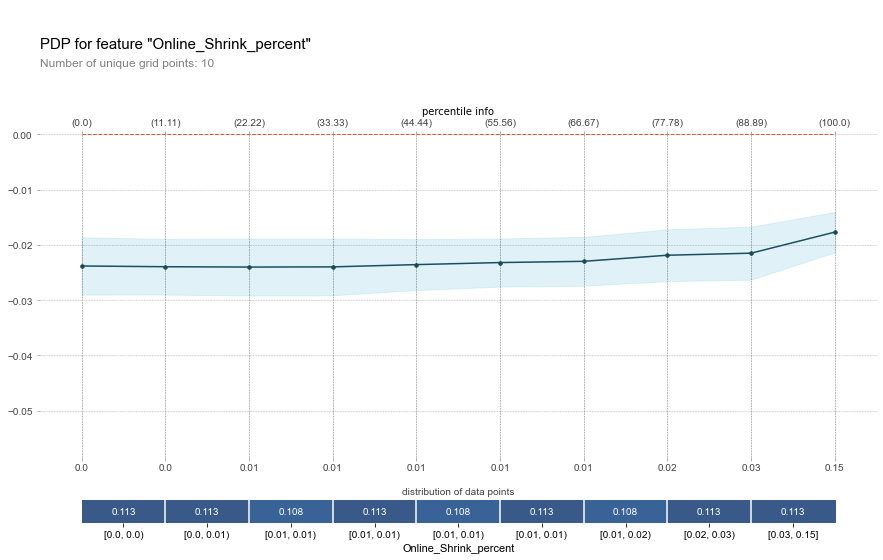

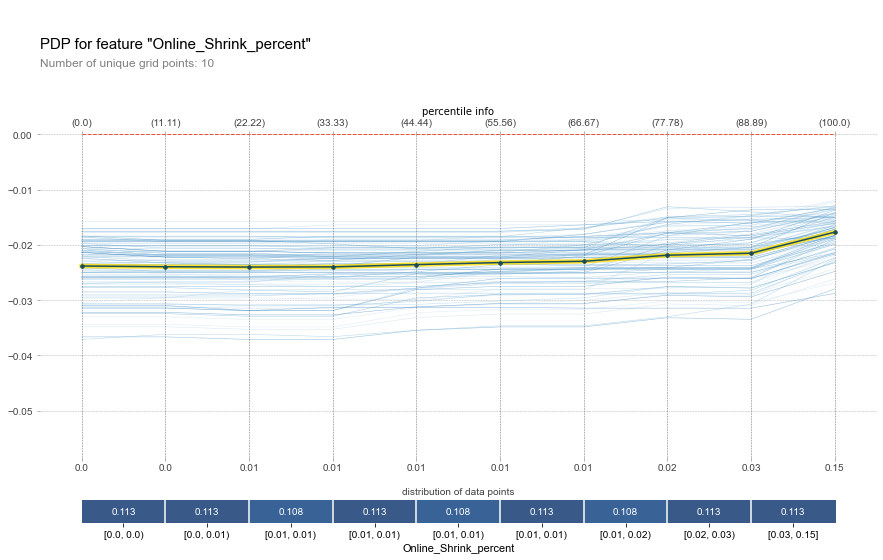

In [126]:
from pdpbox import pdp, info_plots
pdp_OS = pdp.pdp_isolate(
    model=model, dataset=X_train, model_features=X_train.columns, feature='Online_Shrink_percent'
)
#PDP Plot
fig, axes = pdp.pdp_plot(pdp_OS, 'Online_Shrink_percent', plot_lines=False, center=False, frac_to_plot=0.5, plot_pts_dist=True,x_quantile=True, show_percentile=True)
#ICE Plot
fig, axes = pdp.pdp_plot(pdp_OS, 'Online_Shrink_percent', plot_lines=True, center=False, frac_to_plot=0.5, plot_pts_dist=True,x_quantile=True, show_percentile=True)

In [50]:
import shap
rf_shap_values = shap.KernelExplainer(model.predict,X_test)

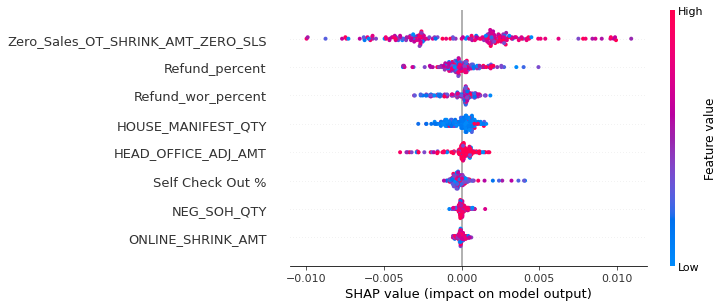

In [53]:
shap.summary_plot(shap_values, X_train)

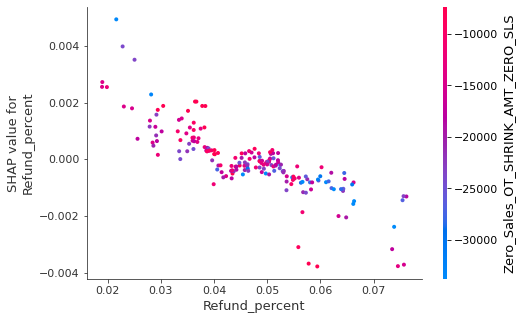

In [19]:
shap.dependence_plot("Refund_percent", shap_values, X_train)

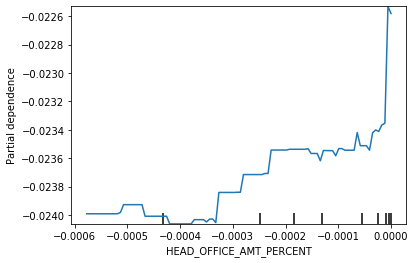

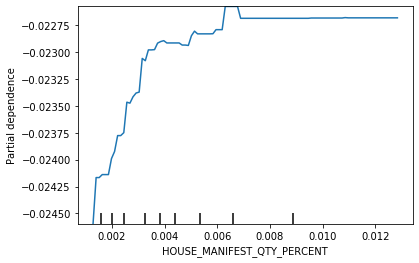

In [73]:
my_plots_1 = plot_partial_dependence(model, 
                                   features=[1], 
                                   X=X_test, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=100)

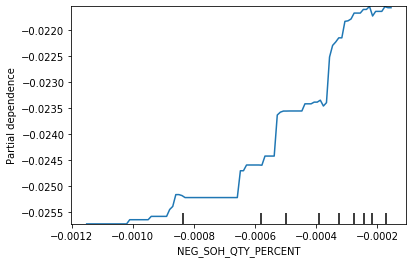

In [74]:
my_plots_2 = plot_partial_dependence(model, 
                                   features=[2], 
                                   X=X_test, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=100)

In [40]:
my_plots_2.pd_results

[(array([[-0.02660887, -0.02660887, -0.02636264, -0.02636264, -0.02636264,
          -0.02636264, -0.02636264, -0.02636264, -0.02636264, -0.02636264,
          -0.02636264, -0.02636264, -0.02636264, -0.02636264, -0.02611115,
          -0.02611115, -0.02611115, -0.02611115, -0.02569108, -0.02569108,
          -0.02569108, -0.02569108, -0.02571396, -0.02571396, -0.02571396,
          -0.0252264 , -0.0252264 , -0.0252264 , -0.0250392 , -0.0250157 ,
          -0.0250157 , -0.0250157 , -0.0250157 , -0.0250157 , -0.0250157 ,
          -0.0250157 , -0.0250157 , -0.0250157 , -0.0250157 , -0.02482426,
          -0.02482426, -0.02482426, -0.02466863, -0.02463722, -0.02463722,
          -0.02463722, -0.02463722, -0.02463914, -0.02463914, -0.02463914,
          -0.02463914, -0.02463662, -0.02466265, -0.02466265, -0.02436412,
          -0.02436412, -0.02436412, -0.0240946 , -0.02409701, -0.02380856,
          -0.02387981, -0.02387981, -0.02387981, -0.02387981, -0.02376861,
          -0.02376861, -0

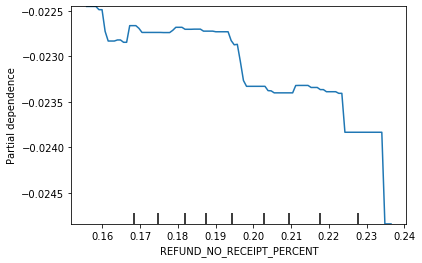

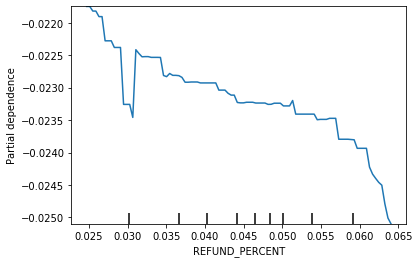

In [76]:
my_plots_4 = plot_partial_dependence(model, 
                                   features=[4], 
                                   X=X_test, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=100)

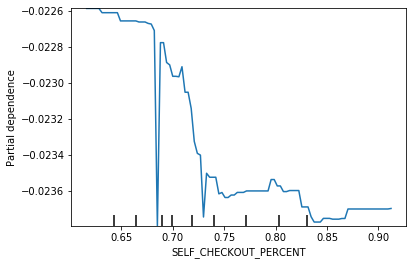

In [77]:
my_plots_5 = plot_partial_dependence(model, 
                                   features=[5], 
                                   X=X_test, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=100)

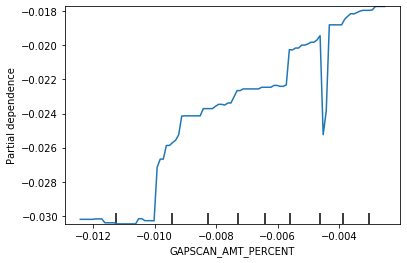

In [78]:
my_plots_6 = plot_partial_dependence(model, 
                                   features=[6], 
                                   X=X_test, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=100)

In [30]:
my_plots.

{1: array([0.00160372, 0.00200332, 0.00242164, 0.0028388 , 0.003259  ,
        0.00385732, 0.00503856, 0.00627728, 0.00821804])}

In [136]:
def plot_pdp(model, X, feature, target=False, return_pd=False, y_pct=True, figsize=(10,9), norm_hist=True, dec=.5):
    # Get partial dependence
    pardep = partial_dependence(model, X, [feature])
    
    # Get min & max values
    xmin = pardep[1][0].min()
    xmax = pardep[1][0].max()
    ymin = pardep[0][0].min()
    ymax = pardep[0][0].max()
    
    # Create figure
    fig, ax1 = plt.subplots(figsize=figsize)
    ax1.grid(alpha=.5, linewidth=1)
    
    # Plot partial dependence
    color = 'tab:blue'
    ax1.plot(pardep[1][0], pardep[0][0], color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_xlabel(feature, fontsize=14)
    
    tar_ylabel = ': {}'.format(target) if target else ''
    ax1.set_ylabel('Partial Dependence{}'.format(tar_ylabel), color=color, fontsize=14)
    
    tar_title = target if target else 'Target Variable'
    ax1.set_title('Relationship Between {} and {}'.format(feature, tar_title), fontsize=16)
    
    if y_pct and ymin>=0 and ymax<=1:
        # Display yticks on ax1 as percentages
        fig.canvas.draw()
        labels = [item.get_text() for item in ax1.get_yticklabels()]
        labels = [int(np.float(label)*100) for label in labels]
        labels = ['{}%'.format(label) for label in labels]
        ax1.set_yticklabels(labels)
    
    # Plot line for decision boundary
    ax1.hlines(dec, xmin=xmin, xmax=xmax, color='black', linewidth=2, linestyle='--', label='Decision Boundary')
    ax1.legend()

    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.hist(X[feature], bins=80, range=(xmin, xmax), alpha=.25, color=color, density=norm_hist)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylabel('Distribution', color=color, fontsize=14)
    
    if y_pct and norm_hist:
        # Display yticks on ax2 as percentages
        fig.canvas.draw()
        labels = [item.get_text() for item in ax2.get_yticklabels()]
        labels = [int(np.float(label)*100) for label in labels]
        labels = ['{}%'.format(label) for label in labels]
        ax2.set_yticklabels(labels)

    plt.show()
    
    if return_pd:
        return pardep

In [ ]:
plot_pdp(model, X_train, 'Refund_wor_percent', target='SHRINK_AMT_RATE')